In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', None)
plt.style.use("seaborn")
import warnings
warnings.filterwarnings("ignore") 

In [2]:
# Enter the path
df = pd.read_csv(r"D:\uni\ترم 5\برنامه ریزی و کنترل موجودی 1\Project\TRAIN.csv")
df.head()

ID  Store_id Store_Type Location_Type Region_Code        Date  \
0  T1000001         1         S1            L3          R1  2018-01-01   
1  T1000002       253         S4            L2          R1  2018-01-01   
2  T1000003       252         S3            L2          R1  2018-01-01   
3  T1000004       251         S2            L3          R1  2018-01-01   
4  T1000005       250         S2            L3          R4  2018-01-01   

   Holiday Discount  #Order     Sales  
0        1      Yes       9   7011.84  
1        1      Yes      60  51789.12  
2        1      Yes      42  36868.20  
3        1      Yes      23  19715.16  
4        1      Yes      62  45614.52

In [3]:
df['Date']=pd.to_datetime(df['Date'] , format='%Y-%m-%d')
df = df.groupby('Date', as_index=False)['Sales'].sum()
df.index+=1
df;

# Normal Test

Q-Q Plot

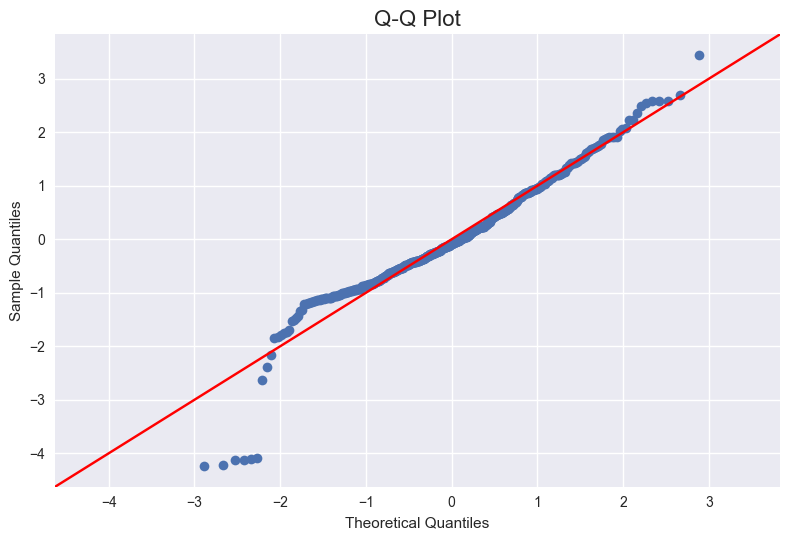

In [4]:
import statsmodels.api as sm
import pylab as py
sm.qqplot(df['Sales'], line ='45',fit=True)
py.title('Q-Q Plot',fontsize=16)
plt.tight_layout()
py.show()

# LPD

In [5]:
# function for prediction
def LPD(sales):
    pred = np.zeros(len(sales))
    for i in range(1,len(sales)):
        pred[i] = sales[i]
    pred[0] = np.nan
    return pred

In [6]:
prediction = pd.DataFrame(LPD(df["Sales"]),columns=["Predicted"])
prediction.index += 1
df_LPD = pd.concat([df,prediction],axis=1)
df_LPD.head()

Date       Sales   Predicted
1 2018-01-01  15345484.5         NaN
2 2018-01-02  19592415.0  15345484.5
3 2018-01-03  18652527.0  19592415.0
4 2018-01-04  19956267.0  18652527.0
5 2018-01-05  22902651.0  19956267.0

In [7]:
def LPD_Plot():
    plt.figure(figsize=(20,4))
    plt.plot(df_LPD["Date"],df_LPD["Sales"],alpha=1 , c='black',label='Sales',linewidth=1.5)
    plt.plot(df_LPD["Date"],df_LPD["Predicted"], alpha=0.8 , c='dodgerblue',label='Last Period Demand',linewidth=1)
    plt.legend()
    plt.tight_layout()
    plt.title('Last Period Demand',fontsize=18)
    plt.xlim((pd.Timestamp('2018-01-01'),pd.Timestamp('2019-05-31')))
    plt.show()

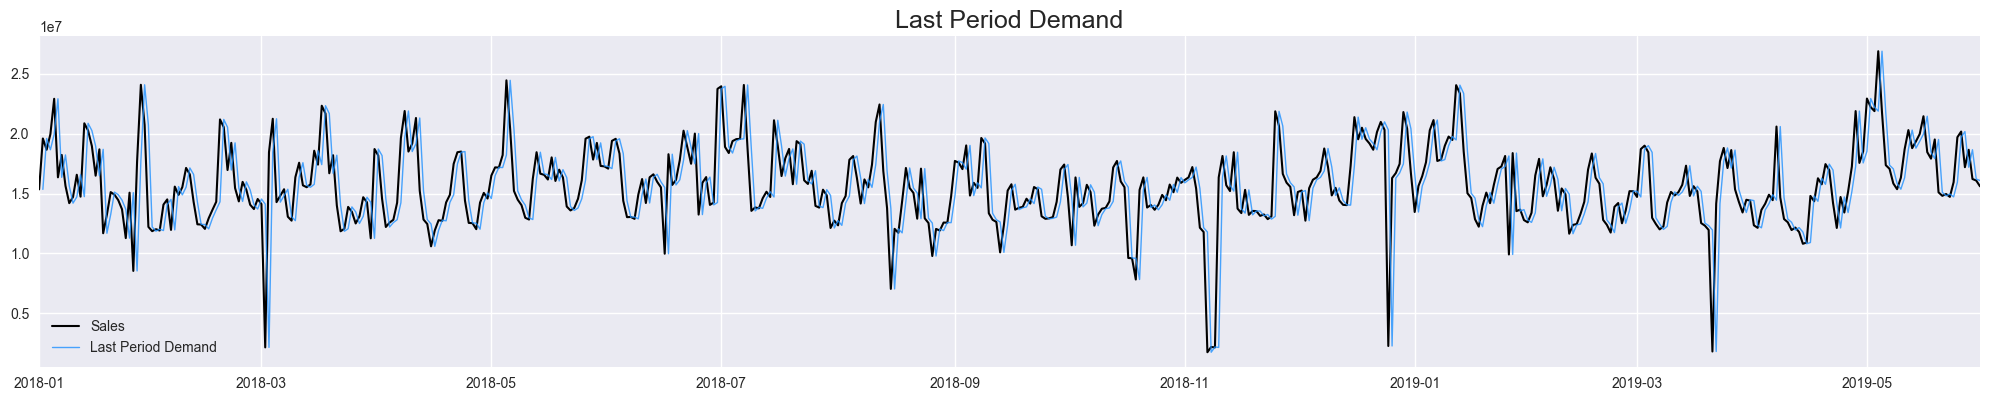

In [8]:
LPD_Plot()

### Assessing Model Accuracy

In [9]:
def res(sales,prediction):
    return sales-prediction
def pe(sales,prediction):
    return ((sales-prediction)/sales)*100
a = res(df_LPD["Sales"],df_LPD["Predicted"])
re = pe(df_LPD["Sales"],df_LPD["Predicted"])

#ME
def ME(res):
    return np.nanmean(res)
#MAE
def MAE(res):
    return np.nanmean(np.abs(res))
#MSE
def MSE(res):
    return np.nanmean((res)*(res))
#MPE
def MPE(pe):
    return np.nanmean(pe)
#MAPE
def MAPE(pe):
    return np.nanmean(np.abs(pe))
#TS
def TS(res,mae):
    return np.sum(res)/mae

print('ME for LPD model is {:.2f}'.format(ME(a)))
print('MAE for LPD model is {:.2f}'.format(MAE(a)))
print('MSE for LPD model is {:.2f}'.format(MSE(a)))
print('MPE for LPD model is {:.2f}'.format(MPE(re)))
print('MAPE for LPD model is {:.2f}'.format(MAPE(re)))
print('TS for LPD model is {:.2f}'.format(TS(a,MAE(a))))

ME for LPD model is 497.75
MAE for LPD model is 1981625.42
MSE for LPD model is 9246233436020.38
MPE for LPD model is -5.52
MAPE for LPD model is 16.93
TS for LPD model is 0.13


### MR LDP

In [10]:
n = len(a)
MR = np.zeros(n)
abs_MR = np.zeros(n)
for i in range(3,n+1):
    abs_MR[i-1] = abs(a[i]-a[i-1])
    MR[i-1] = (a[i]-a[i-1])
MR[0] = np.nan
MR[1] = np.nan
abs_MR[0] = np.nan
abs_MR[1] = np.nan
MR = pd.concat([pd.DataFrame(MR,columns=['MR']),pd.DataFrame(abs_MR,columns=['abs_MR'])],axis=1)
MR.index += 1

MR["CL"] = np.zeros(n)
MR["LCL_1"] = np.zeros(n)
MR["UCL_1"] = np.zeros(n)
MR["LCL_2"] = np.zeros(n)
MR["UCL_2"] = np.zeros(n)
MR["LCL_3"] = np.zeros(n)
MR["UCL_3"] = np.zeros(n)
MR_bar = MR["abs_MR"].mean(skipna=True)
for i in range(3,n+1):
    MR["CL"][i] = 0
    MR["LCL_1"][i] = -0.89 * MR_bar
    MR["UCL_1"][i] =  0.89 * MR_bar
    MR["LCL_2"][i] = -1.77 * MR_bar
    MR["UCL_2"][i] =  1.77 * MR_bar
    MR["LCL_3"][i] = -2.66 * MR_bar
    MR["UCL_3"][i] =  2.66 * MR_bar

MR = pd.concat([MR,df["Date"]],axis=1)
MR = MR.iloc[2:,:]
MR.head()

MR     abs_MR   CL         LCL_1         UCL_1         LCL_2  \
3 -5186818.5  5186818.5  0.0 -2.816212e+06  2.816212e+06 -5.600782e+06   
4  2243628.0  2243628.0  0.0 -2.816212e+06  2.816212e+06 -5.600782e+06   
5  1642644.0  1642644.0  0.0 -2.816212e+06  2.816212e+06 -5.600782e+06   
6 -9497079.0  9497079.0  0.0 -2.816212e+06  2.816212e+06 -5.600782e+06   
7  8417988.0  8417988.0  0.0 -2.816212e+06  2.816212e+06 -5.600782e+06   

          UCL_2         LCL_3         UCL_3       Date  
3  5.600782e+06 -8.416994e+06  8.416994e+06 2018-01-03  
4  5.600782e+06 -8.416994e+06  8.416994e+06 2018-01-04  
5  5.600782e+06 -8.416994e+06  8.416994e+06 2018-01-05  
6  5.600782e+06 -8.416994e+06  8.416994e+06 2018-01-06  
7  5.600782e+06 -8.416994e+06  8.416994e+06 2018-01-07

In [11]:
def MR_LPD_Plot():
    plt.figure(figsize=(20,4))
    plt.plot(MR["Date"], MR["CL"], c='azure', ls='--', linewidth=1)
    plt.plot(MR["Date"], MR["LCL_1"], c='gold', ls='--', linewidth=1)
    plt.plot(MR["Date"], MR["UCL_1"], c='gold', ls='--', linewidth=1)
    plt.plot(MR["Date"], MR["LCL_2"], c='darkorange', ls='--', linewidth=1.25)
    plt.plot(MR["Date"], MR["UCL_2"], c='darkorange', ls='--', linewidth=1.25)
    plt.plot(MR["Date"], MR["LCL_3"], c='dodgerblue', ls='--', linewidth=1.25)
    plt.plot(MR["Date"], MR["UCL_3"], c='dodgerblue', ls='--', linewidth=1.25)
    plt.plot(MR["Date"], MR["MR"], c='black', linewidth=2)
    plt.tight_layout()
    plt.title('MR for LPD' , fontsize=18)
    plt.xlim((pd.Timestamp('2018-01-01'),pd.Timestamp('2019-05-31')))
    plt.show()

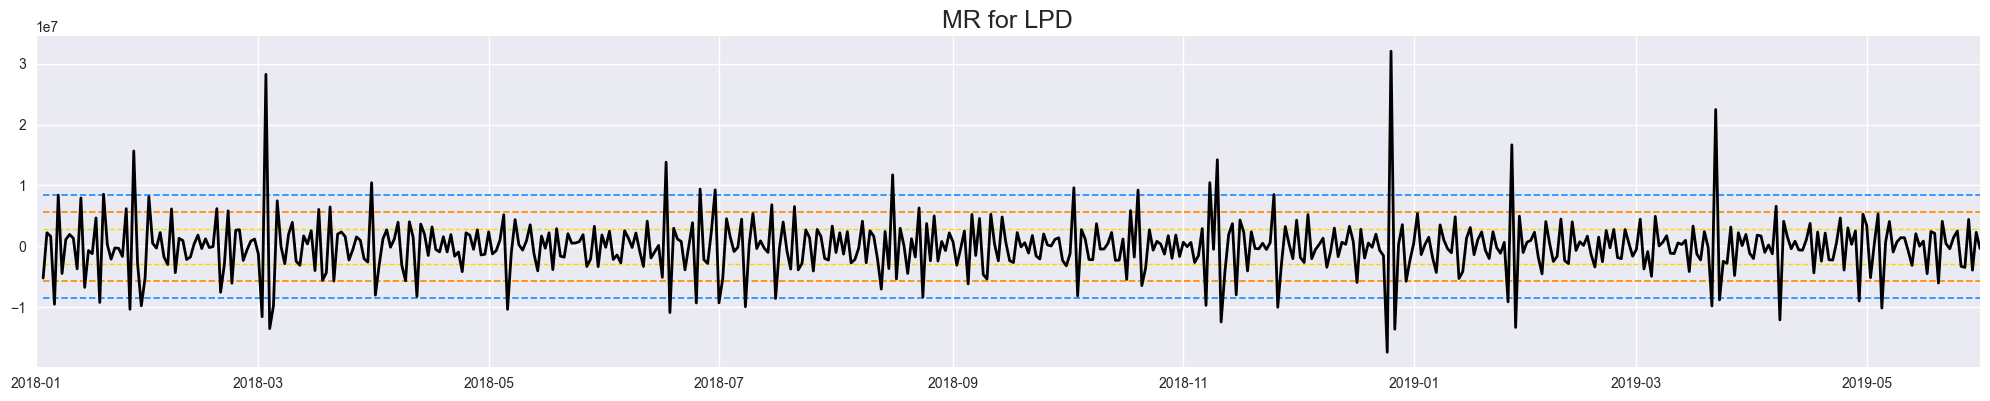

In [12]:
MR_LPD_Plot()

# MA

In [13]:
df_MA=df.copy()
for k in range(3,9):
    for i in range(k+1,len(df_MA)+1):
        df_MA.loc[i,'MA{}'.format(k)]=np.mean(df_MA.loc[i-k:i-1,'Sales']) #Forcast
        df_MA.loc[i,'MA{} Residual'.format(k)]=df_MA.loc[i,'Sales']-df_MA.loc[i,'MA{}'.format(k)] #Residual
        df_MA.loc[i,'MA{} PE'.format(k)]=((df_MA.loc[i,'Sales']-df_MA.loc[i,'MA{}'.format(k)])/df_MA.loc[i,'Sales'])*100 #PE


for k in range(3,9):
    for i in range(k+1,len(df_MA)):
        df_MA.loc[i+1,'MA{} MR'.format(k)]=df_MA.loc[i+1,'MA{} Residual'.format(k)]-df_MA.loc[i,'MA{} Residual'.format(k)] #MR
    
df_MA.head()

Date       Sales         MA3  MA3 Residual     MA3 PE           MA4  \
1 2018-01-01  15345484.5         NaN           NaN        NaN           NaN   
2 2018-01-02  19592415.0         NaN           NaN        NaN           NaN   
3 2018-01-03  18652527.0         NaN           NaN        NaN           NaN   
4 2018-01-04  19956267.0  17863475.5     2092791.5  10.486889           NaN   
5 2018-01-05  22902651.0  19400403.0     3502248.0  15.291889  1.838667e+07   

   MA4 Residual     MA4 PE  MA5  MA5 Residual  ...  MA7 PE  MA8  MA8 Residual  \
1           NaN        NaN  NaN           NaN  ...     NaN  NaN           NaN   
2           NaN        NaN  NaN           NaN  ...     NaN  NaN           NaN   
3           NaN        NaN  NaN           NaN  ...     NaN  NaN           NaN   
4           NaN        NaN  NaN           NaN  ...     NaN  NaN           NaN   
5   4515977.625  19.718144  NaN           NaN  ...     NaN  NaN           NaN   

   MA8 PE     MA3 MR  MA4 MR  MA5 MR  MA6 MR  MA7 MR  MA8 MR  
1     NaN        NaN     NaN     NaN     NaN     NaN     NaN  
2     NaN        NaN     NaN     NaN     NaN     NaN     NaN  
3     NaN        NaN     NaN     NaN     NaN     NaN     NaN  
4     NaN        NaN     NaN     NaN     NaN     NaN     NaN  
5     NaN  1409456.5     NaN     NaN     NaN     NaN     NaN  

[5 rows x 26 columns]

In [14]:
from matplotlib.pyplot import cm
color = iter(cm.rainbow(np.linspace(0, 1, 6)))
def plotting_MA():
    
    plt.figure(figsize=(20,4))
    plt.style.use('seaborn')
    plt.plot(df_MA['Date'] , df_MA['Sales'] , alpha=0.8 , c='black',label='Sales',linewidth=1)
    for k in range(3,9):
        c=next(color)
        plt.plot(df_MA['Date'] , df_MA['MA{}'.format(k)] ,c=c, alpha=0.6,ls='--',label='Prediction k={}'.format(k),linewidth=1)
    plt.legend(loc='lower right')
    plt.tight_layout()
    plt.xlim((pd.Timestamp('2018-01-01'),pd.Timestamp('2019-05-31')))
    plt.title('Simple MA Prediction',fontsize=18)
    plt.show()

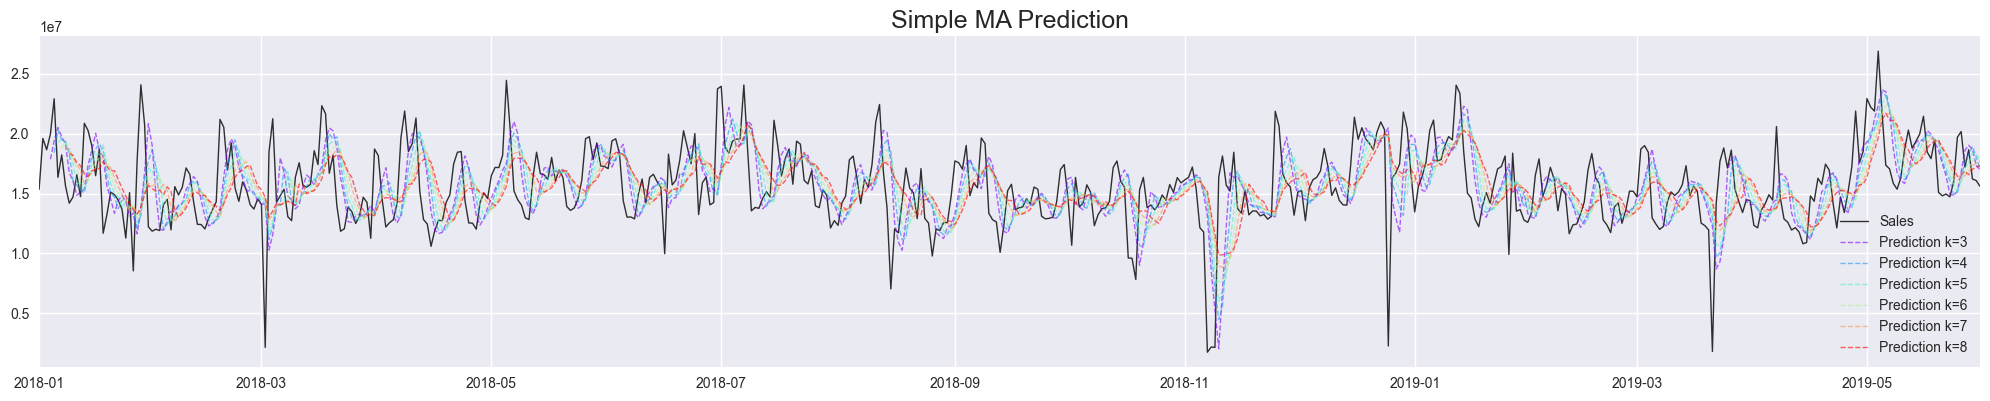

In [15]:
plotting_MA();

In [16]:
color = iter(cm.rainbow(np.linspace(0, 1, 6)))
def plotting_subMA():
    fig,ax=plt.subplots(nrows=7,ncols=1,figsize=(20,6),sharex=True)
    plt.style.use('seaborn')
    ax[0].plot(df_MA['Date'] , df_MA['Sales'] , alpha=1 , c='black',label='Sales',linewidth=2)
    ax[0].set_xlim(('2018-01-01','2019-05-31'))
    for k in range(3,9):
        c=next(color)
        ax[k-2].plot(df_MA['Date'] , df_MA['MA{}'.format(k)] , c=c,alpha=1,ls='--',label='Prediction k={}'.format(k),linewidth=2)
        ax[k-2].set_xlim(('2018-01-01','2019-05-31'))
    for k in range(7):
        ax[k].set_ylim((1762000,26871000))
        ax[k].legend(loc='lower left')
    plt.tight_layout()
    plt.suptitle('Simple MA Prediction',fontsize=18)
    plt.subplots_adjust(top=0.95,hspace=0.1)
    plt.show();

In [20]:
# plotting_subMA()

### Assessing model accuracy

In [17]:
# minimum variance
def min_calc(dict_vals):
    minimum=np.min(np.absolute([dict_vals[x] for x in dict_vals]))
    if minimum not in dict_vals.values():
        minimum=-minimum #value
    key=[x for x in dict_vals if dict_vals[x]==minimum]
    return key[0],minimum

In [18]:
# ME
all_resid={}
for k in range(3,9):
    mean_reidual=np.nanmean(df_MA.loc[:,'MA{} Residual'.format(k)])
    all_resid[k]=mean_reidual
    print('ME for MA model with k={} is {:.2f}'.format(k,mean_reidual))

print('\033[1mBest model is k={} with ME={:.2f}\033[0m\n\n'.format(min_calc(all_resid)[0] , min_calc(all_resid)[1]))

#MAE
MAE={}
for k in range(3,9):
    mean_reidual=np.nanmean(np.absolute(df_MA.loc[:,'MA{} Residual'.format(k)]))
    MAE[k]=mean_reidual
    print('MAE for MA model with k={} is {:.2f}'.format(k,mean_reidual))

print('\033[1mBest model is k={} with MAE={:.2f}\033[0m\n\n'.format(min_calc(MAE)[0] , min_calc(MAE)[1] ))

#MSE
all_resid={}
for k in range(3,9):
    mean_reidual=np.nanmean((df_MA.loc[:,'MA{} Residual'.format(k)])**2)
    all_resid[k]=mean_reidual
    print('MSE for MA model with k={} is {:.2f}'.format(k,mean_reidual))

print('\033[1mBest model is k={} with MSE={:.2f}\033[0m\n\n'.format(min_calc(all_resid)[0] , min_calc(all_resid)[1]))

#MPE
all_resid={}
for k in range(3,9):
    mean_PE=np.nanmean(df_MA.loc[:,'MA{} PE'.format(k)])
    all_resid[k]=mean_PE
    print('MPE for MA model with k={} is {:.2f}'.format(k,mean_PE))

print('\033[1mBest model is k={} with MPE={:.2f}\033[0m\n\n'.format(min_calc(all_resid)[0] , min_calc(all_resid)[1]))

#MAPE
all_resid={}
for k in range(3,9):
    mean_PE=np.nanmean(np.absolute(df_MA.loc[:,'MA{} PE'.format(k)]))
    all_resid[k]=mean_PE
    print('MAPE for MA model with k={} is {:.2f}'.format(k,mean_PE))

print('\033[1mBest model is k={} with MAPE={:.2f}\033[0m\n\n'.format(min_calc(all_resid)[0] , min_calc(all_resid)[1]))

#TS
all_resid={}
for k in range(3,9):
    TS=np.nansum(df_MA.loc[:,'MA{} Residual'.format(k)])/MAE[k]
    all_resid[k]=TS
    print('TS for MA model with k={} is {:.2f}'.format(k,TS))

print('\033[1mBest model is k={} with TS={:.2f}\033[0m'.format(min_calc(all_resid)[0] , min_calc(all_resid)[1]))

ME for MA model with k=3 is -9944.54
ME for MA model with k=4 is -13955.17
ME for MA model with k=5 is -23227.75
ME for MA model with k=6 is -17497.52
ME for MA model with k=7 is -16128.15
ME for MA model with k=8 is -10589.11
Best model is k=3 with ME=-9944.54


MAE for MA model with k=3 is 2322168.56
MAE for MA model with k=4 is 2457766.85
MAE for MA model with k=5 is 2577507.30
MAE for MA model with k=6 is 2599174.71
MAE for MA model with k=7 is 2586844.05
MAE for MA model with k=8 is 2573220.56
Best model is k=3 with MAE=2322168.56


MSE for MA model with k=3 is 10382516871953.03
MSE for MA model with k=4 is 11155040723569.46
MSE for MA model with k=5 is 11788914471433.26
MSE for MA model with k=6 is 11751985007349.61
MSE for MA model with k=7 is 11470578155359.43
MSE for MA model with k=8 is 11329593416688.96
Best model is k=3 with MSE=10382516871953.03


MPE for MA model with k=3 is -7.40
MPE for MA model with k=4 is -8.16
MPE for MA model with k=5 is -8.81
MPE for MA model with 

### MR MA

In [19]:
color = iter(cm.rainbow(np.linspace(0, 1, 6)))
def plotting_MR_MA():
    fig,ax=plt.subplots(nrows=6,ncols=1,figsize=(20,6),sharex=True)
    plt.style.use('seaborn')
    for k in range(3,9):
        c=next(color)
        ax[k-3].plot(df_MA['Date'] , df_MA['MA{} MR'.format(k)] , c=c,alpha=1,ls='-',label='MR k={}'.format(k),linewidth=1.5) #MR
        MR_bar=np.nanmean([abs(x) for x in df_MA['MA{} MR'.format(k)]])
        ax[k-3].plot(df_MA['Date'] , np.full( shape=(516,) , fill_value=0) , c='azure',ls='--' , linewidth=1) #CL
        ax[k-3].plot(df_MA['Date'] , np.full( shape=(516,) , fill_value=0.89*MR_bar) , c='gold',ls='--'  , linewidth=1) #+sigma
        ax[k-3].plot(df_MA['Date'] , np.full( shape=(516,) , fill_value=-0.89*MR_bar) , c='gold',ls='--'  , linewidth=1) #-sigma
        ax[k-3].plot(df_MA['Date'] , np.full( shape=(516,) , fill_value=1.77*MR_bar) , c='darkorange',ls='--' , linewidth=1.25) #2sigma
        ax[k-3].plot(df_MA['Date'] , np.full( shape=(516,) , fill_value=-1.77*MR_bar) , c='darkorange',ls='--' , linewidth=1.25) #-2sigma
        ax[k-3].plot(df_MA['Date'] , np.full( shape=(516,) , fill_value=2.66*MR_bar) , c='dodgerblue',ls='--' , linewidth=1.25) #3sigma
        ax[k-3].plot(df_MA['Date'] , np.full( shape=(516,) , fill_value=-2.66*MR_bar) , c='dodgerblue',ls='--' , linewidth=1.25) #-3sigma
        ax[k-3].set_xlim((pd.Timestamp('2018-01-01'),pd.Timestamp('2019-05-31')))
        ax[k-3].legend(loc='lower left')

        
    plt.tight_layout()
    plt.suptitle('MR Control Chart for MA',fontsize=18)
    plt.subplots_adjust(top=0.95,hspace=0.1)
    plt.show()

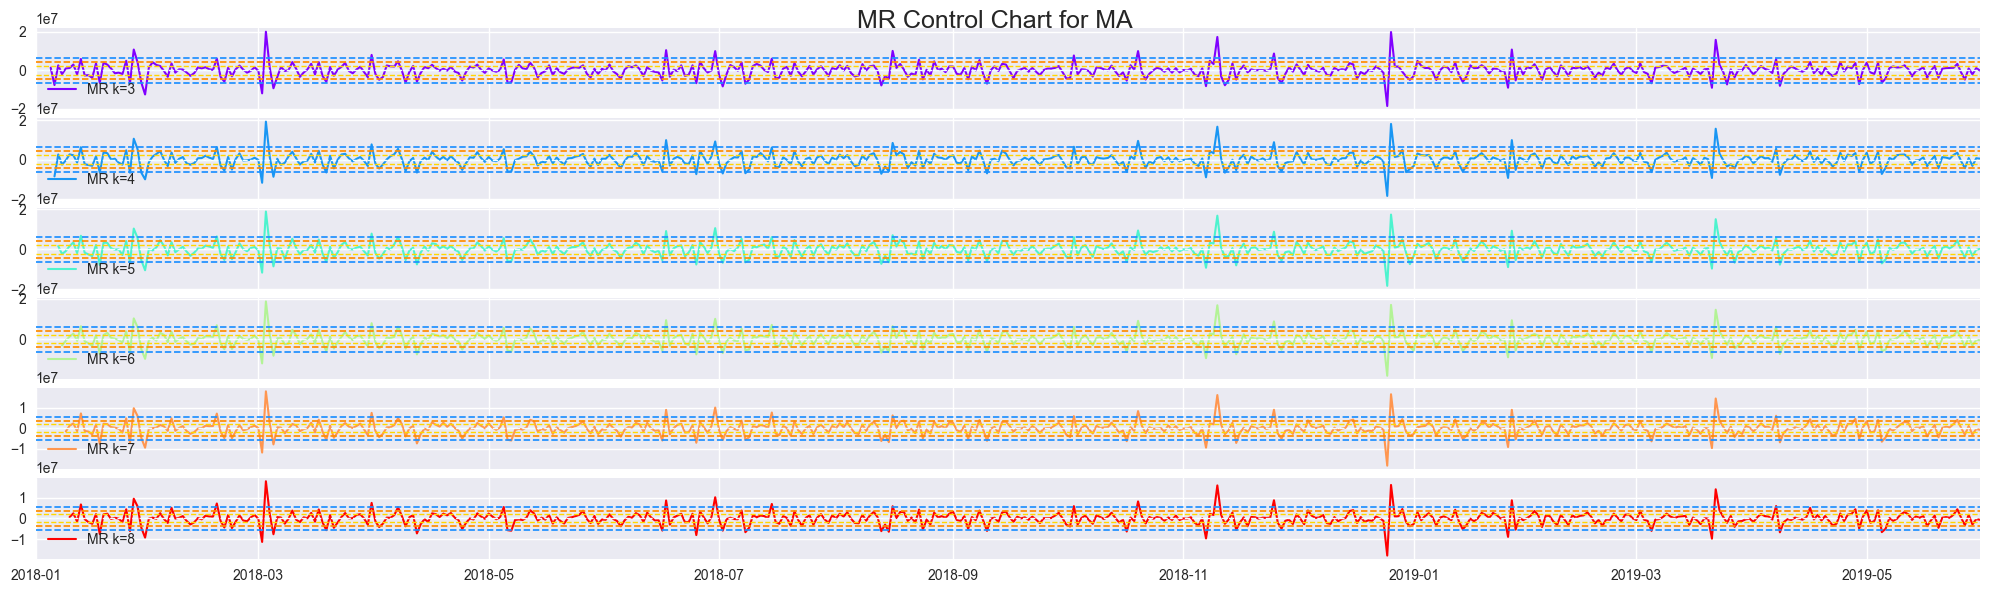

In [20]:
plotting_MR_MA();

# Trend MA

In [21]:
# input= k , index , demand
def forcast_calc(k,index , demand):
    sum_d = np.sum(demand)
    sum_td = np.sum([d*t for t,d in zip(index , demand)])
    m=max(index)
    forcast=(1/k)*sum_d + (6/(k*(k+1)))*(sum_td - ((2*m+1-k)/2)*sum_d)
    return forcast

In [22]:
df_MA_trend=df.copy()
for k in range(3,9):
    for i in range(k+1,len(df_MA_trend)+1):
        sales= df_MA_trend.loc[i-k:i-1,'Sales'].values
        index=df_MA_trend.loc[i-k:i-1,'Sales'].index
        forcast=forcast_calc(k , index,sales)
        df_MA_trend.loc[i,'MA{} Trend'.format(k)]=forcast #Forcast
        df_MA_trend.loc[i,'MA{} Trend Residual'.format(k)]=df_MA_trend.loc[i,'Sales']-df_MA_trend.loc[i,'MA{} Trend'.format(k)] #Residual
        df_MA_trend.loc[i,'MA{} Trend PE'.format(k)]=((df_MA_trend.loc[i,'Sales']-df_MA_trend.loc[i,'MA{} Trend'.format(k)])/df_MA_trend.loc[i,'Sales'])*100 #PE


for k in range(3,9):
    for i in range(k+1,len(df_MA_trend)):
        df_MA_trend.loc[i+1,'MA{} Trend MR'.format(k)]=df_MA_trend.loc[i+1,'MA{} Trend Residual'.format(k)]-df_MA_trend.loc[i,'MA{} Trend Residual'.format(k)] #MR

df_MA_trend.head()

Date       Sales    MA3 Trend  MA3 Trend Residual  MA3 Trend PE  \
1 2018-01-01  15345484.5          NaN                 NaN           NaN   
2 2018-01-02  19592415.0          NaN                 NaN           NaN   
3 2018-01-03  18652527.0          NaN                 NaN           NaN   
4 2018-01-04  19956267.0  19516996.75           439270.25      2.201164   
5 2018-01-05  22902651.0  19582329.00          3320322.00     14.497544   

    MA4 Trend  MA4 Trend Residual  MA4 Trend PE  MA5 Trend  \
1         NaN                 NaN           NaN        NaN   
2         NaN                 NaN           NaN        NaN   
3         NaN                 NaN           NaN        NaN   
4         NaN                 NaN           NaN        NaN   
5  20320542.3           2582108.7     11.274279        NaN   

   MA5 Trend Residual  ...  MA7 Trend PE  MA8 Trend  MA8 Trend Residual  \
1                 NaN  ...           NaN        NaN                 NaN   
2                 NaN  ...           NaN        NaN                 NaN   
3                 NaN  ...           NaN        NaN                 NaN   
4                 NaN  ...           NaN        NaN                 NaN   
5                 NaN  ...           NaN        NaN                 NaN   

   MA8 Trend PE  MA3 Trend MR  MA4 Trend MR  MA5 Trend MR  MA6 Trend MR  \
1           NaN           NaN           NaN           NaN           NaN   
2           NaN           NaN           NaN           NaN           NaN   
3           NaN           NaN           NaN           NaN           NaN   
4           NaN           NaN           NaN           NaN           NaN   
5           NaN    2881051.75           NaN           NaN           NaN   

   MA7 Trend MR  MA8 Trend MR  
1           NaN           NaN  
2           NaN           NaN  
3           NaN           NaN  
4           NaN           NaN  
5           NaN           NaN  

[5 rows x 26 columns]

In [23]:
from matplotlib.pyplot import cm
color = iter(cm.rainbow(np.linspace(0, 1, 6)))
def plotting_MATrend():
    
    plt.figure(figsize=(20,4))
    plt.style.use('seaborn')
    plt.plot(df_MA_trend['Date'] , df_MA_trend['Sales'] , alpha=0.8 , c='black',label='Sales',linewidth=1)
    for k in range(3,9):
        c=next(color)
        plt.plot(df_MA_trend['Date'] , df_MA_trend['MA{} Trend'.format(k)] ,c=c, alpha=0.6,ls='--',label='Prediction k={}'.format(k),linewidth=1)
    plt.legend()
    plt.tight_layout()
    plt.xlim((pd.Timestamp('2018-01-01'),pd.Timestamp('2019-05-31')))
    plt.title('Trend MA Prediction',fontsize=18)
    plt.show()

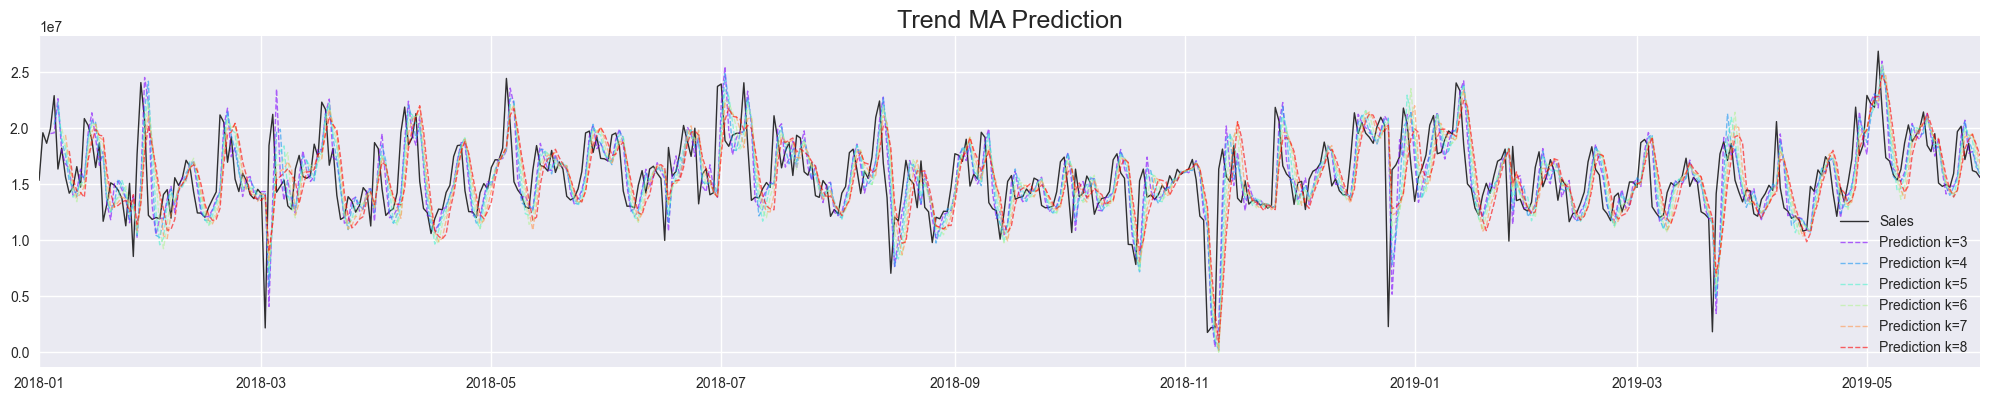

In [24]:
plotting_MATrend()

In [25]:
color = iter(cm.rainbow(np.linspace(0, 1, 6)))
def plotting_subMATrend():
    fig,ax=plt.subplots(nrows=7,ncols=1,figsize=(20,6),sharex=True)
    plt.style.use('seaborn')
    ax[0].plot(df_MA_trend['Date'] , df_MA_trend['Sales'] , alpha=1 , c='black',label='Sales',linewidth=2)
    ax[0].set_xlim((pd.Timestamp('2018-01-01'),pd.Timestamp('2019-05-31')))
    for k in range(3,9):
        c=next(color)
        ax[k-2].plot(df_MA_trend['Date'] , df_MA_trend['MA{} Trend'.format(k)] , c=c,alpha=1,ls='--',label='Prediction k={}'.format(k),linewidth=2)
        ax[k-2].set_xlim((pd.Timestamp('2018-01-01'),pd.Timestamp('2019-05-31')))
    for k in range(7):
        ax[k].set_ylim((1762000,26871000))
        ax[k].legend(loc='lower left')
    plt.tight_layout()
    plt.suptitle('Trend MA Prediction',fontsize=18)
    plt.subplots_adjust(top=0.95,hspace=0.1)
    plt.show();

In [29]:
# plotting_subMATrend()

### Assessing model accuracy

In [26]:
# ME
all_resid={}
for k in range(3,9):
    mean_reidual=np.nanmean(df_MA_trend.loc[:,'MA{} Trend Residual'.format(k)])
    all_resid[k]=mean_reidual
    print('ME for Trend MA model with k={} is {:.2f}'.format(k,mean_reidual))

print('\033[1mBest model is k={} with ME={:.2f}\033[0m\n\n'.format(min_calc(all_resid)[0] , min_calc(all_resid)[1]))

#MAE
MAE={}
for k in range(3,9):
    mean_reidual=np.nanmean(np.absolute(df_MA_trend.loc[:,'MA{} Trend Residual'.format(k)]))
    MAE[k]=mean_reidual
    print('MAE for Trend MA model with k={} is {:.2f}'.format(k,mean_reidual))

print('\033[1mBest model is k={} with MAE={:.2f}\033[0m\n\n'.format(min_calc(MAE)[0] , min_calc(MAE)[1]))

#MSE
all_resid={}
for k in range(3,9):
    mean_reidual=np.nanmean((df_MA_trend.loc[:,'MA{} Trend Residual'.format(k)])**2)
    all_resid[k]=mean_reidual
    print('MSE for Trend MA model with k={} is {:.2f}'.format(k,mean_reidual))

print('\033[1mBest model is k={} with MSE={:.2f}\033[0m\n\n'.format(min_calc(all_resid)[0] , min_calc(all_resid)[1]))

#MPE
all_resid={}
for k in range(3,9):
    mean_PE=np.nanmean(df_MA_trend.loc[:,'MA{} Trend PE'.format(k)])
    all_resid[k]=mean_PE
    print('MPE for Trend MA model with k={} is {:.2f}'.format(k,mean_PE))

print('\033[1mBest model is k={} with MPE={:.2f}\033[0m\n\n'.format(min_calc(all_resid)[0] , min_calc(all_resid)[1]))

#MAPE
all_resid={}
for k in range(3,9):
    mean_PE=np.nanmean(np.absolute(df_MA_trend.loc[:,'MA{} Trend PE'.format(k)]))
    all_resid[k]=mean_PE
    print('MAPE for Trend MA model with k={} is {:.2f}'.format(k,mean_PE))

print('\033[1mBest model is k={} with MAPE={:.2f}\033[0m\n\n'.format(min_calc(all_resid)[0] , min_calc(all_resid)[1]))

#TS
all_resid={}
for k in range(3,9):
    TS=np.nansum(df_MA_trend.loc[:,'MA{} Trend Residual'.format(k)])/MAE[k]
    all_resid[k]=TS
    print('TS for Trend MA model with k={} is {:.2f}'.format(k,TS))

print('\033[1mBest model is k={} with TS={:.2f}\033[0m'.format(min_calc(all_resid)[0] , min_calc(all_resid)[1]))

ME for Trend MA model with k=3 is -7369.23
ME for Trend MA model with k=4 is -10642.54
ME for Trend MA model with k=5 is -17676.55
ME for Trend MA model with k=6 is -9221.46
ME for Trend MA model with k=7 is -8787.16
ME for Trend MA model with k=8 is -2690.08
Best model is k=8 with ME=-2690.08


MAE for Trend MA model with k=3 is 2107799.19
MAE for Trend MA model with k=4 is 2194610.59
MAE for Trend MA model with k=5 is 2286850.83
MAE for Trend MA model with k=6 is 2427375.20
MAE for Trend MA model with k=7 is 2558730.33
MAE for Trend MA model with k=8 is 2604876.76
Best model is k=3 with MAE=2107799.19


MSE for Trend MA model with k=3 is 9717888957475.78
MSE for Trend MA model with k=4 is 9956366189080.70
MSE for Trend MA model with k=5 is 10344208459216.95
MSE for Trend MA model with k=6 is 11407156341955.52
MSE for Trend MA model with k=7 is 12285454177954.47
MSE for Trend MA model with k=8 is 12481313596246.73
Best model is k=3 with MSE=9717888957475.78


MPE for Trend MA model wi

### MR Trend MA

In [27]:
color = iter(cm.rainbow(np.linspace(0, 1, 6)))
def plotting_MR_MA():
    fig,ax=plt.subplots(nrows=6,ncols=1,figsize=(20,6),sharex=True)
    plt.style.use('seaborn')
    for k in range(3,9):
        c=next(color)
        ax[k-3].plot(df_MA_trend['Date'] , df_MA_trend['MA{} Trend MR'.format(k)] , c=c,alpha=1,ls='-',label='MR k={}'.format(k),linewidth=1.5) #MR
        MR_bar=np.nanmean([abs(x) for x in df_MA_trend['MA{} Trend MR'.format(k)]])
        ax[k-3].plot(df_MA_trend['Date'] , np.full( shape=(516,) , fill_value=0) , c='azure',ls='--' , linewidth=1) #CL
        ax[k-3].plot(df_MA_trend['Date'] , np.full( shape=(516,) , fill_value=0.89*MR_bar) , c='gold',ls='--'  , linewidth=1) #+sigma
        ax[k-3].plot(df_MA_trend['Date'] , np.full( shape=(516,) , fill_value=-0.89*MR_bar) , c='gold',ls='--'  , linewidth=1) #-sigma
        ax[k-3].plot(df_MA_trend['Date'] , np.full( shape=(516,) , fill_value=1.77*MR_bar) , c='darkorange',ls='--' , linewidth=1.25) #2sigma
        ax[k-3].plot(df_MA_trend['Date'] , np.full( shape=(516,) , fill_value=-1.77*MR_bar) , c='darkorange',ls='--' , linewidth=1.25) #-2sigma
        ax[k-3].plot(df_MA_trend['Date'] , np.full( shape=(516,) , fill_value=2.66*MR_bar) , c='dodgerblue',ls='--' , linewidth=1.25) #3sigma
        ax[k-3].plot(df_MA_trend['Date'] , np.full( shape=(516,) , fill_value=-2.66*MR_bar) , c='dodgerblue',ls='--' , linewidth=1.25) #-3sigma
        ax[k-3].set_xlim((pd.Timestamp('2018-01-01'),pd.Timestamp('2019-05-31')))
        ax[k-3].legend(loc='upper left')

        
    plt.tight_layout()
    plt.suptitle('MR Control Chart for MA Trend',fontsize=18)
    plt.subplots_adjust(top=0.95,hspace=0.1)
    plt.show()

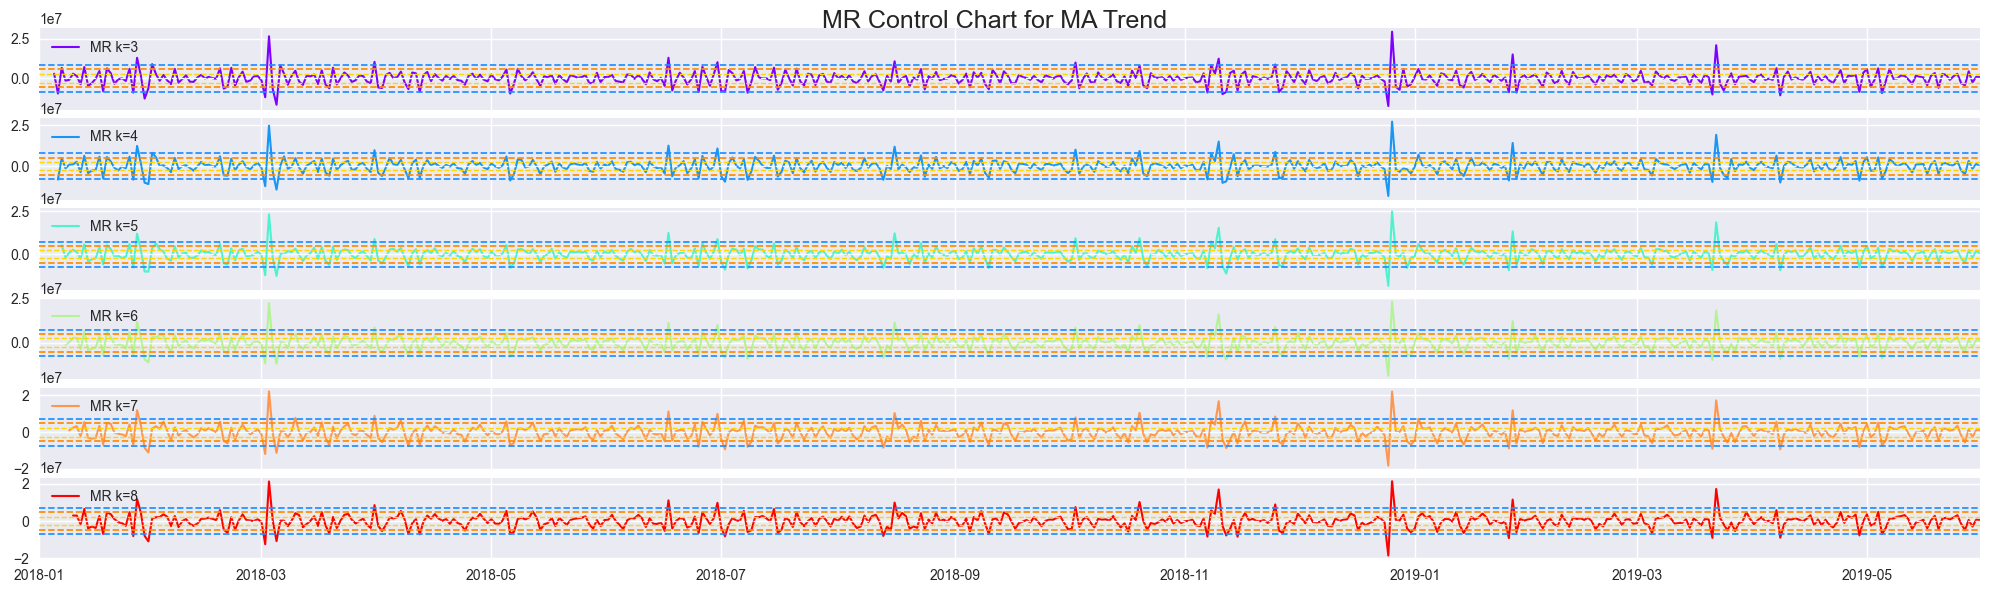

In [28]:
plotting_MR_MA()

# WMA
#### Because in the previous sections we concluded that k=3 and 8 are better for predictions, so we only use them and give them weights for predicting

In [29]:
def forcast_calc_WMA(k, demand):
    if k==3:
        weights=[0.7,0.2,0.1]
    elif k==8:
        weights=[0.6,0.1,1/20,1/20,1/20 , 1/20 , 1/20 , 1/20]
    forcast = np.sum([d*t for t,d in zip(weights , demand)])
    return forcast

In [30]:
df_WMA=df.copy()
for k in [3,8]:
    for i in range(k+1,len(df_WMA)+1):
        sales= df_WMA.loc[i-k:i-1,'Sales'].values
        forcast=forcast_calc_WMA(k ,sales)
        df_WMA.loc[i,'WMA{}'.format(k)]=forcast #Forcast
        df_WMA.loc[i,'WMA{} Residual'.format(k)]=df_WMA.loc[i,'Sales']-df_WMA.loc[i,'WMA{}'.format(k)] #Residual
        df_WMA.loc[i,'WMA{} PE'.format(k)]=((df_WMA.loc[i,'Sales']-df_WMA.loc[i,'WMA{}'.format(k)])/df_WMA.loc[i,'Sales'])*100 #PE


for k in [3,8]:
    for i in range(k+1,len(df_WMA)):
        df_WMA.loc[i+1,'WMA{} MR'.format(k)]=df_WMA.loc[i+1,'WMA{} Residual'.format(k)]-df_WMA.loc[i,'WMA{} Residual'.format(k)] #MR

df_WMA.head()

Date       Sales         WMA3  WMA3 Residual    WMA3 PE  WMA8  \
1 2018-01-01  15345484.5          NaN            NaN        NaN   NaN   
2 2018-01-02  19592415.0          NaN            NaN        NaN   NaN   
3 2018-01-03  18652527.0          NaN            NaN        NaN   NaN   
4 2018-01-04  19956267.0  16525574.85     3430692.15  17.191052   NaN   
5 2018-01-05  22902651.0  19440822.60     3461828.40  15.115405   NaN   

   WMA8 Residual  WMA8 PE   WMA3 MR  WMA8 MR  
1            NaN      NaN       NaN      NaN  
2            NaN      NaN       NaN      NaN  
3            NaN      NaN       NaN      NaN  
4            NaN      NaN       NaN      NaN  
5            NaN      NaN  31136.25      NaN

In [31]:
from matplotlib.pyplot import cm
color = iter(cm.rainbow(np.linspace(0, 1, 6)))
def plotting_WMA():
    
    plt.figure(figsize=(20,4))
    plt.style.use('seaborn')
    plt.plot(df_WMA['Date'] , df_WMA['Sales'] , alpha=0.8 , c='black',label='Sales',linewidth=1)
    for k in [3,8]:
        c=next(color)
        plt.plot(df_WMA['Date'] , df_WMA['WMA{}'.format(k)] ,c=c, alpha=0.6,ls='--',label='Prediction k={}'.format(k),linewidth=1)
    plt.legend()
    plt.tight_layout()
    plt.xlim((pd.Timestamp('2018-01-01'),pd.Timestamp('2019-05-31')))
    plt.title('WMA Prediction',fontsize=18)
    plt.show()

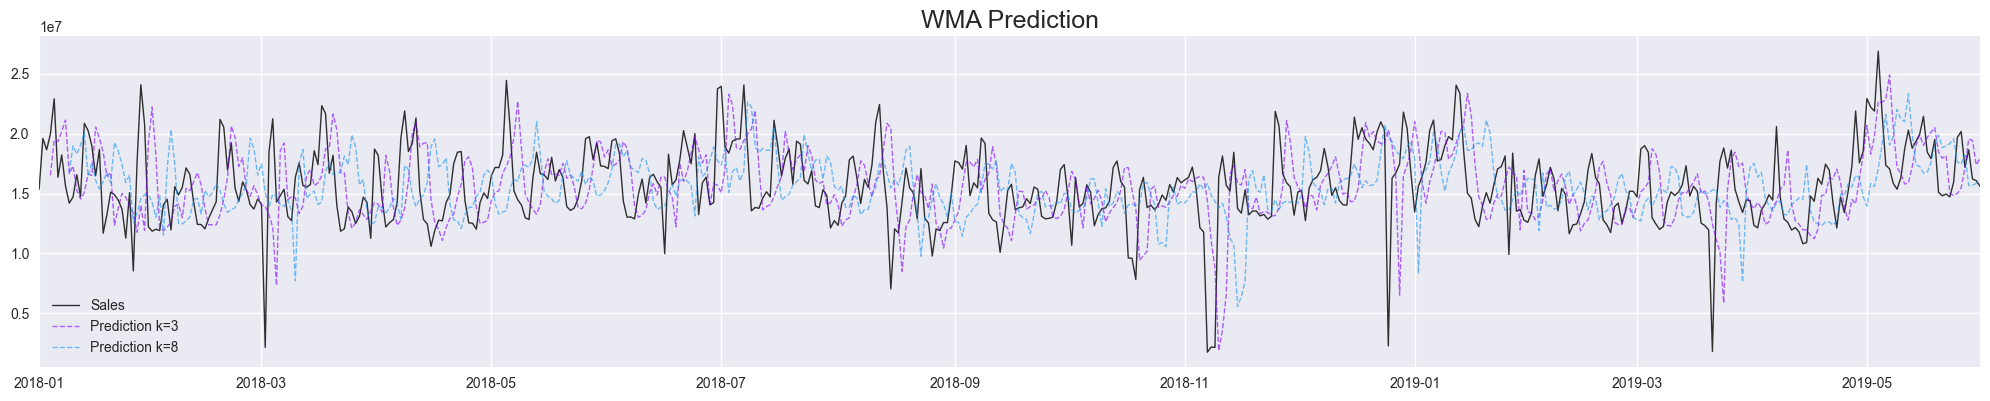

In [32]:
plotting_WMA()

In [33]:
color = iter(cm.rainbow(np.linspace(0, 1, 6)))
def plotting_subWMA():
    fig,ax=plt.subplots(nrows=3,ncols=1,figsize=(20,6),sharex=True)
    plt.style.use('seaborn')
    ax[0].plot(df_WMA['Date'] , df_WMA['Sales'] , alpha=1 , c='black',label='Sales',linewidth=2)
    ax[0].set_xlim((pd.Timestamp('2018-01-01'),pd.Timestamp('2019-05-31')))
    for k in [3,8]:
        c=next(color)
        if k==3:
            ax[k-2].plot(df_WMA['Date'] , df_WMA['WMA{}'.format(k)] , c=c,alpha=1,ls='--',label='Prediction k={}'.format(k),linewidth=2)
            ax[k-2].set_xlim((pd.Timestamp('2018-01-01'),pd.Timestamp('2019-05-31')))
        elif k==8:
            ax[k-6].plot(df_WMA['Date'] , df_WMA['WMA{}'.format(k)] , c=c,alpha=1,ls='--',label='Prediction k={}'.format(k),linewidth=2)
            ax[k-6].set_xlim((pd.Timestamp('2018-01-01'),pd.Timestamp('2019-05-31')))
    for k in range(3):
        ax[k].set_ylim((1762000,26871000))
        ax[k].legend(loc='lower left')
    plt.tight_layout()
    plt.suptitle('WMA Prediction',fontsize=18)
    plt.subplots_adjust(top=0.95,hspace=0.1)
    plt.show();

In [38]:
# plotting_subWMA()

### Assessing model accuracy

In [34]:
# ME
all_resid={}
for k in [3,8]:
    mean_reidual=np.nanmean(df_WMA.loc[:,'WMA{} Residual'.format(k)])
    all_resid[k]=mean_reidual
    print('ME for WMA model with k={} is {:.2f}'.format(k,mean_reidual))

print('\033[1mBest model is k={} with ME={:.2f}\033[0m\n\n'.format(min_calc(all_resid)[0] , min_calc(all_resid)[1]))

#MAE
MAE={}
for k in [3,8]:
    mean_reidual=np.nanmean(np.absolute(df_WMA.loc[:,'WMA{} Residual'.format(k)]))
    MAE[k]=mean_reidual
    print('MAE for WMA model with k={} is {:.2f}'.format(k,mean_reidual))

print('\033[1mBest model is k={} with MAE={:.2f}\033[0m\n\n'.format(min_calc(MAE)[0] , min_calc(MAE)[1]))

#MSE
all_resid={}
for k in [3,8]:
    mean_reidual=np.nanmean((df_WMA.loc[:,'WMA{} Residual'.format(k)])**2)
    all_resid[k]=mean_reidual
    print('MSE for WMA model with k={} is {:.2f}'.format(k,mean_reidual))

print('\033[1mBest model is k={} with MSE={:.2f}\033[0m\n\n'.format(min_calc(all_resid)[0] , min_calc(all_resid)[1]))

#MPE
all_resid={}
for k in [3,8]:
    mean_PE=np.nanmean(df_WMA.loc[:,'WMA{} PE'.format(k)])
    all_resid[k]=mean_PE
    print('MPE for WMA model with k={} is {:.2f}'.format(k,mean_PE))

print('\033[1mBest model is k={} with MPE={:.2f}\033[0m\n\n'.format(min_calc(all_resid)[0] , min_calc(all_resid)[1]))

#MAPE
all_resid={}
for k in [3,8]:
    mean_PE=np.nanmean(np.absolute(df_WMA.loc[:,'WMA{} PE'.format(k)]))
    all_resid[k]=mean_PE
    print('MAPE for WMA model with k={} is {:.2f}'.format(k,mean_reidual))

print('\033[1mBest model is k={} with MAPE={:.2f}\033[0m\n\n'.format(min_calc(all_resid)[0] , min_calc(all_resid)[1]))

#TS
all_resid={}
for k in [3,8]:
    TS=np.nansum(df_WMA.loc[:,'WMA{} Residual'.format(k)])/MAE[k]
    all_resid[k]=TS
    print('TS for WMA model with k={} is {:.2f}'.format(k,TS))

print('\033[1mBest model is k={} with TS={:.2f}\033[0m'.format(min_calc(all_resid)[0] , min_calc(all_resid)[1]))

ME for WMA model with k=3 is -10920.74
ME for WMA model with k=8 is -12682.10
Best model is k=3 with ME=-10920.74


MAE for WMA model with k=3 is 2773929.18
MAE for WMA model with k=8 is 3005518.10
Best model is k=3 with MAE=2773929.18


MSE for WMA model with k=3 is 14051648202334.56
MSE for WMA model with k=8 is 14394797312210.88
Best model is k=3 with MSE=14051648202334.56


MPE for WMA model with k=3 is -8.46
MPE for WMA model with k=8 is -10.08
Best model is k=3 with MPE=-8.46


MAPE for WMA model with k=3 is 14394797312210.88
MAPE for WMA model with k=8 is 14394797312210.88
Best model is k=3 with MAPE=23.84


TS for WMA model with k=3 is -2.02
TS for WMA model with k=8 is -2.14
Best model is k=3 with TS=-2.02


# MR WMA

In [35]:
color = iter(cm.rainbow(np.linspace(0, 1, 6)))
def plotting_MR_WMA():
    fig,ax=plt.subplots(nrows=2,ncols=1,figsize=(20,3),sharex=True)
    plt.style.use('seaborn')
    for k in [3,8]:
        c=next(color)
        if k==3: i=0
        elif k==8: i=1
        ax[i].plot(df_WMA['Date'] , df_WMA['WMA{} MR'.format(k)] , c=c,alpha=1,ls='-',label='MR k={}'.format(k),linewidth=1.5) #MR
        MR_bar=np.nanmean([abs(x) for x in df_WMA['WMA{} MR'.format(k)]])
        ax[i].plot(df_WMA['Date'] , np.full( shape=(516,) , fill_value=0) , c='azure',ls='--' , linewidth=1) #CL
        ax[i].plot(df_WMA['Date'] , np.full( shape=(516,) , fill_value=0.89*MR_bar) , c='gold',ls='--'  , linewidth=1) #+sigma
        ax[i].plot(df_WMA['Date'] , np.full( shape=(516,) , fill_value=-0.89*MR_bar) , c='gold',ls='--'  , linewidth=1) #-sigma
        ax[i].plot(df_WMA['Date'] , np.full( shape=(516,) , fill_value=1.77*MR_bar) , c='darkorange',ls='--' , linewidth=1.25) #2sigma
        ax[i].plot(df_WMA['Date'] , np.full( shape=(516,) , fill_value=-1.77*MR_bar) , c='darkorange',ls='--' , linewidth=1.25) #-2sigma
        ax[i].plot(df_WMA['Date'] , np.full( shape=(516,) , fill_value=2.66*MR_bar) , c='dodgerblue',ls='--' , linewidth=1.25) #3sigma
        ax[i].plot(df_WMA['Date'] , np.full( shape=(516,) , fill_value=-2.66*MR_bar) , c='dodgerblue',ls='--' , linewidth=1.25) #-3sigma
        ax[i].set_xlim((pd.Timestamp('2018-01-01'),pd.Timestamp('2019-05-31')))
        ax[i].legend(loc='lower left')

        
    plt.tight_layout()
    plt.suptitle('MR Control Chart for WMA',fontsize=18)
    plt.subplots_adjust(top=0.9,hspace=0.2)
    plt.show()

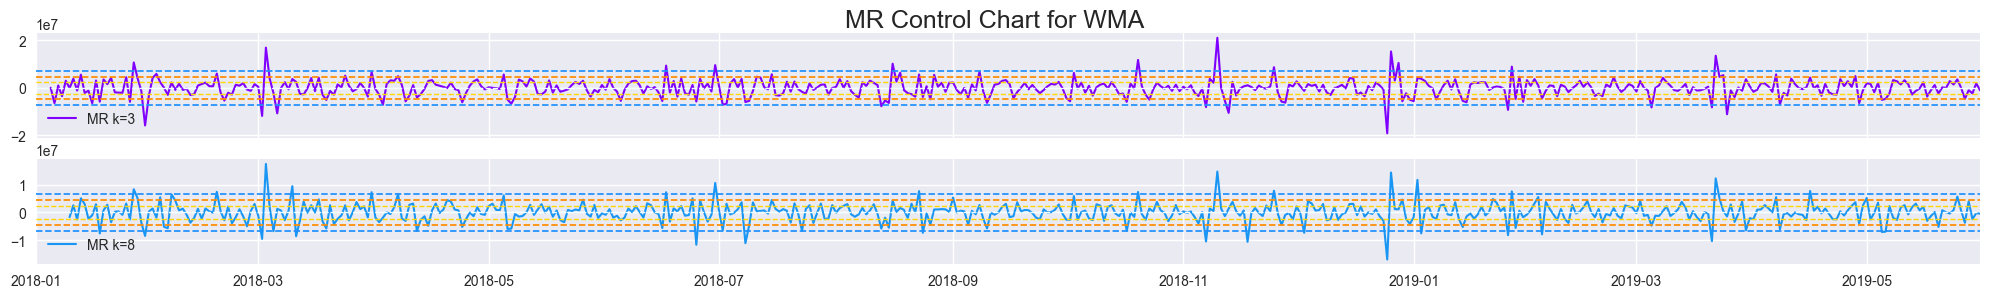

In [36]:
plotting_MR_WMA()

# Simple Exponential Smoothing

In [37]:
#forcast func
def simple_exp_forcast(alpha , forcast_prev,demand):
    forcast=forcast_prev+alpha*(demand-forcast_prev)
    return forcast

In [38]:
df_exp=df.copy()

for alpha in np.around(np.linspace(0.1 , 0.9 , 5),1):
    df_exp.loc[2,'exp alpha={}'.format(alpha)]=df_exp.loc[1,'Sales']
    for i in range (3 , len(df_exp)+1):
        demand=df_exp.loc[i-1,'Sales']
        prev_forcast=df_exp.loc[i-1,'exp alpha={}'.format(alpha)]
        forcast=simple_exp_forcast(alpha , prev_forcast , demand)
        df_exp.loc[i,'exp alpha={}'.format(alpha)]=forcast #Forcast
        df_exp.loc[i,'exp alpha={} Residual'.format(alpha)]=df_exp.loc[i,'Sales']-df_exp.loc[i,'exp alpha={}'.format(alpha)] #Residual
        df_exp.loc[i,'exp alpha={} PE'.format(alpha)]=((df_exp.loc[i,'Sales']-df_exp.loc[i,'exp alpha={}'.
                                                                                             format(alpha)])/df_exp.loc[i,'Sales'])*100 #PE
        
        
for alpha in np.around(np.linspace(0.1 , 0.9 , 5),1):
    for i in range(3,len(df_exp)):
        df_exp.loc[i+1,'exp alpha={} MR'.format(alpha)]=df_exp.loc[i+1,'exp alpha={} Residual'.format(alpha)]-df_exp.loc[i,'exp alpha={} Residual'.format(alpha)] #MR

df_exp.head()

Date       Sales  exp alpha=0.1  exp alpha=0.1 Residual  \
1 2018-01-01  15345484.5            NaN                     NaN   
2 2018-01-02  19592415.0   1.534548e+07                     NaN   
3 2018-01-03  18652527.0   1.577018e+07            2.882349e+06   
4 2018-01-04  19956267.0   1.605841e+07            3.897855e+06   
5 2018-01-05  22902651.0   1.644820e+07            6.454453e+06   

   exp alpha=0.1 PE  exp alpha=0.3  exp alpha=0.3 Residual  exp alpha=0.3 PE  \
1               NaN            NaN                     NaN               NaN   
2               NaN   1.534548e+07                     NaN               NaN   
3         15.452863   1.661956e+07            2.032963e+06         10.899131   
4         19.531982   1.722945e+07            2.726814e+06         13.663950   
5         28.182122   1.804750e+07            4.855154e+06         21.199092   

   exp alpha=0.5  exp alpha=0.5 Residual  ...  exp alpha=0.7 Residual  \
1            NaN                     NaN  ...                     NaN   
2   1.534548e+07                     NaN  ...                     NaN   
3   1.746895e+07            1.183577e+06  ...            3.341911e+05   
4   1.806074e+07            1.895529e+06  ...            1.403997e+06   
5   1.900850e+07            3.894148e+06  ...            3.367583e+06   

   exp alpha=0.7 PE  exp alpha=0.9  exp alpha=0.9 Residual  exp alpha=0.9 PE  \
1               NaN            NaN                     NaN               NaN   
2               NaN   1.534548e+07                     NaN               NaN   
3          1.791667   1.916772e+07           -5.151949e+05         -2.762065   
4          7.035371   1.870405e+07            1.252221e+06          6.274823   
5         14.703901   1.983104e+07            3.071606e+06         13.411574   

   exp alpha=0.1 MR  exp alpha=0.3 MR  exp alpha=0.5 MR  exp alpha=0.7 MR  \
1               NaN               NaN               NaN               NaN   
2               NaN               NaN               NaN               NaN   
3               NaN               NaN               NaN               NaN   
4      1.015505e+06      6.938510e+05      7.119514e+05      1.069806e+06   
5      2.556599e+06      2.128340e+06      1.998620e+06      1.963586e+06   

   exp alpha=0.9 MR  
1               NaN  
2               NaN  
3               NaN  
4      1.767415e+06  
5      1.819386e+06  

[5 rows x 22 columns]

In [39]:
from matplotlib.pyplot import cm
color = iter(cm.rainbow(np.linspace(0, 1, 6)))
def plotting_exp():
    
    plt.figure(figsize=(20,4))
    plt.style.use('seaborn')
    plt.plot(df_exp['Date'] , df_exp['Sales'] , alpha=0.8 , c='black',label='Sales',linewidth=1)
    for alpha in np.around(np.linspace(0.1 , 0.9 , 5),1):
        c=next(color)
        plt.plot(df_exp['Date'] , df_exp['exp alpha={}'.format(alpha)] ,c=c, alpha=0.6,ls='--',label='Prediction alpha={}'.format(alpha),linewidth=1)
    plt.legend()
    plt.tight_layout()
    plt.xlim((pd.Timestamp('2018-01-01'),pd.Timestamp('2019-05-31')))
    plt.title('Simple Exponential Smoothing Prediction',fontsize=18)
    plt.show()

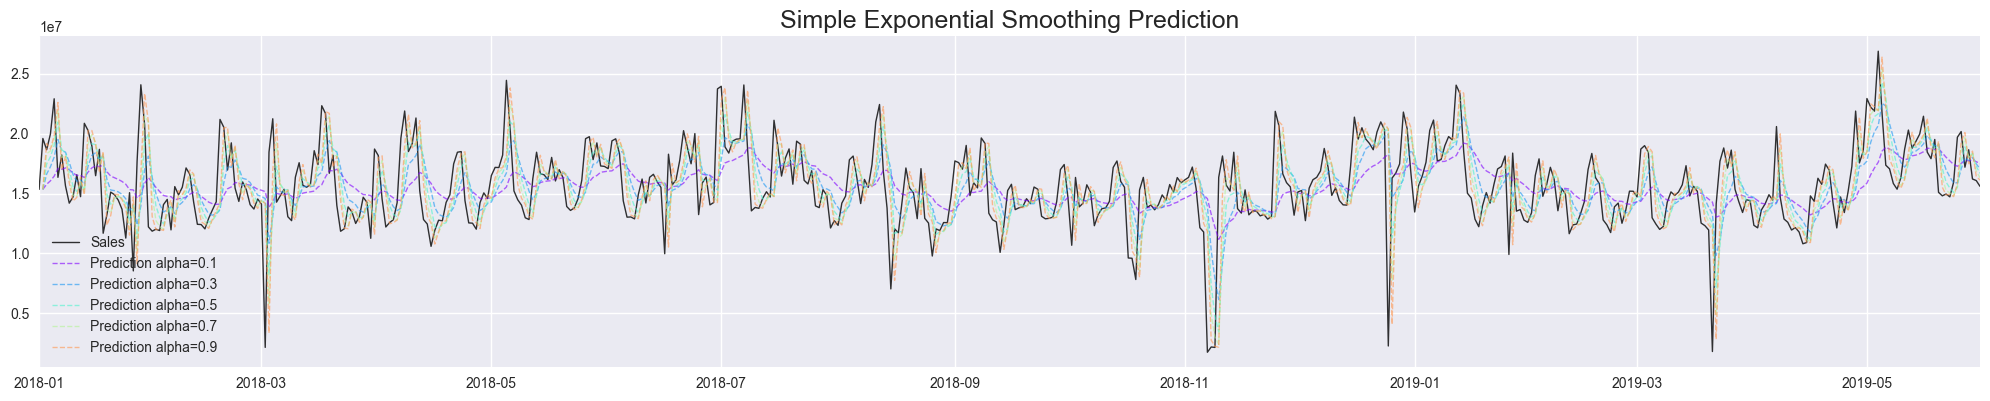

In [40]:
plotting_exp()

In [41]:
color = iter(cm.rainbow(np.linspace(0, 1, 6)))
def plotting_subexp():
    fig,ax=plt.subplots(nrows=6,ncols=1,figsize=(20,6),sharex=True)
    plt.style.use('seaborn')
    ax[0].plot(df_exp['Date'] , df_exp['Sales'] , alpha=1 , c='black',label='Sales',linewidth=2)
    ax[0].set_xlim((pd.Timestamp('2018-01-01'),pd.Timestamp('2019-05-31')))
    for count,alpha in enumerate(np.around(np.linspace(0.1 , 0.9 , 5),1)):
        c=next(color)
        ax[count+1].plot(df_exp['Date'] , df_exp['exp alpha={}'.format(alpha)] , c=c,alpha=1,ls='--',
                         label='Prediction alpha={}'.format(alpha),linewidth=2)
        ax[count+1].set_xlim((pd.Timestamp('2018-01-01'),pd.Timestamp('2019-05-31')))
    for k in range(6):
        ax[k].set_ylim((1762000,26871000))
        ax[k].legend(loc='lower left')
    plt.tight_layout()
    plt.suptitle('Simple Exponential Smoothing Prediction',fontsize=18)
    plt.subplots_adjust(top=0.95,hspace=0.1)
    plt.show();

In [52]:
# plotting_subexp()

In [42]:
# ME
all_resid={}
for alpha in np.around(np.linspace(0.1 , 0.9 , 5),1):
    mean_reidual=np.nanmean(df_exp.loc[:,'exp alpha={} Residual'.format(alpha)])
    all_resid[alpha]=mean_reidual
    print('ME for Simple Exp Smoothing model with alpha={} is {:.2f}'.format(alpha,mean_reidual))

print('\033[1mBest model is alpha={} with ME={:.2f}\033[0m\n\n'.format(min_calc(all_resid)[0] , min_calc(all_resid)[1]))

#MAE
MAE={}
for alpha in np.around(np.linspace(0.1 , 0.9 , 5),1):
    mean_reidual=np.nanmean(np.absolute(df_exp.loc[:,'exp alpha={} Residual'.format(alpha)]))
    MAE[alpha]=mean_reidual
    print('MAE for Simple Exp Smoothing model with alpha={} is {:.2f}'.format(alpha,mean_reidual))

print('\033[1mBest model is alpha={} with MAE={:.2f}\033[0m\n\n'.format(min_calc(MAE)[0] , min_calc(MAE)[1]))

#MSE
all_resid={}
for alpha in np.around(np.linspace(0.1 , 0.9 , 5),1):
    mean_reidual=np.nanmean((df_exp.loc[:,'exp alpha={} Residual'.format(alpha)])**2)
    all_resid[alpha]=mean_reidual
    print('MSE for Simple Exp Smoothing model with alpha={} is {:.2f}'.format(alpha,mean_reidual))

print('\033[1mBest model is k={} with MSE={:.2f}\033[0m\n\n'.format(min_calc(all_resid)[0] , min_calc(all_resid)[1]))

#MPE
all_resid={}
for alpha in np.around(np.linspace(0.1 , 0.9 , 5),1):
    mean_PE=np.nanmean(df_exp.loc[:,'exp alpha={} PE'.format(alpha)])
    all_resid[alpha]=mean_PE
    print('MPE for Simple Exp Smoothing model with alpha={} is {:.2f}'.format(alpha,mean_PE))

print('\033[1mBest model is alpha={} with MPE={:.2f}\033[0m\n\n'.format(min_calc(all_resid)[0] , min_calc(all_resid)[1]))

#MAPE
all_resid={}
for alpha in np.around(np.linspace(0.1 , 0.9 , 5),1):
    mean_PE=np.nanmean(np.absolute(df_exp.loc[:,'exp alpha={} PE'.format(alpha)]))
    all_resid[alpha]=mean_PE
    print('MAPE for Simple Exp Smoothing model with alpha={} is {:.2f}'.format(alpha,mean_PE))

print('\033[1mBest model is alpha={} with MAPE={:.2f}\033[0m\n\n'.format(min_calc(all_resid)[0] , min_calc(all_resid)[1]))

#TS
all_resid={}
for alpha in np.around(np.linspace(0.1 , 0.9 , 5),1):
    TS=np.nansum(df_exp.loc[:,'exp alpha={} Residual'.format(alpha)])/MAE[alpha]
    all_resid[alpha]=TS
    print('TS for Simple Exp Smoothing model with alpha={} is {:.2f}'.format(alpha,TS))

print('\033[1mBest model is alpha={} with TS={:.2f}\033[0m'.format(min_calc(all_resid)[0] , min_calc(all_resid)[1]))

ME for Simple Exp Smoothing model with alpha=0.1 is 29920.91
ME for Simple Exp Smoothing model with alpha=0.3 is 8.42
ME for Simple Exp Smoothing model with alpha=0.5 is -5164.93
ME for Simple Exp Smoothing model with alpha=0.7 is -6949.85
ME for Simple Exp Smoothing model with alpha=0.9 is -7596.69
Best model is alpha=0.3 with ME=8.42


MAE for Simple Exp Smoothing model with alpha=0.1 is 2316945.55
MAE for Simple Exp Smoothing model with alpha=0.3 is 2228845.73
MAE for Simple Exp Smoothing model with alpha=0.5 is 2108718.30
MAE for Simple Exp Smoothing model with alpha=0.7 is 2020683.88
MAE for Simple Exp Smoothing model with alpha=0.9 is 1972829.34
Best model is alpha=0.9 with MAE=1972829.34


MSE for Simple Exp Smoothing model with alpha=0.1 is 9747787778607.10
MSE for Simple Exp Smoothing model with alpha=0.3 is 9301196334098.19
MSE for Simple Exp Smoothing model with alpha=0.5 is 8872529989853.48
MSE for Simple Exp Smoothing model with alpha=0.7 is 8708118527104.82
MSE for Simple

In [43]:
color = iter(cm.rainbow(np.linspace(0, 1, 5)))
def plotting_MR_exp():
    fig,ax=plt.subplots(nrows=5,ncols=1,figsize=(20,5),sharex=True)
    plt.style.use('seaborn')
    for i,alpha in enumerate(np.around(np.linspace(0.1 , 0.9 , 5),1)):
        c=next(color)
        ax[i].plot(df_exp['Date'] , df_exp['exp alpha={} MR'.format(alpha)] , c=c,alpha=1,ls='-',label='MR alpha={}'.format(alpha),linewidth=1.5) #MR
        MR_bar=np.nanmean([abs(x) for x in df_exp['exp alpha={} MR'.format(alpha)]])
        ax[i].plot(df_exp['Date'] , np.full( shape=(516,) , fill_value=0) , c='azure',ls='--' , linewidth=1) #CL
        ax[i].plot(df_exp['Date'] , np.full( shape=(516,) , fill_value=0.89*MR_bar) , c='gold',ls='--'  , linewidth=1) #+sigma
        ax[i].plot(df_exp['Date'] , np.full( shape=(516,) , fill_value=-0.89*MR_bar) , c='gold',ls='--'  , linewidth=1) #-sigma
        ax[i].plot(df_exp['Date'] , np.full( shape=(516,) , fill_value=1.77*MR_bar) , c='darkorange',ls='--' , linewidth=1.25) #2sigma
        ax[i].plot(df_exp['Date'] , np.full( shape=(516,) , fill_value=-1.77*MR_bar) , c='darkorange',ls='--' , linewidth=1.25) #-2sigma
        ax[i].plot(df_exp['Date'] , np.full( shape=(516,) , fill_value=2.66*MR_bar) , c='dodgerblue',ls='--' , linewidth=1.25) #3sigma
        ax[i].plot(df_exp['Date'] , np.full( shape=(516,) , fill_value=-2.66*MR_bar) , c='dodgerblue',ls='--' , linewidth=1.25) #-3sigma
        ax[i].set_xlim((pd.Timestamp('2018-01-01'),pd.Timestamp('2019-05-31')))
        ax[i].legend(loc='upper left')

        
    plt.tight_layout()
    plt.suptitle('MR Control Chart for simple exp smoothing',fontsize=18)
    plt.subplots_adjust(top=0.93,hspace=0.2)
    plt.show()

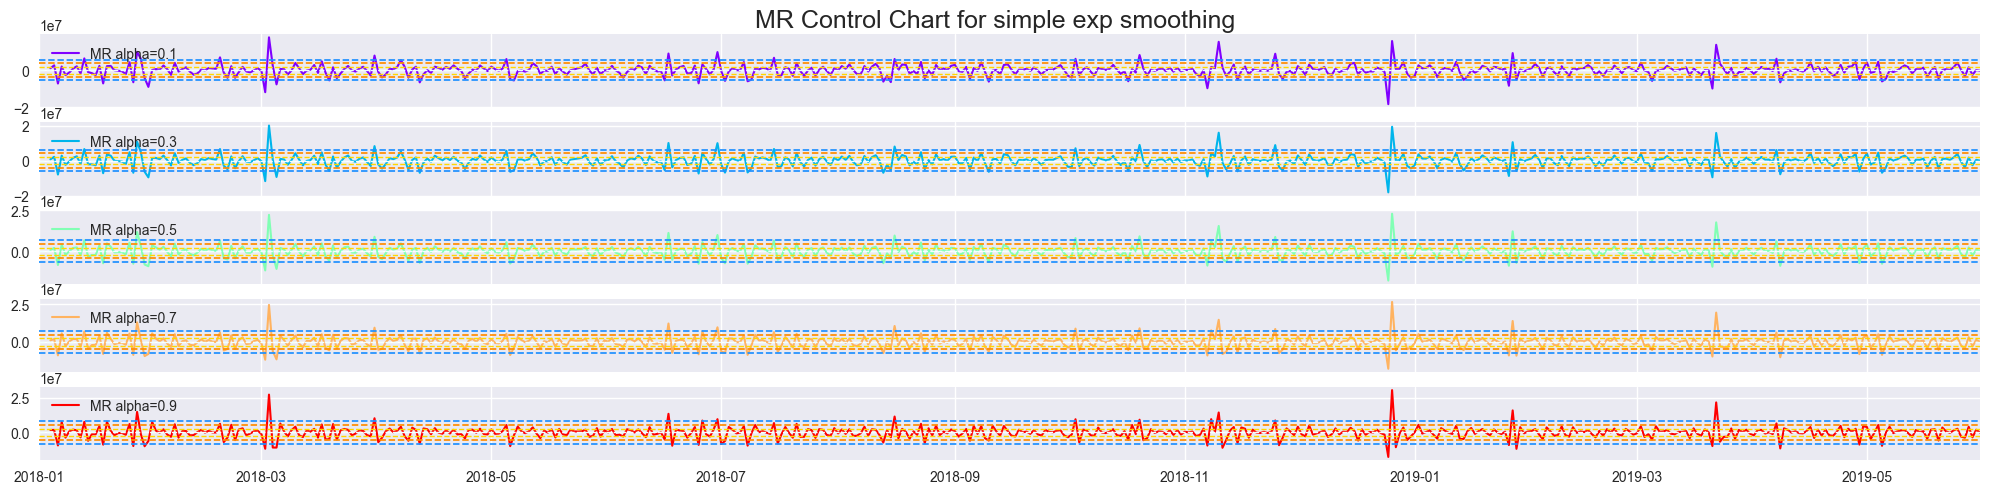

In [44]:
plotting_MR_exp()

### Some Clarifications slide 27
1) alpha=1 equals to LPD

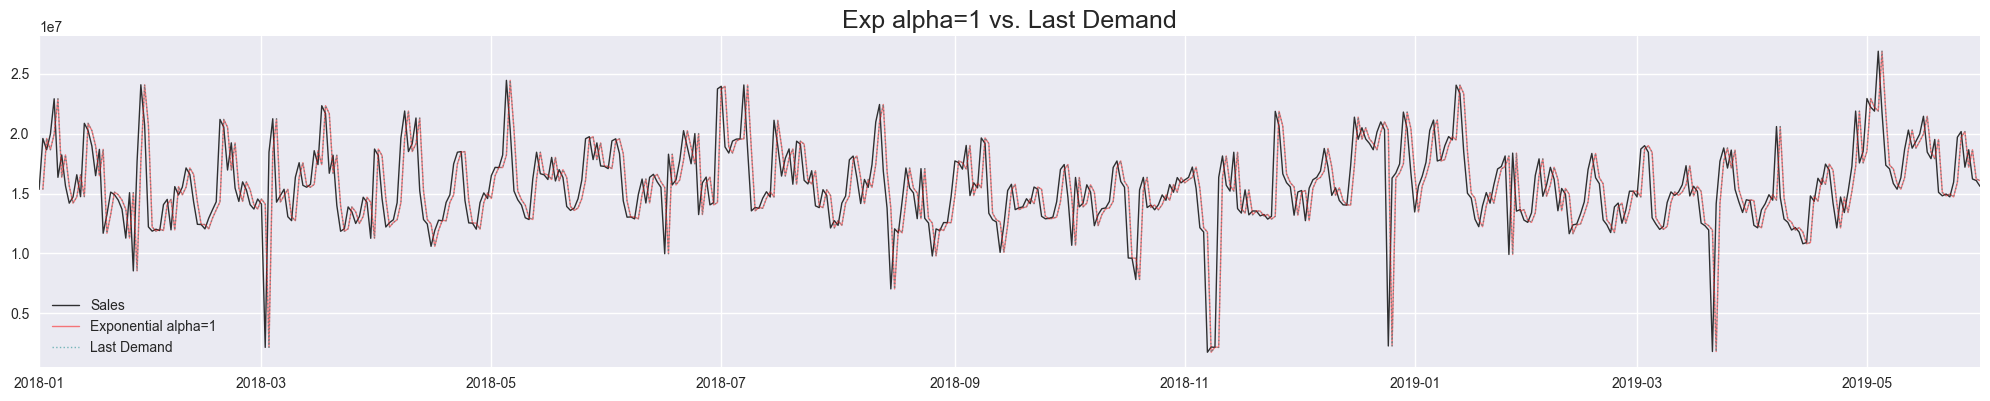

In [45]:
df_clar1=df.copy()

df_clar1.loc[2,'Forcast Exp']=df_clar1.loc[1,'Sales']
df_clar1.loc[2,'Forcast Last Dem']=df_clar1.loc[1,'Sales']
for i in range (3 , len(df_clar1)+1):
    
    demand=df_clar1.loc[i-1,'Sales']
    prev_forcast=df_clar1.loc[i-1,'Forcast Exp']
    forcast=simple_exp_forcast(1 , prev_forcast , demand)
    df_clar1.loc[i,'Forcast Exp']=forcast #Forcast Exponential
    
    df_clar1.loc[i,'Forcast Last Dem']=df_clar1.loc[i-1,'Sales'] #forcast last demand

    
plt.figure(figsize=(20,4))
plt.style.use('seaborn')
plt.plot(df_clar1['Date'] , df_clar1['Sales'] , alpha=0.8 , c='black',label='Sales',linewidth=1)
plt.plot(df_clar1['Date'] , df_clar1['Forcast Exp'] , alpha=0.5 , c='red',label='Exponential alpha=1',linewidth=1 , ls='-')
plt.plot(df_clar1['Date'] , df_clar1['Forcast Last Dem'] , alpha=0.5 , c='teal',label='Last Demand',linewidth=1 , ls=':')
plt.legend()
plt.tight_layout()
plt.xlim((pd.Timestamp('2018-01-01'),pd.Timestamp('2019-05-31')))
plt.title('Exp alpha=1 vs. Last Demand',fontsize=18)
plt.show()

2) alpha=0.13 , k=12,15,18

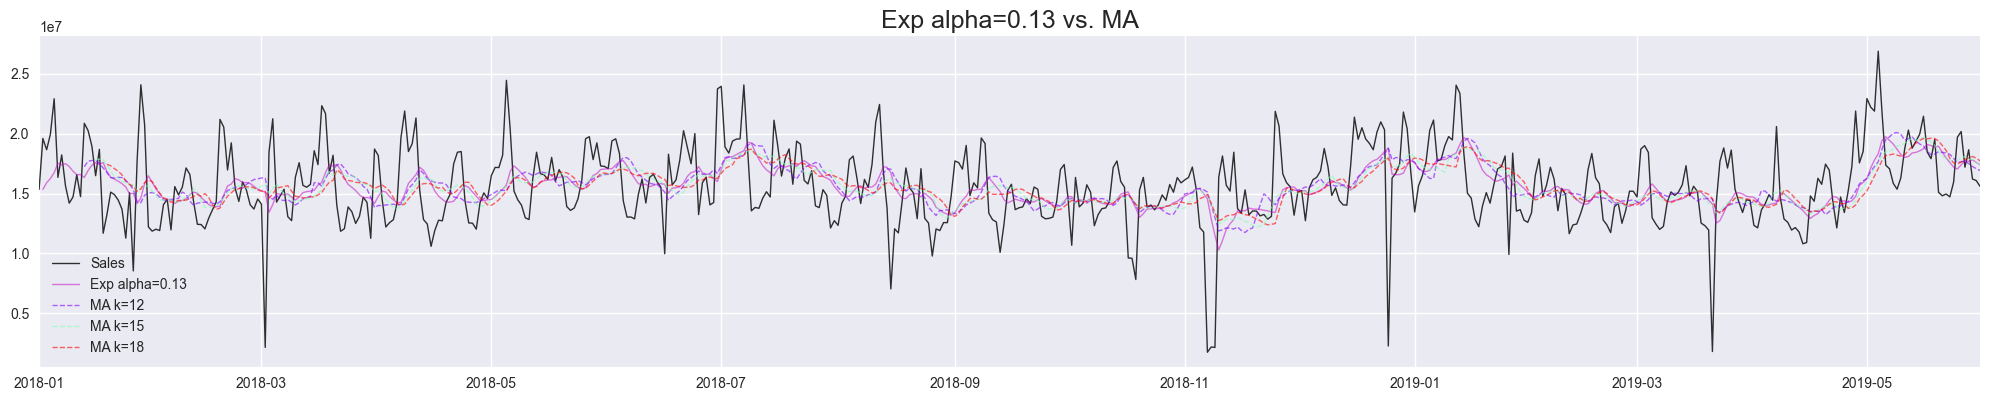

In [46]:
df_clar2=df.copy()

for k in [12,15,18]:
    for i in range(k+1,len(df_clar2)+1):
        df_clar2.loc[i,'MA{}'.format(k)]=np.mean(df_clar2.loc[i-k:i-1,'Sales']) #Forcast

df_clar2.loc[2,'Forcast Exp']=df_clar2.loc[1,'Sales']
for i in range (3 , len(df_clar2)+1):   
    demand=df_clar2.loc[i-1,'Sales']
    prev_forcast=df_clar2.loc[i-1,'Forcast Exp']
    forcast=simple_exp_forcast(0.13 , prev_forcast , demand)
    df_clar2.loc[i,'Forcast Exp']=forcast #Forcast Exponential
    
    
from matplotlib.pyplot import cm
color = iter(cm.rainbow(np.linspace(0, 1, 3)))
def plotting_clar2():
    
    plt.figure(figsize=(20,4))
    plt.style.use('seaborn')
    plt.plot(df_clar2['Date'] , df_clar2['Sales'] , alpha=0.8 , c='black',label='Sales',linewidth=1)
    plt.plot(df_clar2['Date'] , df_clar2['Forcast Exp'] , alpha=0.5 , c='m',label='Exp alpha=0.13',linewidth=1)
    for k in [12,15,18]:
        c=next(color)
        plt.plot(df_clar2['Date'] , df_clar2['MA{}'.format(k)] ,c=c, alpha=0.6,ls='--',label='MA k={}'.format(k),linewidth=1)
    plt.legend(loc='lower left')
    plt.tight_layout()
    plt.xlim((pd.Timestamp('2018-01-01'),pd.Timestamp('2019-05-31')))
    plt.title('Exp alpha=0.13 vs. MA',fontsize=18)
    plt.show()
plotting_clar2()

3) alpha=0.35 , k=3,6,9

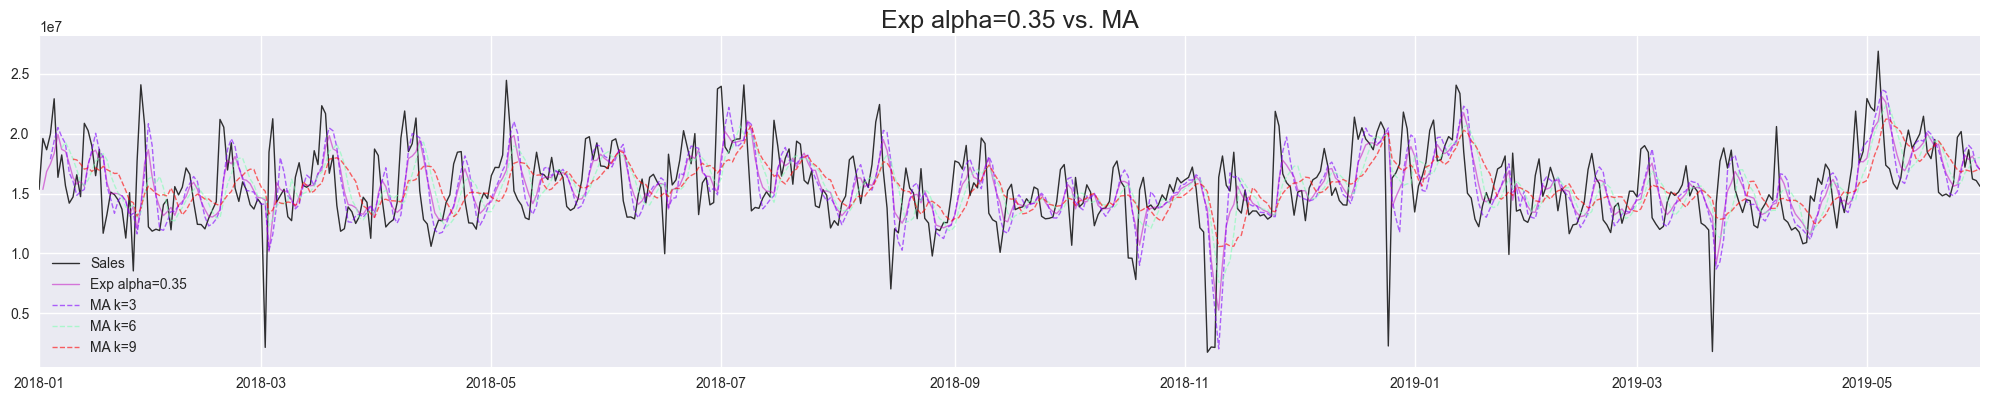

In [47]:
df_clar3=df.copy()
    
for k in [3,6,9]:
    for i in range(k+1,len(df_clar3)+1):
        df_clar3.loc[i,'MA{}'.format(k)]=np.mean(df_clar3.loc[i-k:i-1,'Sales']) #Forcast

df_clar3.loc[2,'Forcast Exp']=df_clar3.loc[1,'Sales']
for i in range (3 , len(df_clar3)+1):   
    demand=df_clar3.loc[i-1,'Sales']
    prev_forcast=df_clar3.loc[i-1,'Forcast Exp']
    forcast=simple_exp_forcast(0.35 , prev_forcast , demand)
    df_clar3.loc[i,'Forcast Exp']=forcast #Forcast Exponential
    
    
from matplotlib.pyplot import cm
color = iter(cm.rainbow(np.linspace(0, 1, 3)))
def plotting_clar3():
    
    plt.figure(figsize=(20,4))
    plt.style.use('seaborn')
    plt.plot(df_clar3['Date'] , df_clar3['Sales'] , alpha=0.8 , c='black',label='Sales',linewidth=1)
    plt.plot(df_clar3['Date'] , df_clar3['Forcast Exp'] , alpha=0.5 , c='m',label='Exp alpha=0.35',linewidth=1)
    for k in [3,6,9]:
        c=next(color)
        plt.plot(df_clar3['Date'] , df_clar3['MA{}'.format(k)] ,c=c, alpha=0.6,ls='--',label='MA k={}'.format(k),linewidth=1)
    plt.legend(loc='lower left')
    plt.tight_layout()
    plt.xlim((pd.Timestamp('2018-01-01'),pd.Timestamp('2019-05-31')))
    plt.title('Exp alpha=0.35 vs. MA',fontsize=18)
    plt.show()
plotting_clar3()

4) alpha=0.5 90% in 4 last periods

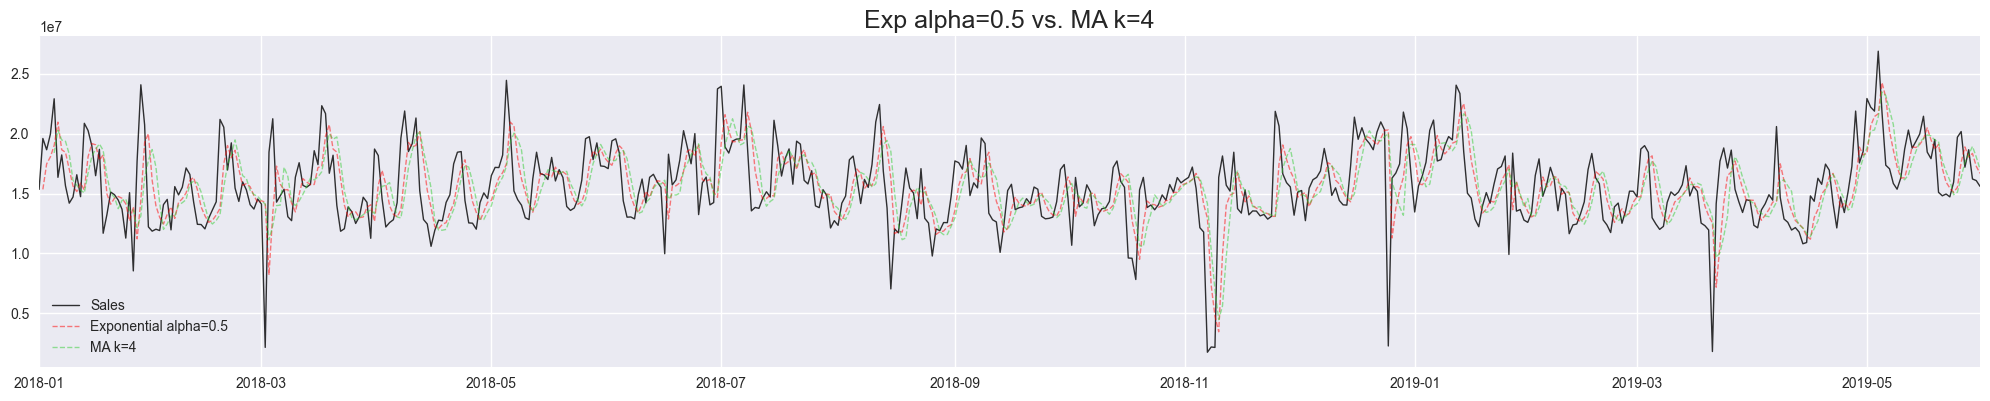

In [48]:
df_clar4=df.copy()

df_clar4.loc[2,'Forcast Exp']=df_clar4.loc[1,'Sales']
df_clar4.loc[2,'Forcast MA k=4']=df_clar4.loc[1,'Sales']

for i in range(5,len(df_clar4)+1):
    df_clar4.loc[i,'Forcast MA k=4']=np.mean(df_clar4.loc[i-4:i-1,'Sales']) #Forcast


for i in range (3 , len(df_clar4)+1):
    demand=df_clar4.loc[i-1,'Sales']
    prev_forcast=df_clar4.loc[i-1,'Forcast Exp']
    forcast=simple_exp_forcast(0.5 , prev_forcast , demand)
    df_clar4.loc[i,'Forcast Exp']=forcast #Forcast Exponential


    
plt.figure(figsize=(20,4))
plt.style.use('seaborn')
plt.plot(df_clar4['Date'] , df_clar4['Sales'] , alpha=0.8 , c='black',label='Sales',linewidth=1)
plt.plot(df_clar4['Date'] , df_clar4['Forcast Exp'] , alpha=0.5 , c='red',label='Exponential alpha=0.5',linewidth=1 , ls='--')
plt.plot(df_clar4['Date'] , df_clar4['Forcast MA k=4'] , alpha=0.5 , c='limegreen',label='MA k=4',linewidth=1 , ls='--')
plt.legend()
plt.tight_layout()
plt.xlim((pd.Timestamp('2018-01-01'),pd.Timestamp('2019-05-31')))
plt.title('Exp alpha=0.5 vs. MA k=4',fontsize=18)
plt.show()

5) alpha =0.1 k=22

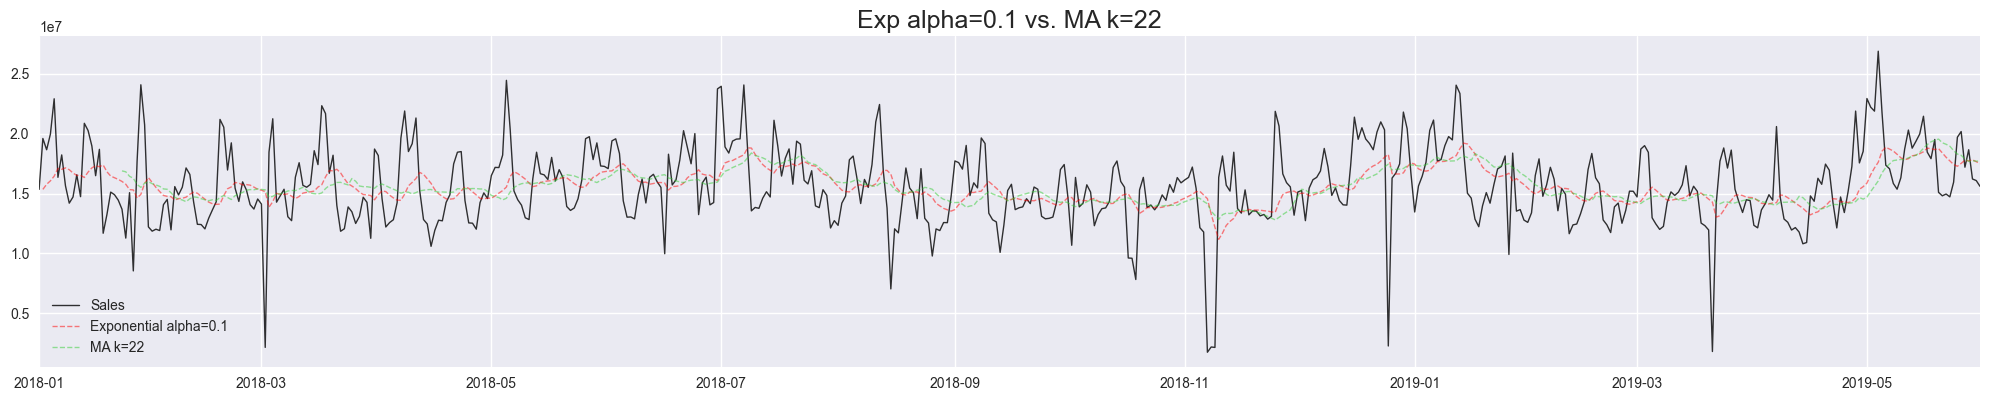

In [49]:
df_clar5=df.copy()

df_clar5.loc[2,'Forcast Exp']=df_clar5.loc[1,'Sales']
df_clar5.loc[2,'Forcast MA k=22']=df_clar5.loc[1,'Sales']

for i in range(23,len(df_clar5)+1):
    df_clar5.loc[i,'Forcast MA k=22']=np.mean(df_clar5.loc[i-22:i-1,'Sales']) #Forcast


for i in range (3 , len(df_clar5)+1):
    demand=df_clar5.loc[i-1,'Sales']
    prev_forcast=df_clar5.loc[i-1,'Forcast Exp']
    forcast=simple_exp_forcast(0.1 , prev_forcast , demand)
    df_clar5.loc[i,'Forcast Exp']=forcast #Forcast Exponential


    
plt.figure(figsize=(20,4))
plt.style.use('seaborn')
plt.plot(df_clar5['Date'] , df_clar5['Sales'] , alpha=0.8 , c='black',label='Sales',linewidth=1)
plt.plot(df_clar5['Date'] , df_clar5['Forcast Exp'] , alpha=0.5 , c='red',label='Exponential alpha=0.1',linewidth=1 , ls='--')
plt.plot(df_clar5['Date'] , df_clar5['Forcast MA k=22'] , alpha=0.5 , c='limegreen',label='MA k=22',linewidth=1 , ls='--')
plt.legend(loc='lower left')
plt.tight_layout()
plt.xlim(pd.Timestamp('2018-01-01'),pd.Timestamp('2019-05-31'))
plt.title('Exp alpha=0.1 vs. MA k=22',fontsize=18)
plt.show()

6) alpha=2/(k+1),   k=10

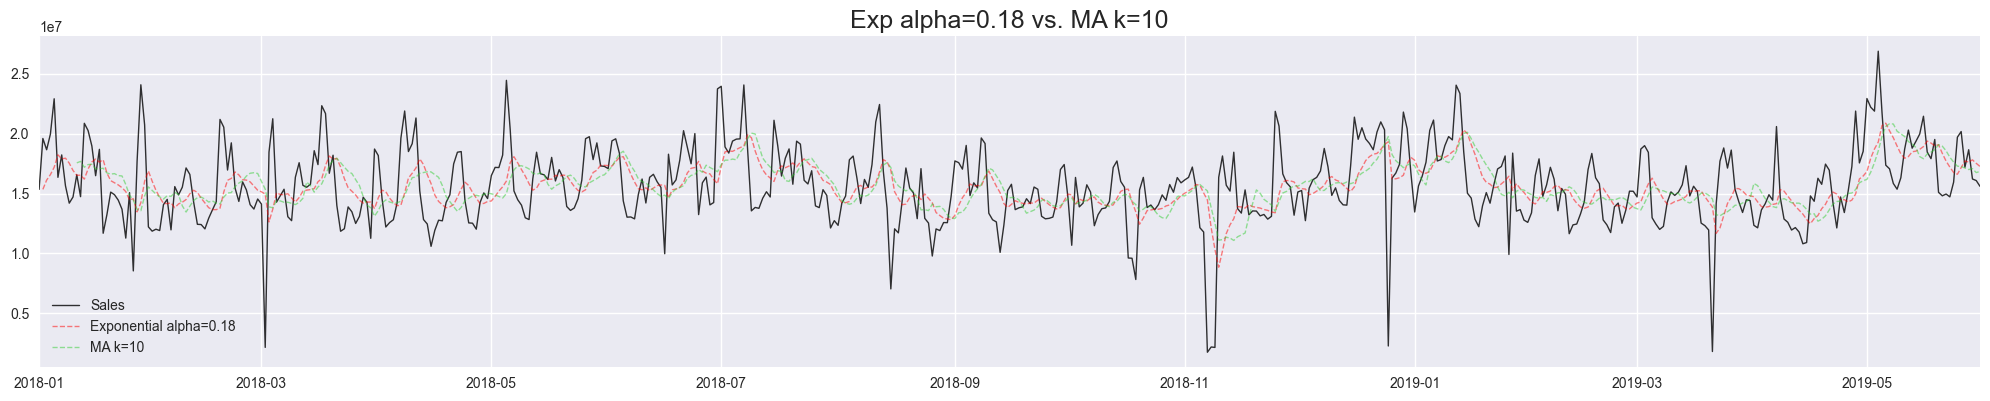

In [50]:
df_clar6=df.copy()
alpha=2/(10+1)
df_clar6.loc[2,'Forcast Exp']=df_clar6.loc[1,'Sales']
df_clar6.loc[2,'Forcast MA k=10']=df_clar6.loc[1,'Sales']

for i in range(11,len(df_clar6)+1):
    df_clar6.loc[i,'Forcast MA k=10']=np.mean(df_clar6.loc[i-10:i-1,'Sales']) #Forcast


for i in range (3 , len(df_clar6)+1):
    demand=df_clar6.loc[i-1,'Sales']
    prev_forcast=df_clar6.loc[i-1,'Forcast Exp']
    forcast=simple_exp_forcast(alpha , prev_forcast , demand)
    df_clar6.loc[i,'Forcast Exp']=forcast #Forcast Exponential


    
plt.figure(figsize=(20,4))
plt.style.use('seaborn')
plt.plot(df_clar6['Date'] , df_clar6['Sales'] , alpha=0.8 , c='black',label='Sales',linewidth=1)
plt.plot(df_clar6['Date'] , df_clar6['Forcast Exp'] , alpha=0.5 , c='red',label='Exponential alpha={:.2f}'.format(alpha),linewidth=1 , ls='--')
plt.plot(df_clar6['Date'] , df_clar6['Forcast MA k=10'] , alpha=0.5 , c='limegreen',label='MA k=10',linewidth=1 , ls='--')
plt.legend()
plt.tight_layout()
plt.xlim((pd.Timestamp('2018-01-01'),pd.Timestamp('2019-05-31')))
plt.title('Exp alpha={:.2f} vs. MA k=10'.format(alpha),fontsize=18)
plt.show()

# Trend Exponential Smoothing
we use alpha=0.9 in this part, because it has a lower MAE for Simple Exponential Smoothing, Which means that the sale is more related to the last period than the others

In [51]:
#forcast func
def trend_exp_forcast(alpha , beta ,demand , A_prev , T_prev ):
    
    A_now=alpha*demand+(1-alpha)*(A_prev + T_prev)
    T_now=beta*(A_now - A_prev)+(1-beta)*T_prev
    forcast=T_now + A_now
    return A_now , T_now , forcast

In [52]:
df_trend_exp=df.copy()

alpha=0.9
for beta in np.around(np.linspace(0.1 , 0.9 , 5),1):
    df_trend_exp.loc[1,'A beta={}'.format(beta)]=df_trend_exp.loc[1,'Sales']
    df_trend_exp.loc[1,'T beta={}'.format(beta)]=0
    df_trend_exp.loc[2,'Forcast beta={}'.format(beta)]=df_trend_exp.loc[1,'Sales']
    for i in range (2 , len(df_trend_exp)+1):
        A_prev=df_trend_exp.loc[i-1,'A beta={}'.format(beta)]
        T_prev=df_trend_exp.loc[i-1,'T beta={}'.format(beta)]
        demand=df_trend_exp.loc[i,'Sales']
        
        A,T,forcast=trend_exp_forcast(alpha , beta , demand ,A_prev,T_prev)
        
        df_trend_exp.loc[i,'A beta={}'.format(beta)]=A
        df_trend_exp.loc[i,'T beta={}'.format(beta)]=T
        if i!=len(df_trend_exp):
            df_trend_exp.loc[i+1,'Forcast beta={}'.format(beta)]=forcast
        
        df_trend_exp.loc[i,'Residual beta={}'.format(beta)]=df_trend_exp.loc[i,'Sales']-df_trend_exp.loc[i,'Forcast beta={}'.format(beta)] #Residual
        df_trend_exp.loc[i,'PE beta={}'.format(beta)]=(df_trend_exp.loc[i,'Residual beta={}'.format(beta)]/df_trend_exp.loc[i,'Sales'])*100 #PE
        
        
for beta in np.around(np.linspace(0.1 , 0.9 , 5),1):
    for i in range(2,len(df_trend_exp)):
        df_trend_exp.loc[i+1,'MR beta={}'.format(beta)]=df_trend_exp.loc[i+1,'Residual beta={}'
                                                                         .format(beta)]-df_trend_exp.loc[i,'Residual beta={}'.format(beta)] #MR

df_trend_exp['simple alpha=0.9']=df_exp.loc[:,'exp alpha={}'.format(alpha)]
df_trend_exp.head()

Date       Sales    A beta=0.1     T beta=0.1  Forcast beta=0.1  \
1 2018-01-01  15345484.5  1.534548e+07       0.000000               NaN   
2 2018-01-02  19592415.0  1.916772e+07  382223.745000      1.534548e+07   
3 2018-01-03  18652527.0  1.874227e+07  301456.062450      1.954995e+07   
4 2018-01-04  19956267.0  1.986501e+07  383584.848575      1.904372e+07   
5 2018-01-05  22902651.0  2.263725e+07  622449.650815      2.024860e+07   

   Residual beta=0.1  PE beta=0.1    A beta=0.3    T beta=0.3  \
1                NaN          NaN  1.534548e+07  0.000000e+00   
2       4.246930e+06    21.676401  1.916772e+07  1.146671e+06   
3      -8.974187e+05    -4.811245  1.881871e+07  6.979674e+05   
4       9.125421e+05     4.572709  1.991231e+07  8.166556e+05   
5       2.654053e+06    11.588411  2.268528e+07  1.403551e+06   

   Forcast beta=0.3  ...    T beta=0.9  Forcast beta=0.9  Residual beta=0.9  \
1               NaN  ...  0.000000e+00               NaN                NaN   
2      1.534548e+07  ...  3.440014e+06      1.534548e+07       4.246930e+06   
3      2.031439e+07  ...  2.362947e+05      2.260774e+07      -3.955209e+06   
4      1.951668e+07  ...  7.805535e+05      1.928434e+07       6.719244e+05   
5      2.072896e+07  ...  2.589302e+06      2.066963e+07       2.233023e+06   

   PE beta=0.9   MR beta=0.1   MR beta=0.3   MR beta=0.5   MR beta=0.7  \
1          NaN           NaN           NaN           NaN           NaN   
2    21.676401           NaN           NaN           NaN           NaN   
3   -21.204680 -5.144349e+06 -5.908797e+06 -6.673244e+06 -7.437692e+06   
4     3.366985  1.809961e+06  2.101452e+06  2.668145e+06  3.510038e+06   
5     9.750063  1.741511e+06  1.734101e+06  1.800634e+06  1.792503e+06   

    MR beta=0.9  simple alpha=0.9  
1           NaN               NaN  
2           NaN      1.534548e+07  
3 -8.202139e+06      1.916772e+07  
4  4.627133e+06      1.870405e+07  
5  1.561099e+06      1.983104e+07  

[5 rows x 33 columns]

In [53]:
from matplotlib.pyplot import cm
color = iter(cm.rainbow(np.linspace(0, 1, 6)))
def plotting_exp_trend():
    
    plt.figure(figsize=(20,4))
    plt.style.use('seaborn')
    plt.plot(df_trend_exp['Date'] , df_trend_exp['Sales'] , alpha=1 , c='black',label='Sales',linewidth=1.5)
    plt.plot(df_trend_exp['Date'] , df_trend_exp['simple alpha=0.9'] , alpha=0.8 , c='dodgerblue',label='simple smoothing',linewidth=0.75)
    for beta in np.around(np.linspace(0.1 , 0.9 , 5),1):
        c=next(color)
        plt.plot(df_trend_exp['Date'] , df_trend_exp['Forcast beta={}'.format(beta)] ,c=c, alpha=0.5,ls='--',label='Prediction beta={}'.format(beta),linewidth=1)
    plt.legend()
    plt.tight_layout()
    plt.xlim((pd.Timestamp('2018-01-01'),pd.Timestamp('2019-05-31')))
    plt.title('Trend Exponential Smoothing',fontsize=18)
    plt.show()

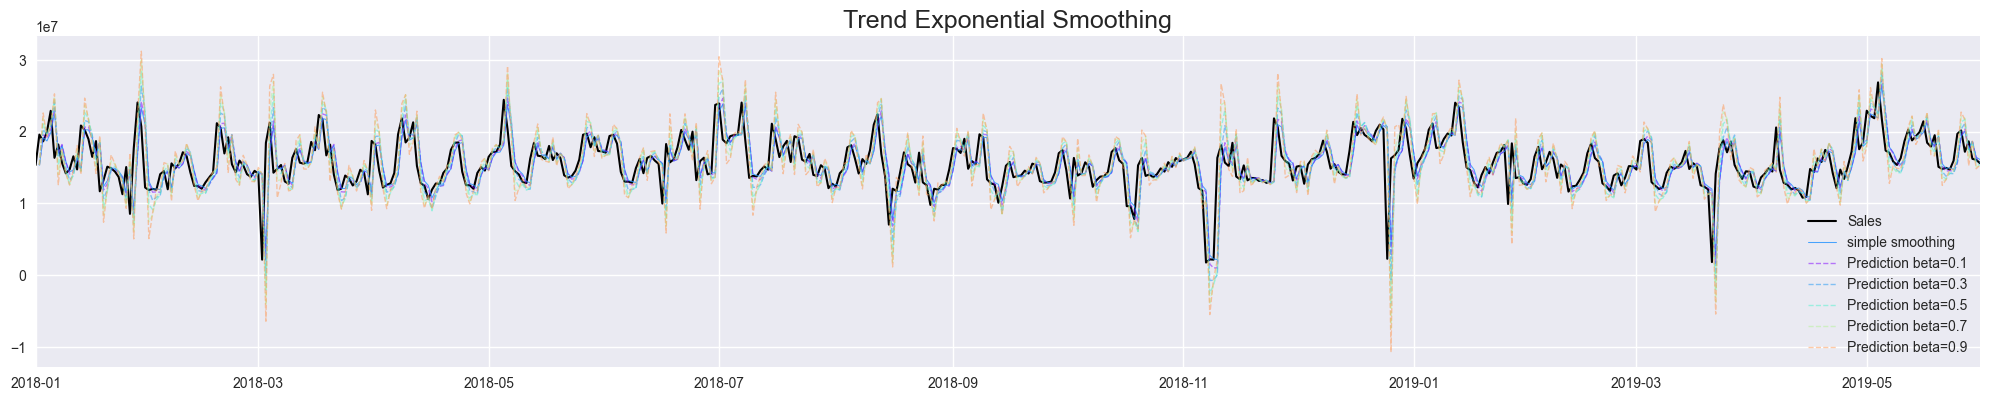

In [54]:
plotting_exp_trend()

In [55]:
color = iter(cm.rainbow(np.linspace(0, 1, 6)))
def plotting_subexp_trend():
    fig,ax=plt.subplots(nrows=6,ncols=1,figsize=(20,6),sharex=True)
    plt.style.use('seaborn')
    ax[0].plot(df_trend_exp['Date'] , df_trend_exp['Sales'] , alpha=1 , c='black',label='Sales',linewidth=2)
    ax[0].set_xlim((pd.Timestamp('2018-01-01'),pd.Timestamp('2019-05-31')))
    for count,beta in enumerate(np.around(np.linspace(0.1 , 0.9 , 5),1)):
        c=next(color)
        ax[count+1].plot(df_trend_exp['Date'] , df_trend_exp['Forcast beta={}'.format(beta)] , c=c,alpha=1,ls='--',
                         label='Prediction beta={}'.format(beta),linewidth=2)
        ax[count+1].set_xlim((pd.Timestamp('2018-01-01'),pd.Timestamp('2019-05-31')))
    for k in range(6):
        ax[k].set_ylim((1762000,26871000))
        ax[k].legend(loc='lower left')
    plt.tight_layout()
    plt.suptitle('Trend Exponential Smoothing Prediction',fontsize=18)
    plt.subplots_adjust(top=0.95,hspace=0.1)
    plt.show();

In [65]:
# plotting_subexp_trend()

### Assessing model accuracy

In [56]:
# ME
all_resid={}
for beta in np.around(np.linspace(0.1 , 0.9 , 5),1):
    mean_reidual=np.nanmean(df_trend_exp.loc[:,'Residual beta={}'.format(beta)])
    all_resid[beta]=mean_reidual
    print('ME for Trend Exp Smoothing model with beta={} is {:.2f}'.format(beta,mean_reidual))

print('\033[1mBest model is beta={} with ME={:.2f}\033[0m\n\n'.format(min_calc(all_resid)[0] , min_calc(all_resid)[1]))

#MAE
MAE={}
for beta in np.around(np.linspace(0.1 , 0.9 , 5),1):
    mean_reidual=np.nanmean(np.absolute(df_trend_exp.loc[:,'Residual beta={}'.format(beta)]))
    MAE[beta]=mean_reidual
    print('MAE for Trend Exp Smoothing model with beta={} is {:.2f}'.format(beta,mean_reidual))

print('\033[1mBest model is beta={} with MAE={:.2f}\033[0m\n\n'.format(min_calc(MAE)[0] , min_calc(MAE)[1]))

#MSE
all_resid={}
for beta in np.around(np.linspace(0.1 , 0.9 , 5),1):
    mean_reidual=np.nanmean((df_trend_exp.loc[:,'Residual beta={}'.format(beta)])**2)
    all_resid[beta]=mean_reidual
    print('MSE for Trend Exp Smoothing model with beta={} is {:.2f}'.format(beta,mean_reidual))

print('\033[1mBest model is beta={} with MSE={:.2f}\033[0m\n\n'.format(min_calc(all_resid)[0] , min_calc(all_resid)[1]))

#MPE
all_resid={}
for beta in np.around(np.linspace(0.1 , 0.9 , 5),1):
    mean_PE=np.nanmean(df_trend_exp.loc[:,'PE beta={}'.format(beta)])
    all_resid[beta]=mean_PE
    print('MPE for Trend Exp Smoothing model with beta={} is {:.2f}'.format(beta,mean_PE))

print('\033[1mBest model is beta={} with MPE={:.2f}\033[0m\n\n'.format(min_calc(all_resid)[0] , min_calc(all_resid)[1]))

#MAPE
all_resid={}
for beta in np.around(np.linspace(0.1 , 0.9 , 5),1):
    mean_PE=np.nanmean(np.absolute(df_trend_exp.loc[:,'PE beta={}'.format(beta)]))
    all_resid[beta]=mean_PE
    print('MAPE for Trend Exp Smoothing model with beta={} is {:.2f}'.format(beta,mean_PE))

print('\033[1mBest model is beta={} with MAPE={:.2f}\033[0m\n\n'.format(min_calc(all_resid)[0] , min_calc(all_resid)[1]))

#TS
all_resid={}
for beta in np.around(np.linspace(0.1 , 0.9 , 5),1):
    TS=np.nansum(df_trend_exp.loc[:,'Residual beta={}'.format(beta)])/MAE[beta]
    all_resid[beta]=TS
    print('TS for Trend Exp Smoothing model with beta={} is {:.2f}'.format(beta,TS))

print('\033[1mBest model is beta={} with TS={:.2f}\033[0m'.format(min_calc(all_resid)[0] , min_calc(all_resid)[1]))

ME for Trend Exp Smoothing model with beta=0.1 is -4050.18
ME for Trend Exp Smoothing model with beta=0.3 is -3242.02
ME for Trend Exp Smoothing model with beta=0.5 is -2464.67
ME for Trend Exp Smoothing model with beta=0.7 is -1568.68
ME for Trend Exp Smoothing model with beta=0.9 is -969.73
Best model is beta=0.9 with ME=-969.73


MAE for Trend Exp Smoothing model with beta=0.1 is 2072820.00
MAE for Trend Exp Smoothing model with beta=0.3 is 2255887.07
MAE for Trend Exp Smoothing model with beta=0.5 is 2440386.14
MAE for Trend Exp Smoothing model with beta=0.7 is 2621425.52
MAE for Trend Exp Smoothing model with beta=0.9 is 2836406.89
Best model is beta=0.1 with MAE=2072820.00


MSE for Trend Exp Smoothing model with beta=0.1 is 9814619466751.69
MSE for Trend Exp Smoothing model with beta=0.3 is 11438879998768.13
MSE for Trend Exp Smoothing model with beta=0.5 is 13063435087313.92
MSE for Trend Exp Smoothing model with beta=0.7 is 14919760711296.74
MSE for Trend Exp Smoothing model w

In [57]:
color = iter(cm.rainbow(np.linspace(0, 1, 5)))
def plotting_MR_exp_trend():
    fig,ax=plt.subplots(nrows=5,ncols=1,figsize=(20,5),sharex=True)
    plt.style.use('seaborn')
    for i,beta in enumerate(np.around(np.linspace(0.1 , 0.9 , 5),1)):
        c=next(color)
        ax[i].plot(df_trend_exp['Date'] , df_trend_exp['MR beta={}'.format(beta)] , c=c,alpha=1,ls='-',label='MR beta={}'.format(beta),linewidth=1.5) #MR
        MR_bar=np.nanmean([abs(x) for x in df_trend_exp['MR beta={}'.format(beta)]])
        ax[i].plot(df_trend_exp['Date'] , np.full( shape=(516,) , fill_value=0) , c='azure',ls='--' , linewidth=1) #CL
        ax[i].plot(df_trend_exp['Date'] , np.full( shape=(516,) , fill_value=0.89*MR_bar) , c='gold',ls='--'  , linewidth=1) #+sigma
        ax[i].plot(df_trend_exp['Date'] , np.full( shape=(516,) , fill_value=-0.89*MR_bar) , c='gold',ls='--'  , linewidth=1) #-sigma
        ax[i].plot(df_trend_exp['Date'] , np.full( shape=(516,) , fill_value=1.77*MR_bar) , c='darkorange',ls='--' , linewidth=1.25) #2sigma
        ax[i].plot(df_trend_exp['Date'] , np.full( shape=(516,) , fill_value=-1.77*MR_bar) , c='darkorange',ls='--' , linewidth=1.25) #-2sigma
        ax[i].plot(df_trend_exp['Date'] , np.full( shape=(516,) , fill_value=2.66*MR_bar) , c='dodgerblue',ls='--' , linewidth=1.25) #3sigma
        ax[i].plot(df_trend_exp['Date'] , np.full( shape=(516,) , fill_value=-2.66*MR_bar) , c='dodgerblue',ls='--' , linewidth=1.25) #-3sigma
        ax[i].set_xlim((pd.Timestamp('2018-01-01'),pd.Timestamp('2019-05-31')))
        ax[i].set_xlim((pd.Timestamp('2018-01-01'),pd.Timestamp('2019-05-31')))
        ax[i].legend(loc='lower left')

        
    plt.tight_layout()
    plt.suptitle('MR Control Chart for trend exp smoothing',fontsize=18)
    plt.subplots_adjust(top=0.93,hspace=0.2)
    plt.show()

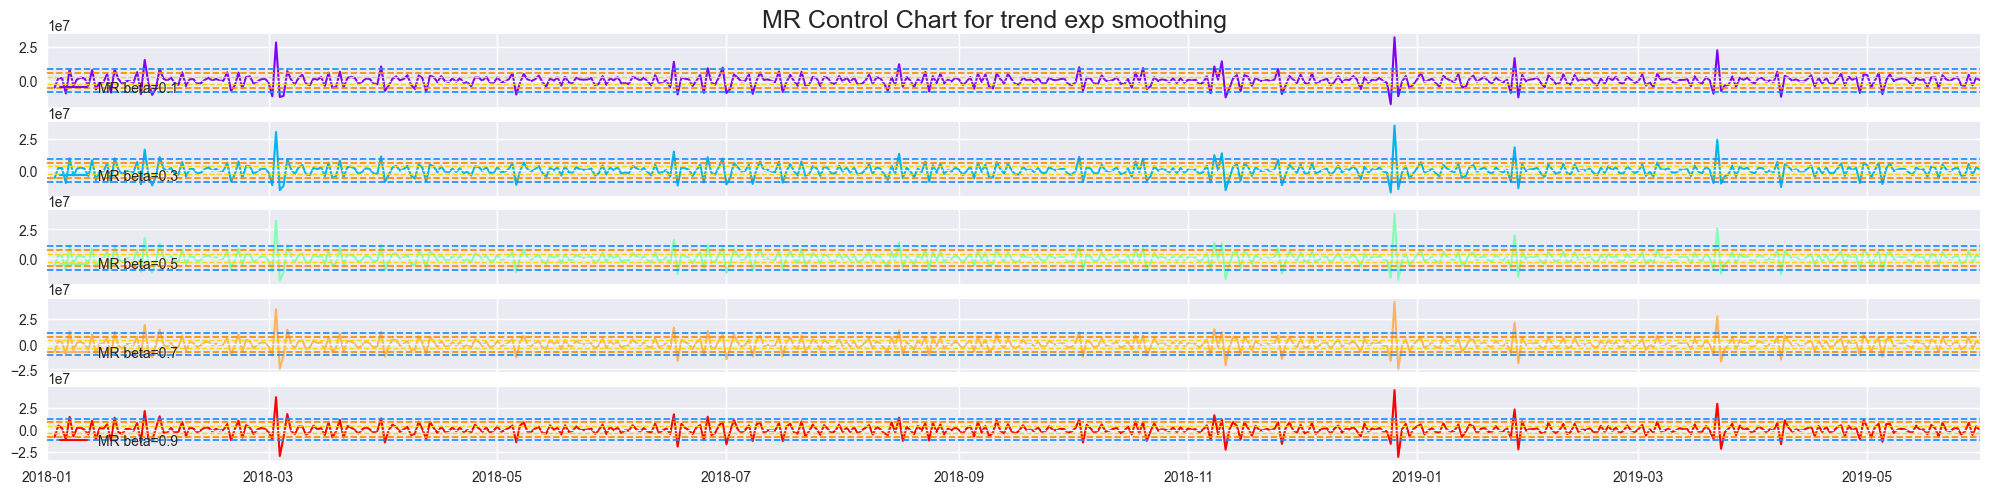

In [58]:
plotting_MR_exp_trend()

# Clarification 2 slide 30
alpha=0.9 beta=0.1

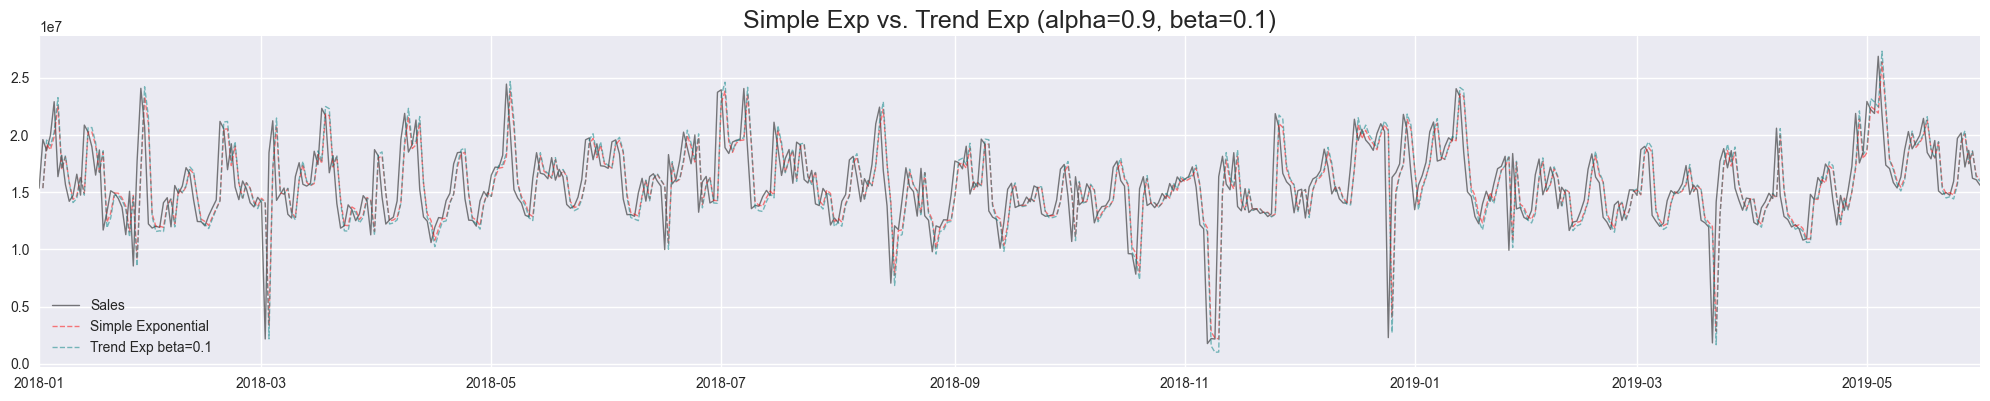

In [59]:
df_clar7=df.copy()

#Trend Calculations
alpha=0.9
beta=0.1
df_clar7.loc[1,'A beta={}'.format(beta)]=df_clar7.loc[1,'Sales']
df_clar7.loc[1,'T beta={}'.format(beta)]=0
df_clar7.loc[2,'Forcast Trend beta={}'.format(beta)]=df_clar7.loc[1,'Sales']
for i in range (2 , len(df_clar7)+1):
    A_prev=df_clar7.loc[i-1,'A beta={}'.format(beta)]
    T_prev=df_clar7.loc[i-1,'T beta={}'.format(beta)]
    demand=df_clar7.loc[i,'Sales']

    A,T,forcast=trend_exp_forcast(alpha , beta , demand ,A_prev,T_prev)

    df_clar7.loc[i,'A beta={}'.format(beta)]=A
    df_clar7.loc[i,'T beta={}'.format(beta)]=T
    if i!=len(df_clar7):
        df_clar7.loc[i+1,'Forcast Trend beta={}'.format(beta)]=forcast
    
df_clar7.loc[2,'Simple Exp']=df_clar7.loc[1,'Sales']
for i in range (3 , len(df_clar7)+1):
    demand=df_clar7.loc[i-1,'Sales']
    prev_forcast=df_clar7.loc[i-1,'Simple Exp']
    forcast=simple_exp_forcast(alpha , prev_forcast , demand)
    df_clar7.loc[i,'Simple Exp']=forcast #Forcast

plt.figure(figsize=(20,4))
plt.style.use('seaborn')
plt.plot(df_clar7['Date'] , df_clar7['Sales'] , alpha=0.5 , c='black',label='Sales',linewidth=1)
plt.plot(df_clar7['Date'] ,df_clar7['Simple Exp'] , alpha=0.5 , c='red',label='Simple Exponential',linewidth=1 , ls='--')
plt.plot(df_clar7['Date'] , df_clar7['Forcast Trend beta={}'.format(beta)] , alpha=0.5 , c='teal',label='Trend Exp beta=0.1',linewidth=1 , ls='--')
plt.legend()
plt.tight_layout()
plt.xlim((pd.Timestamp('2018-01-01'),pd.Timestamp('2019-05-31')))
plt.title('Simple Exp vs. Trend Exp (alpha=0.9, beta=0.1)',fontsize=18)
plt.show()

# seasonal exp smoothing
alpha=0.9

In [60]:
# function for calculations
def season_calc(alpha , c , d_t , I_t30 , At1):
    
    A_t=alpha*d_t/I_t30 + (1-alpha)*At1
    I_t=c*d_t/A_t +(1-c)*I_t30
    return A_t , I_t

# function for updating seasonal index
def normalizer(I_1_31):
    I31 = I_1_31[-1]
    I1 = I_1_31[0]
    coef = 30/(30 + I31 - I1)
    I_1_31[1:]=[x*coef for x in I_1_31[1:]]
    return I_1_31[1:]

In [61]:
df_season_exp=df.copy()
alpha=0.9
for c in np.around(np.linspace(0.1 , 0.9 , 5),1):
    df_season_exp.loc[30,'A c={}'.format(c)]=df_season_exp.loc[30,'Sales']
    
    #I calc first level
    mean_30=np.nanmean(df_season_exp.loc[:30 , 'Sales'])
    df_season_exp.loc[1:30 , 'I c={}'.format(c)]=df_season_exp.loc[1:30 , 'Sales']/mean_30
    for i in range (31 , len(df_trend_exp)+1):
        d_t = df_season_exp.loc[i,'Sales']
        I_t30 = df_season_exp.loc[i-30, 'I c={}'.format(c)]
        A_t1 = df_season_exp.loc[i-1,'A c={}'.format(c)]
        
        # I and A calculating
        A_t , I_t=season_calc(alpha , c , d_t , I_t30 , A_t1)
        df_season_exp.loc[i , 'A c={}'.format(c)]=A_t
        df_season_exp.loc[i , 'I c={}'.format(c)]=I_t
        
        #normalizing (if needed)
        if np.sum(df_season_exp.loc[i-29:i , 'I c={}'.format(c)])!=30:
            df_season_exp.loc[ i-29:i , 'I c={}'.format(c)] = normalizer(df_season_exp.loc[ i-30:i, 'I c={}'.format(c)].tolist())
        I_t30=df_season_exp.loc[i-30 , 'I c={}'.format(c)]
        forcast=A_t*I_t30
        df_season_exp.loc[i,'Forcast c={}'.format(c)]=forcast
        
        
        df_season_exp.loc[i,'Residual c={}'.format(c)]=df_season_exp.loc[i,'Sales']-df_season_exp.loc[i,'Forcast c={}'.format(c)] #Residual
        df_season_exp.loc[i,'PE c={}'.format(c)]=(df_season_exp.loc[i,'Residual c={}'.format(c)]/df_season_exp.loc[i,'Sales'])*100 #PE


        
        
for c in np.around(np.linspace(0.1 , 0.9 , 5),1):
    for i in range(31,len(df_season_exp)):
        df_season_exp.loc[i+1,'MR c={}'.format(c)]=df_season_exp.loc[i+1,'Residual c={}'
                                                                         .format(c)]-df_season_exp.loc[i,'Residual c={}'.format(c)] #MR
        
df_season_exp.head()

Date       Sales  A c=0.1   I c=0.1  Forcast c=0.1  Residual c=0.1  \
1 2018-01-01  15345484.5      NaN  0.930395            NaN             NaN   
2 2018-01-02  19592415.0      NaN  1.187870            NaN             NaN   
3 2018-01-03  18652527.0      NaN  1.130996            NaN             NaN   
4 2018-01-04  19956267.0      NaN  1.210042            NaN             NaN   
5 2018-01-05  22902651.0      NaN  1.388641            NaN             NaN   

   PE c=0.1  A c=0.3   I c=0.3  Forcast c=0.3  ...  A c=0.9   I c=0.9  \
1       NaN      NaN  0.930395            NaN  ...      NaN  0.930395   
2       NaN      NaN  1.187839            NaN  ...      NaN  1.187747   
3       NaN      NaN  1.131189            NaN  ...      NaN  1.131767   
4       NaN      NaN  1.210235            NaN  ...      NaN  1.210817   
5       NaN      NaN  1.388754            NaN  ...      NaN  1.389096   

   Forcast c=0.9  Residual c=0.9  PE c=0.9  MR c=0.1  MR c=0.3  MR c=0.5  \
1            NaN             NaN       NaN       NaN       NaN       NaN   
2            NaN             NaN       NaN       NaN       NaN       NaN   
3            NaN             NaN       NaN       NaN       NaN       NaN   
4            NaN             NaN       NaN       NaN       NaN       NaN   
5            NaN             NaN       NaN       NaN       NaN       NaN   

   MR c=0.7  MR c=0.9  
1       NaN       NaN  
2       NaN       NaN  
3       NaN       NaN  
4       NaN       NaN  
5       NaN       NaN  

[5 rows x 32 columns]

In [62]:
from matplotlib.pyplot import cm
color = iter(cm.rainbow(np.linspace(0, 1, 6)))
def plotting_exp_season():
    
    plt.figure(figsize=(20,4))
    plt.style.use('seaborn')
    plt.plot(df_season_exp['Date'] , df_season_exp['Sales'] , alpha=1 , c='black',label='Sales',linewidth=1)
    for c in np.around(np.linspace(0.1 , 0.9 , 5),1):
        C=next(color)
        plt.plot(df_season_exp['Date'] , df_season_exp['Forcast c={}'.format(c)] ,c=C, alpha=0.5,ls='--',label='Prediction c={}'.format(c),linewidth=1)
    plt.legend()
    plt.tight_layout()
    plt.xlim((pd.Timestamp('2018-01-01'),pd.Timestamp('2019-05-31')))
    plt.title('Seasonal Exponential Smoothing Prediction',fontsize=18)
    plt.show()

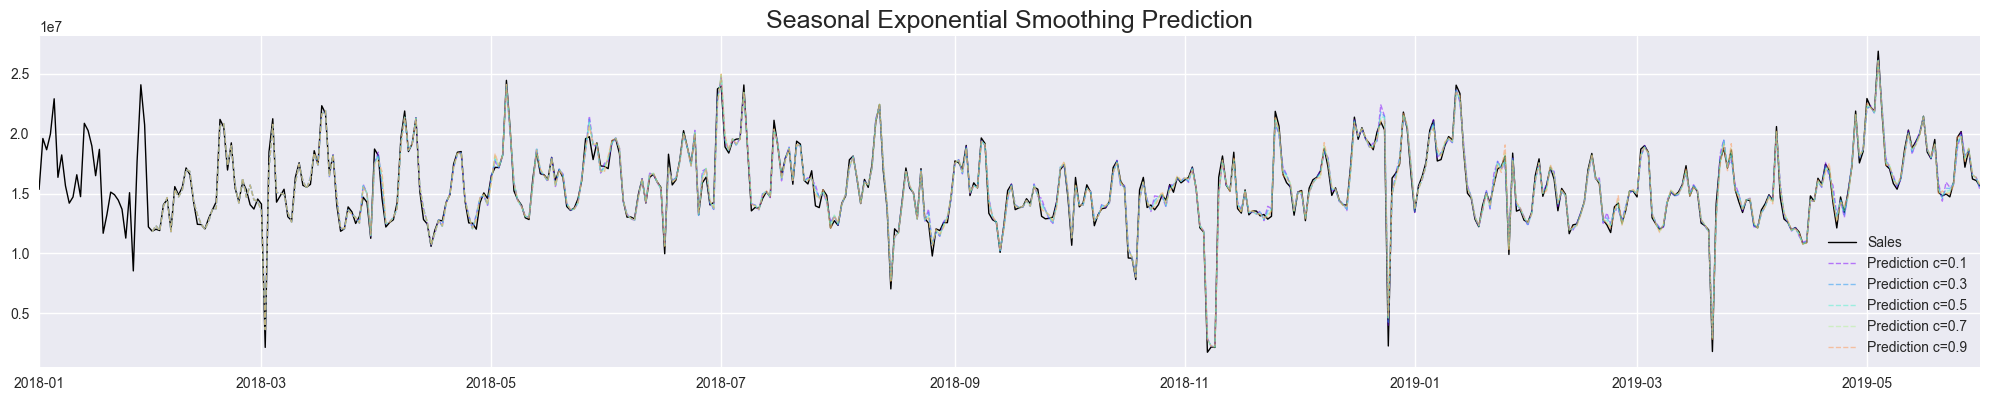

In [63]:
plotting_exp_season()

In [64]:
color = iter(cm.rainbow(np.linspace(0, 1, 6)))
def plotting_subexp_season():
    fig,ax=plt.subplots(nrows=6,ncols=1,figsize=(20,6),sharex=True)
    plt.style.use('seaborn')
    ax[0].plot(df_season_exp['Date'] , df_season_exp['Sales'] , alpha=1 , c='black',label='Sales',linewidth=2)
    ax[0].set_xlim((pd.Timestamp('2018-01-01'),pd.Timestamp('2019-05-31')))
    for count,c in enumerate(np.around(np.linspace(0.1 , 0.9 , 5),1)):
        C=next(color)
        ax[count+1].plot(df_season_exp['Date'] , df_season_exp['Forcast c={}'.format(c)] , c=C,alpha=1,ls='--',
                         label='Prediction c={}'.format(c),linewidth=2)
        ax[count+1].set_xlim((pd.Timestamp('2018-01-01'),pd.Timestamp('2019-05-31')))
    for k in range(6):
        ax[k].set_ylim((1762000,26871000))
        ax[k].legend(loc='lower left')
    plt.tight_layout()
    plt.suptitle('Seasonal Exponential Smoothing Prediction',fontsize=18)
    plt.subplots_adjust(top=0.95,hspace=0.1)
    plt.show();

In [76]:
# plotting_subexp_season()

### Assessing model accuracy

In [65]:
# ME
all_resid={}
for c in np.around(np.linspace(0.1 , 0.9 , 5),1):
    mean_reidual=np.nanmean(df_season_exp.loc[:,'Residual c={}'.format(c)])
    all_resid[c]=mean_reidual
    print('ME for Seasonal Exp Smoothing model with c={} is {:.2f}'.format(c,mean_reidual))

print('\033[1mBest model is c={} with ME={:.2f}\033[0m\n\n'.format(min_calc(all_resid)[0] , min_calc(all_resid)[1]))

#MAE
MAE={}
for c in np.around(np.linspace(0.1 , 0.9 , 5),1):
    mean_reidual=np.nanmean(np.absolute(df_season_exp.loc[:,'Residual c={}'.format(c)]))
    MAE[c]=mean_reidual
    print('MAE for Seasonal Exp Smoothing model with c={} is {:.2f}'.format(c,mean_reidual))

print('\033[1mBest model is c={} with MAE={:.2f}\033[0m\n\n'.format(min_calc(MAE)[0] , min_calc(MAE)[1]))

#MSE
all_resid={}
for c in np.around(np.linspace(0.1 , 0.9 , 5),1):
    mean_reidual=np.nanmean((df_season_exp.loc[:,'Residual c={}'.format(c)])**2)
    all_resid[c]=mean_reidual
    print('MSE for Seasonal Exp Smoothing model with c={} is {:.2f}'.format(c,mean_reidual))

print('\033[1mBest model is c={} with MSE={:.2f}\033[0m\n\n'.format(min_calc(all_resid)[0] , min_calc(all_resid)[1]))

#MPE
all_resid={}
for c in np.around(np.linspace(0.1 , 0.9 , 5),1):
    mean_PE=np.nanmean(df_season_exp.loc[:,'PE c={}'.format(c)])
    all_resid[c]=mean_PE
    print('MPE for Seasonal Exp Smoothing model with c={} is {:.2f}'.format(c,mean_PE))

print('\033[1mBest model is c={} with MPE={:.2f}\033[0m\n\n'.format(min_calc(all_resid)[0] , min_calc(all_resid)[1]))

#MAPE
all_resid={}
for c in np.around(np.linspace(0.1 , 0.9 , 5),1):
    mean_PE=np.nanmean(np.absolute(df_season_exp.loc[:,'PE c={}'.format(c)]))
    all_resid[c]=mean_PE
    print('MAPE for Seasonal Exp Smoothing model with c={} is {:.2f}'.format(c,mean_PE))

print('\033[1mBest model is c={} with MAPE={:.2f}\033[0m\n\n'.format(min_calc(all_resid)[0] , min_calc(all_resid)[1]))

#TS
all_resid={}
for c in np.around(np.linspace(0.1 , 0.9 , 5),1):
    TS=np.nansum(df_season_exp.loc[:,'Residual c={}'.format(c)])/MAE[c]
    all_resid[c]=TS
    print('TS for Seasonal Exp Smoothing model with c={} is {:.2f}'.format(c,TS))

print('\033[1mBest model is c={} with TS={:.2f}\033[0m'.format(min_calc(all_resid)[0] , min_calc(all_resid)[1]))

ME for Seasonal Exp Smoothing model with c=0.1 is -47159.05
ME for Seasonal Exp Smoothing model with c=0.3 is -35053.21
ME for Seasonal Exp Smoothing model with c=0.5 is -29311.90
ME for Seasonal Exp Smoothing model with c=0.7 is -27689.81
ME for Seasonal Exp Smoothing model with c=0.9 is -29416.76
Best model is c=0.7 with ME=-27689.81


MAE for Seasonal Exp Smoothing model with c=0.1 is 359454.77
MAE for Seasonal Exp Smoothing model with c=0.3 is 326092.14
MAE for Seasonal Exp Smoothing model with c=0.5 is 307666.68
MAE for Seasonal Exp Smoothing model with c=0.7 is 301327.87
MAE for Seasonal Exp Smoothing model with c=0.9 is 303753.34
Best model is c=0.7 with MAE=301327.87


MSE for Seasonal Exp Smoothing model with c=0.1 is 241057603028.14
MSE for Seasonal Exp Smoothing model with c=0.3 is 199703611026.18
MSE for Seasonal Exp Smoothing model with c=0.5 is 181025132887.74
MSE for Seasonal Exp Smoothing model with c=0.7 is 176007343894.48
MSE for Seasonal Exp Smoothing model with c=0.

In [66]:
color = iter(cm.rainbow(np.linspace(0, 1, 5)))
def plotting_MR_exp_season():
    fig,ax=plt.subplots(nrows=5,ncols=1,figsize=(20,8),sharex=True)
    plt.style.use('seaborn')
    for i,c in enumerate(np.around(np.linspace(0.1 , 0.9 , 5),1)):
        C=next(color)
        ax[i].plot(df_season_exp['Date'] , df_season_exp['MR c={}'.format(c)] , c=C,alpha=1,ls='-',label='MR c={}'.format(c),linewidth=1.5) #MR
        MR_bar=np.nanmean([abs(x) for x in df_season_exp['MR c={}'.format(c)]])
        ax[i].plot(df_season_exp['Date'] , np.full( shape=(516,) , fill_value=0) , c='azure',ls='--' , linewidth=1) #CL
        ax[i].plot(df_season_exp['Date'] , np.full( shape=(516,) , fill_value=0.89*MR_bar) , c='gold',ls='--'  , linewidth=1) #+sigma
        ax[i].plot(df_season_exp['Date'] , np.full( shape=(516,) , fill_value=-0.89*MR_bar) , c='gold',ls='--'  , linewidth=1) #-sigma
        ax[i].plot(df_season_exp['Date'] , np.full( shape=(516,) , fill_value=1.77*MR_bar) , c='darkorange',ls='--' , linewidth=1.25) #2sigma
        ax[i].plot(df_season_exp['Date'] , np.full( shape=(516,) , fill_value=-1.77*MR_bar) , c='darkorange',ls='--' , linewidth=1.25) #-2sigma
        ax[i].plot(df_season_exp['Date'] , np.full( shape=(516,) , fill_value=2.66*MR_bar) , c='dodgerblue',ls='--' , linewidth=1.25) #3sigma
        ax[i].plot(df_season_exp['Date'] , np.full( shape=(516,) , fill_value=-2.66*MR_bar) , c='dodgerblue',ls='--' , linewidth=1.25) #-3sigma
        ax[i].set_xlim((pd.Timestamp('2018-01-01'),pd.Timestamp('2019-05-31')))
        ax[i].set_xlim((pd.Timestamp('2018-01-01'),pd.Timestamp('2019-05-31')))
        ax[i].legend(loc='lower left')

        
    plt.tight_layout()
    plt.suptitle('MR Control Chart for Seasonal exp smoothing',fontsize=18)
    plt.subplots_adjust(top=0.95,hspace=0.2)
    plt.show()

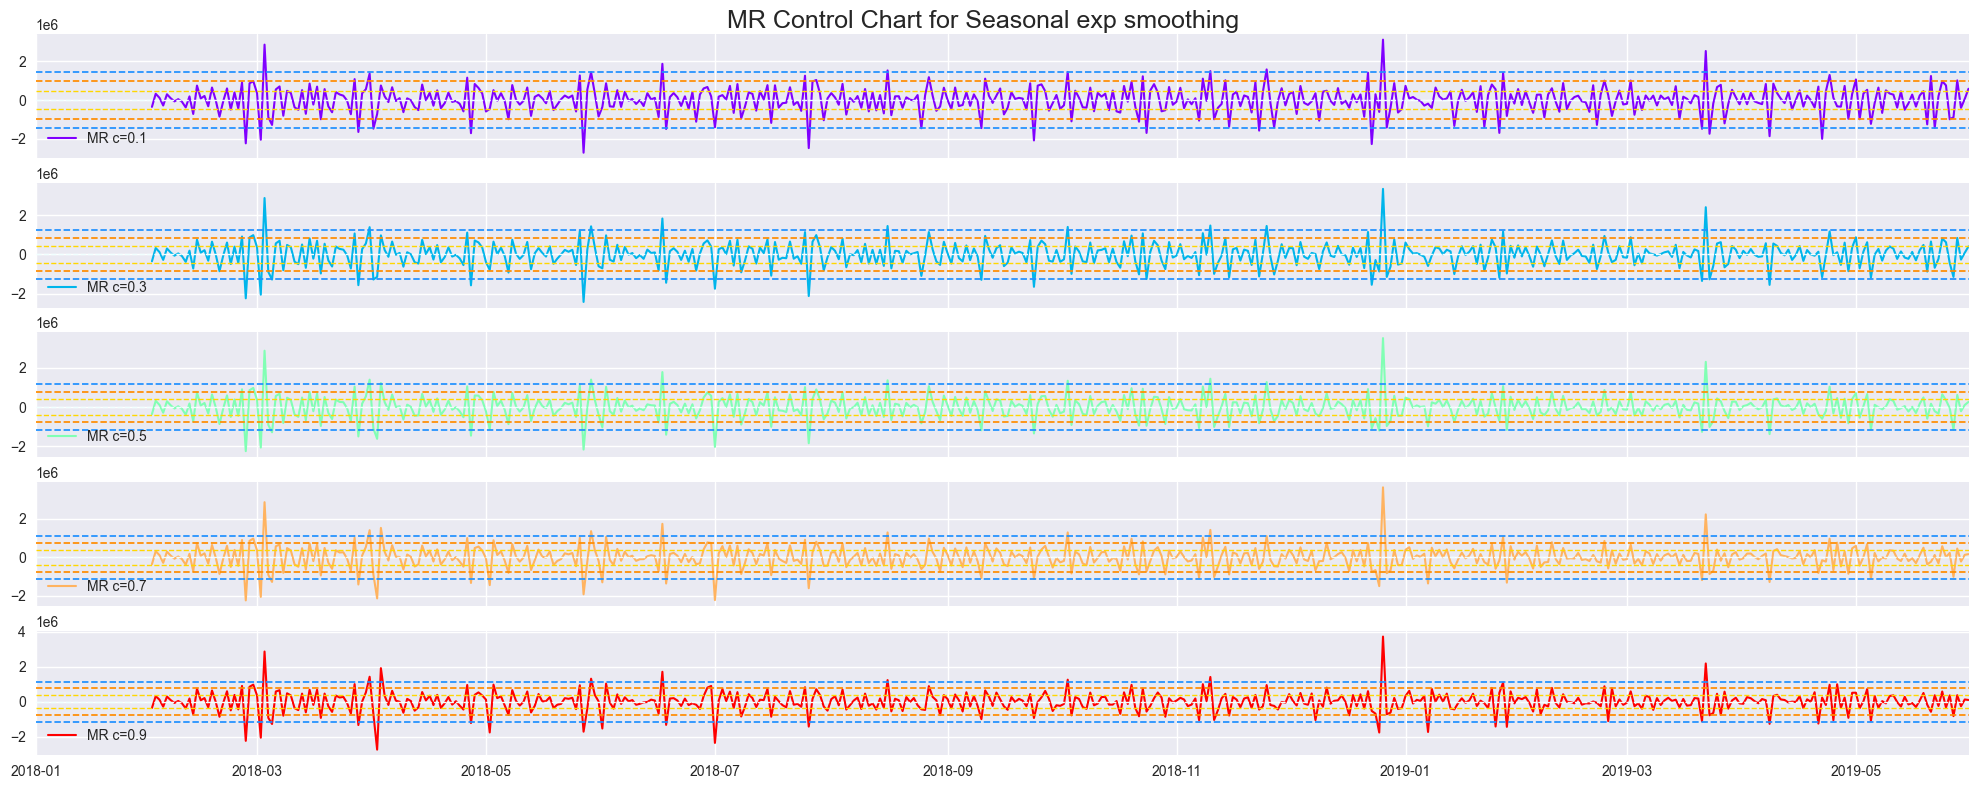

In [67]:
plotting_MR_exp_season()

# Regression

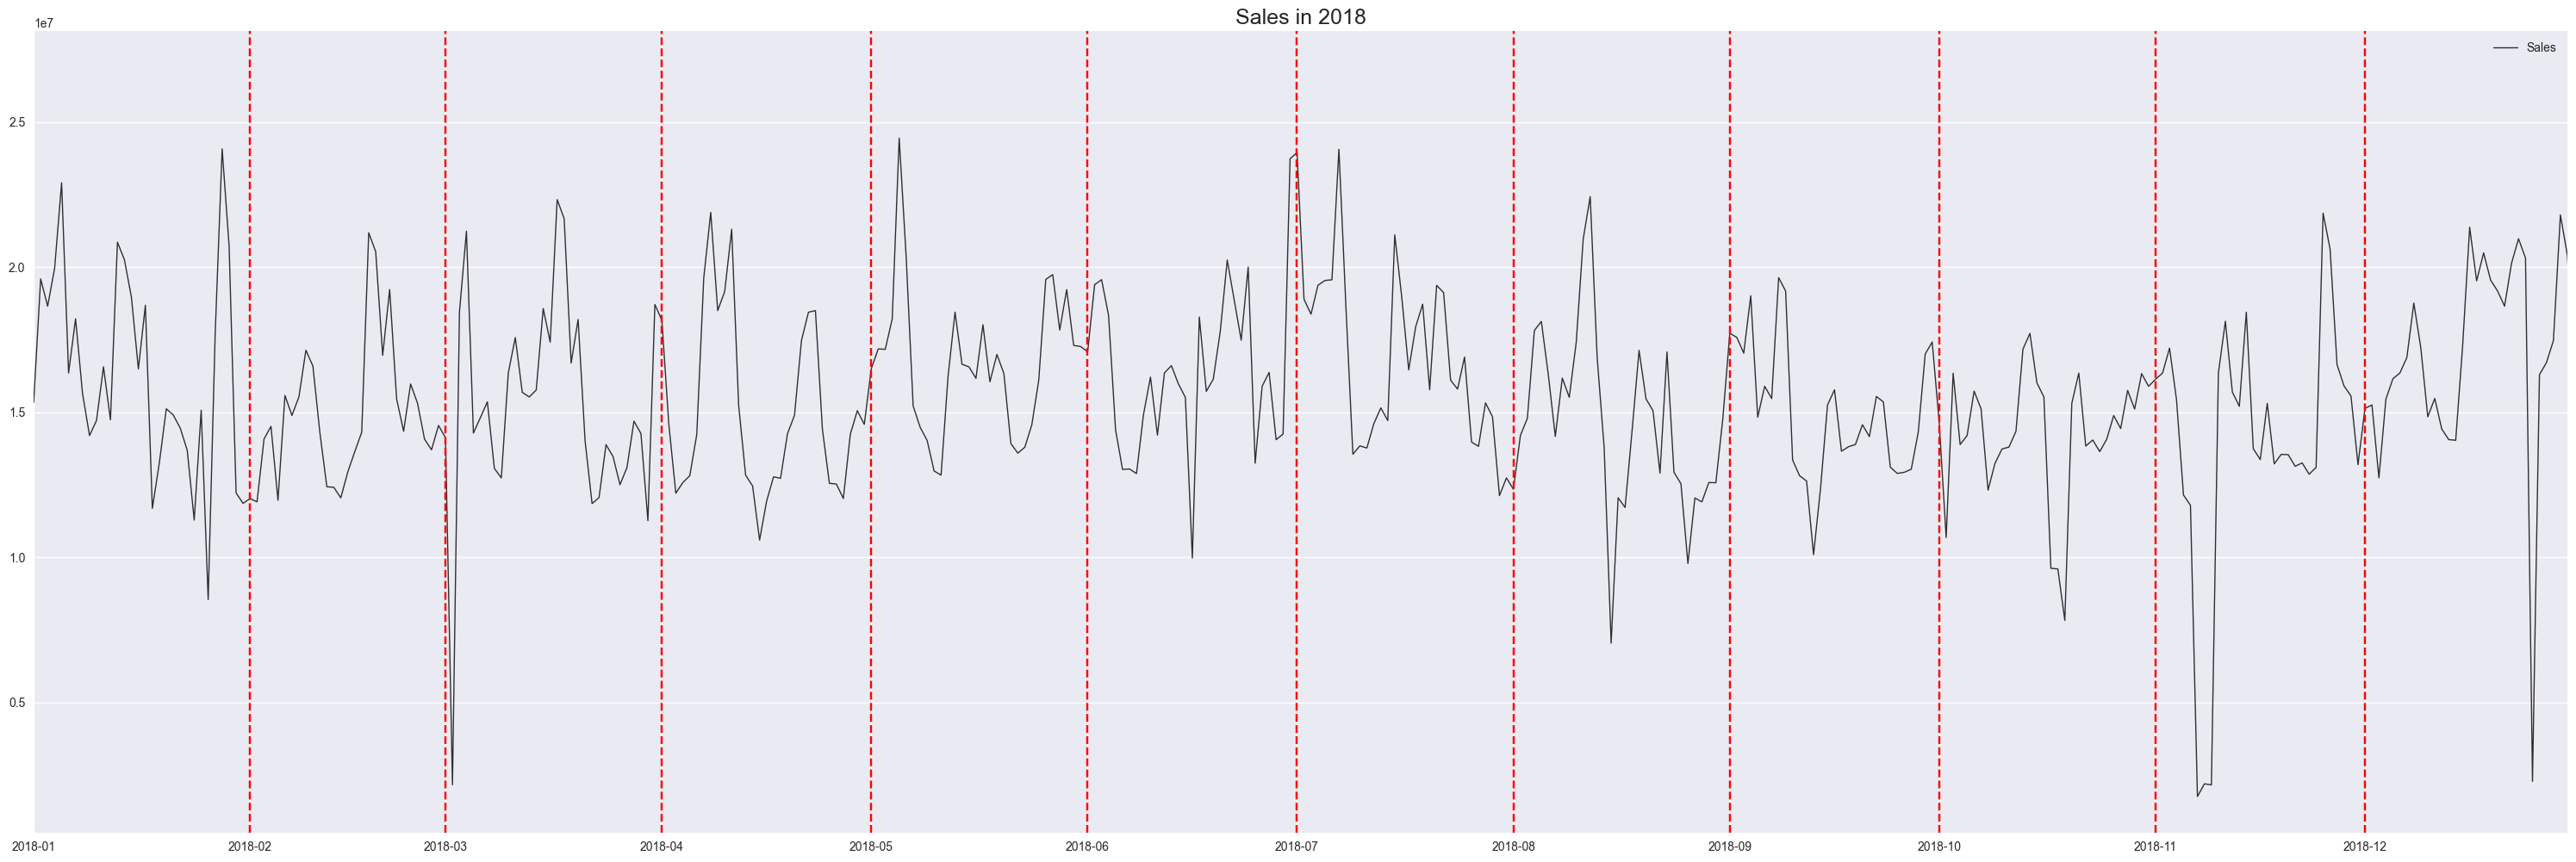

In [68]:
plt.figure(figsize=(30,10))
plt.plot(df['Date'] , df['Sales'] , alpha=0.8 , c='black',label='Sales',linewidth=1)
plt.legend()
plt.tight_layout()
xcoords=[]
for i in range(2,13):
    xcoords.append(pd.Timestamp(f'2018-{i}-01'))
for xc in xcoords:
    plt.axvline(x=xc, color='red', linestyle='--')
plt.xlim((pd.Timestamp('2018-01-01'),pd.Timestamp('2018-12-30')))
plt.title('Sales in 2018',fontsize=18)
plt.show()

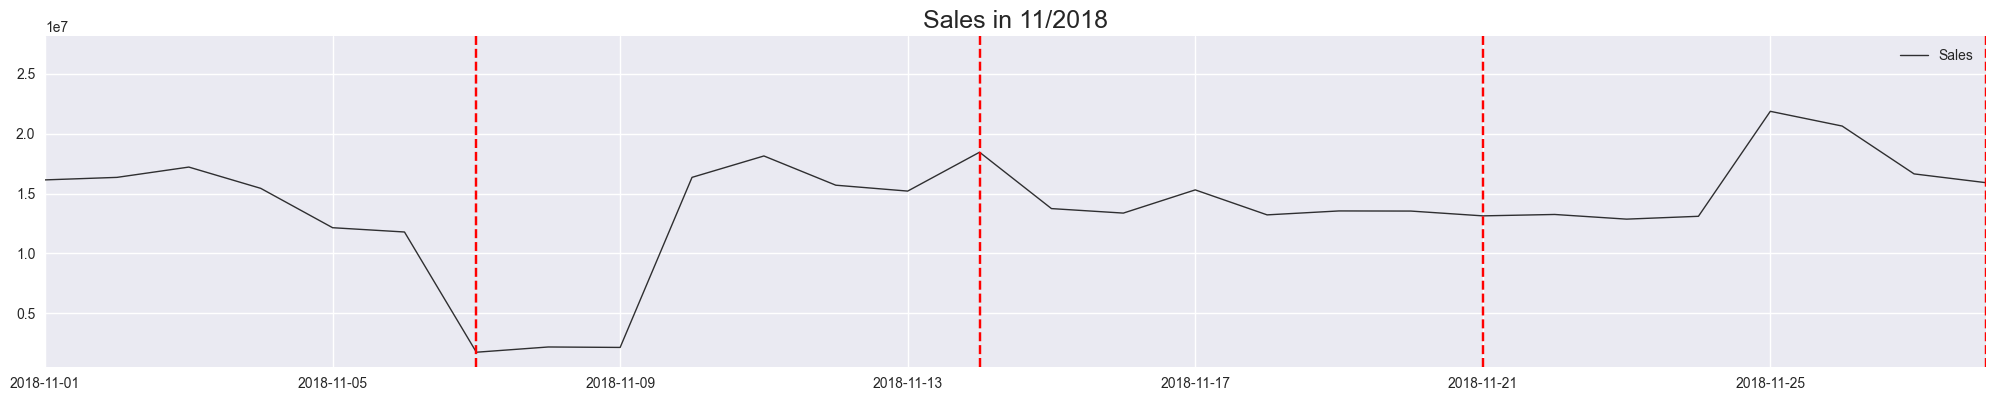

In [69]:
r = np.random.randint(1,12)
plt.figure(figsize=(20,4))
plt.style.use('seaborn')
plt.plot(df['Date'] , df['Sales'] , alpha=0.8 , c='black',label='Sales',linewidth=1)
plt.legend()
plt.tight_layout()
xcoords = [pd.Timestamp(f'2018-{r}-07'),pd.Timestamp(f'2018-{r}-14'),pd.Timestamp(f'2018-{r}-21'),pd.Timestamp(f'2018-{r}-28')]
for xc in xcoords:
    plt.axvline(x=xc, color='red', linestyle='--')
plt.xlim((pd.Timestamp(f'2018-{r}-01'),pd.Timestamp(f'2018-{r}-28')))
plt.title(f'Sales in {r}/2018' , fontsize=18)
plt.show()

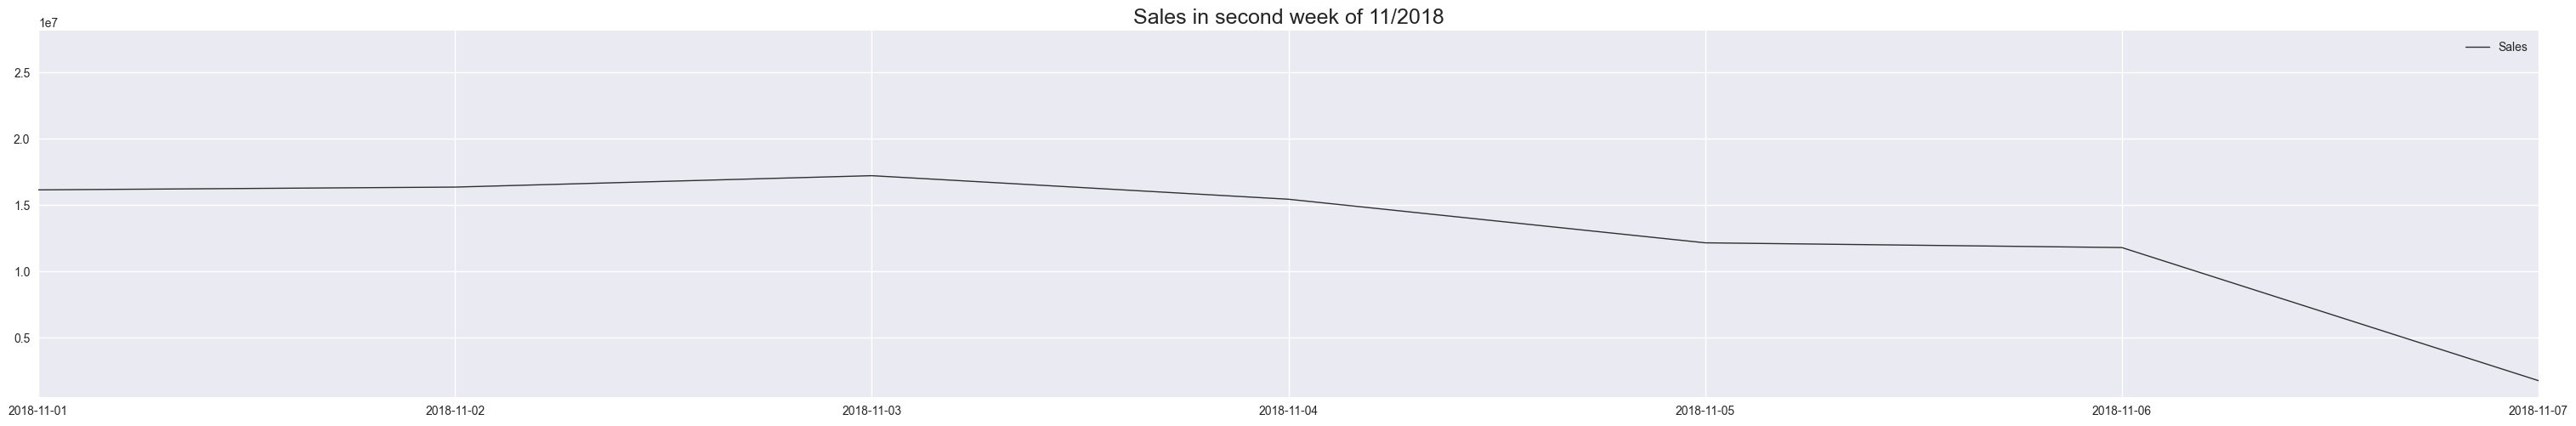

In [70]:
plt.figure(figsize=(30,5))
plt.style.use('seaborn')
plt.plot(df['Date'] , df['Sales'] , alpha=0.8 , c='black',label='Sales',linewidth=1)
plt.legend()
plt.tight_layout()
plt.xlim((pd.Timestamp(f'2018-{r}-01'),pd.Timestamp(f'2018-{r}-07')))
plt.title(f'Sales in second week of {r}/2018',fontsize=18)
plt.show()

Grouping by Month

In [71]:
df_SLR = df.copy()
df_SLR = df_SLR.iloc[:273,:]
df_SLR["Month"] = df_SLR.Date.dt.month
df_SLR = df_SLR.groupby('Month',as_index=False).sum()
df_SLR.index += 1
df_SLR

Month         Sales
1      1  5.066658e+08
2      2  4.175890e+08
3      3  4.718072e+08
4      4  4.525465e+08
5      5  5.177403e+08
6      6  4.895277e+08
7      7  5.271139e+08
8      8  4.528305e+08
9      9  4.502989e+08

In [72]:
df_SLR_test = df.copy()
df_SLR_test = df_SLR_test.iloc[273:364,:]
df_SLR_test["Month"] = df_SLR_test.Date.dt.month
df_SLR_test = df_SLR_test.groupby('Month',as_index=False).sum()
df_SLR_test.index += 1
df_SLR_test

Month         Sales
1     10  4.411538e+08
2     11  4.178625e+08
3     12  5.091977e+08

Simple Linear Regression

In [73]:
from sklearn import linear_model
X = df_SLR.iloc[:,0:1]
y = df_SLR.iloc[:,1:]
X_test = df_SLR_test.iloc[:,0:1]
reger = linear_model.LinearRegression()
reger.fit(X,y)
df_SLR_test["Predicted"] = reger.predict(X_test)
df_SLR["Predicted"] = reger.predict(X)
print('y = {:.2f}X + {:.2f}'.format(reger.coef_[0][0],reger.intercept_[0]))

y = 464183.68X + 473914616.18


Visualizing

In [74]:
def Reg_plot_Model():
    plt.figure(figsize=(20,4))
    plt.plot(df_SLR["Month"],df_SLR["Sales"],alpha=1 , c='black',label='Sales',linewidth=1.5)
    plt.plot(df_SLR["Month"],df_SLR["Predicted"], alpha=0.8 , c='dodgerblue',label='Simple Linear Regression',linewidth=1)
    plt.legend(fontsize=13)
    plt.tight_layout()
    plt.title('Simple Linear Regression Model',fontsize=18)
    plt.xlim((1,9))
    plt.show()

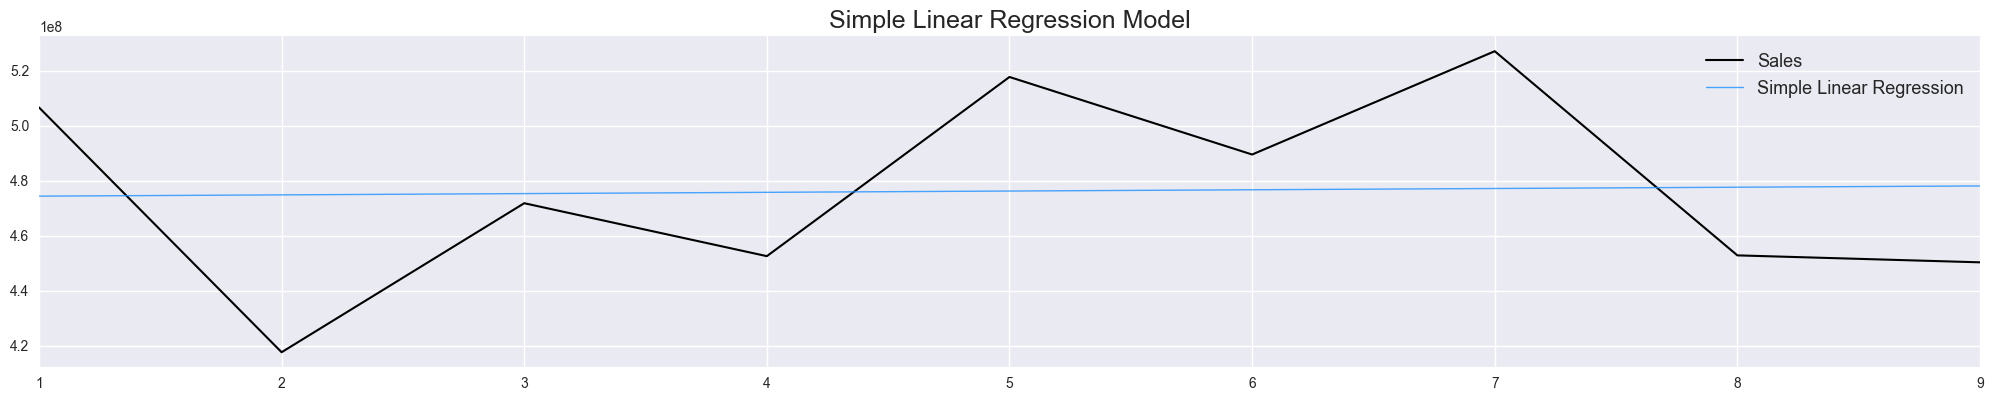

In [75]:
Reg_plot_Model()

In [76]:
def Reg_plot():
    plt.figure(figsize=(20,4))
    plt.plot(df_SLR_test["Month"],df_SLR_test["Sales"],alpha=1 , c='black',label='Sales',linewidth=1.5)
    plt.plot(df_SLR_test["Month"],df_SLR_test["Predicted"], alpha=0.8 , c='dodgerblue',label='Simple Linear Regression',linewidth=1)
    plt.legend()
    plt.tight_layout()
    plt.title('Simple Linear Regression Test',fontsize=18)
    plt.xlim((10,12))
    plt.show()

<IPython.core.display.Javascript object>


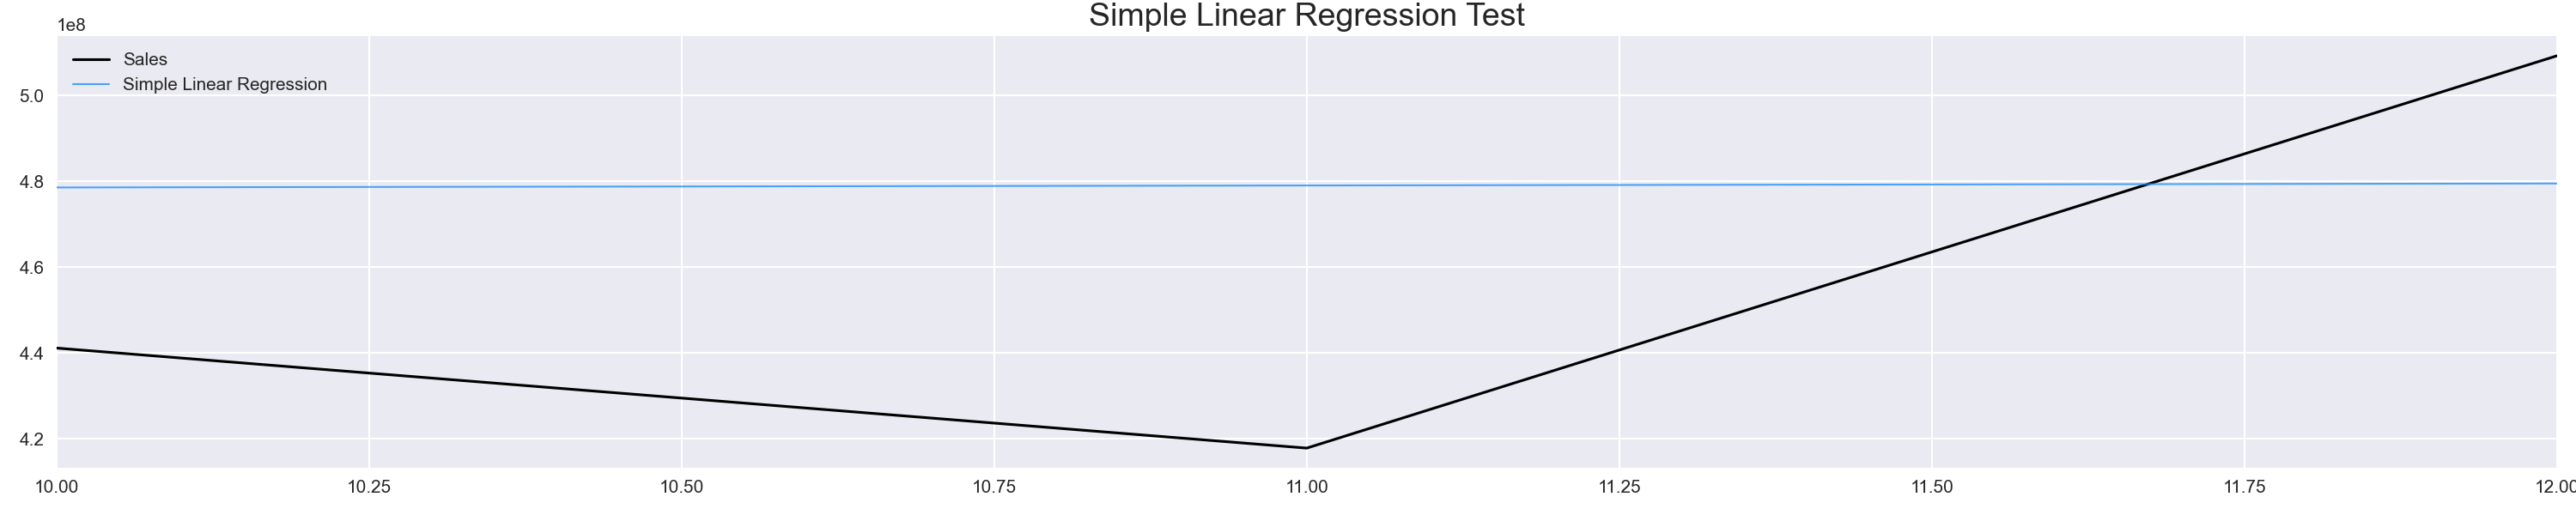

In [89]:
Reg_plot()

### Assessing Model Accuracy

In [77]:
def res(sales,prediction):
    return sales-prediction
def pe(sales,prediction):
    return ((sales-prediction)/sales)*100
a = res(df_SLR_test["Sales"],df_SLR_test["Predicted"])
re = pe(df_SLR_test["Sales"],df_SLR_test["Predicted"])

In [78]:
def res(sales,prediction):
    return sales-prediction
def pe(sales,prediction):
    return ((sales-prediction)/sales)*100
a = res(df_LPD["Sales"],df_LPD["Predicted"])
re = pe(df_LPD["Sales"],df_LPD["Predicted"])

#ME
def ME(res):
    return np.nanmean(res)
#MAE
def MAE(res):
    return np.nanmean(np.abs(res))
#MSE
def MSE(res):
    return np.nanmean((res)*(res))
#MPE
def MPE(pe):
    return np.nanmean(pe)
#MAPE
def MAPE(pe):
    return np.nanmean(np.abs(pe))
#TS
def TS(res,mae):
    return np.sum(res)/mae

print('ME for LPD model is {:.2f}'.format(ME(a)))
print('MAE for LPD model is {:.2f}'.format(MAE(a)))
print('MSE for LPD model is {:.2f}'.format(MSE(a)))
print('MPE for LPD model is {:.2f}'.format(MPE(re)))
print('MAPE for LPD model is {:.2f}'.format(MAPE(re)))
print('TS for LPD model is {:.2f}'.format(TS(a,MAE(a))))

ME for LPD model is 497.75
MAE for LPD model is 1981625.42
MSE for LPD model is 9246233436020.38
MPE for LPD model is -5.52
MAPE for LPD model is 16.93
TS for LPD model is 0.13


### MR Regression

In [79]:
a = res(df_SLR["Sales"],df_SLR["Predicted"])
n = len(res(df_SLR["Sales"],df_SLR["Predicted"]))
abs_MR = np.zeros(n)
MR = np.zeros(n)
for i in range(2,n):
    abs_MR[i] = abs(a[i]-a[i-1])
    MR[i] = (a[i]-a[i-1])
MR[0] = np.nan
abs_MR[0] = np.nan
MR = pd.concat([pd.DataFrame(MR,columns=['MR']),pd.DataFrame(abs_MR,columns=['abs_MR'])],axis=1)
MR.index += 1

In [80]:
MR["CL"] = np.zeros(n)
MR["LCL_1"] = np.zeros(n)
MR["UCL_1"] = np.zeros(n)
MR["LCL_2"] = np.zeros(n)
MR["UCL_2"] = np.zeros(n)
MR["LCL_3"] = np.zeros(n)
MR["UCL_3"] = np.zeros(n)
MR_bar = MR["abs_MR"].mean(skipna=True)
for i in range(2,n+1):
    MR["CL"][i] = 0
    MR["LCL_1"][i] = -0.89 * MR_bar
    MR["UCL_1"][i] =  0.89 * MR_bar
    MR["LCL_2"][i] = -1.77 * MR_bar
    MR["UCL_2"][i] =  1.77 * MR_bar
    MR["LCL_3"][i] = -2.66 * MR_bar
    MR["UCL_3"][i] =  2.66 * MR_bar

In [81]:
MR = pd.concat([MR,df_SLR["Month"]],axis=1)
MR = MR.iloc[1:,:]
MR;

In [82]:
def MR_SLR_Plot():
    plt.figure(figsize=(20,5))
    plt.plot(MR["Month"], MR["CL"], c='azure', ls='--', linewidth=1.25)
    plt.plot(MR["Month"], MR["LCL_1"], c='gold', ls='--', linewidth=1.25)
    plt.plot(MR["Month"], MR["UCL_1"], c='gold', ls='--', linewidth=1.25)
    plt.plot(MR["Month"], MR["LCL_2"], c='darkorange', ls='--', linewidth=1.25)
    plt.plot(MR["Month"], MR["UCL_2"], c='darkorange', ls='--', linewidth=1.25)
    plt.plot(MR["Month"], MR["LCL_3"], c='dodgerblue', ls='--', linewidth=1.25)
    plt.plot(MR["Month"], MR["UCL_3"], c='dodgerblue', ls='--', linewidth=1.25)
    plt.plot(MR["Month"], MR["MR"], c='black', linewidth=2)
    plt.tight_layout()
    plt.title('MR for Simple Linear Regression',fontsize=18)
    plt.xlim((2,9))
    plt.show()

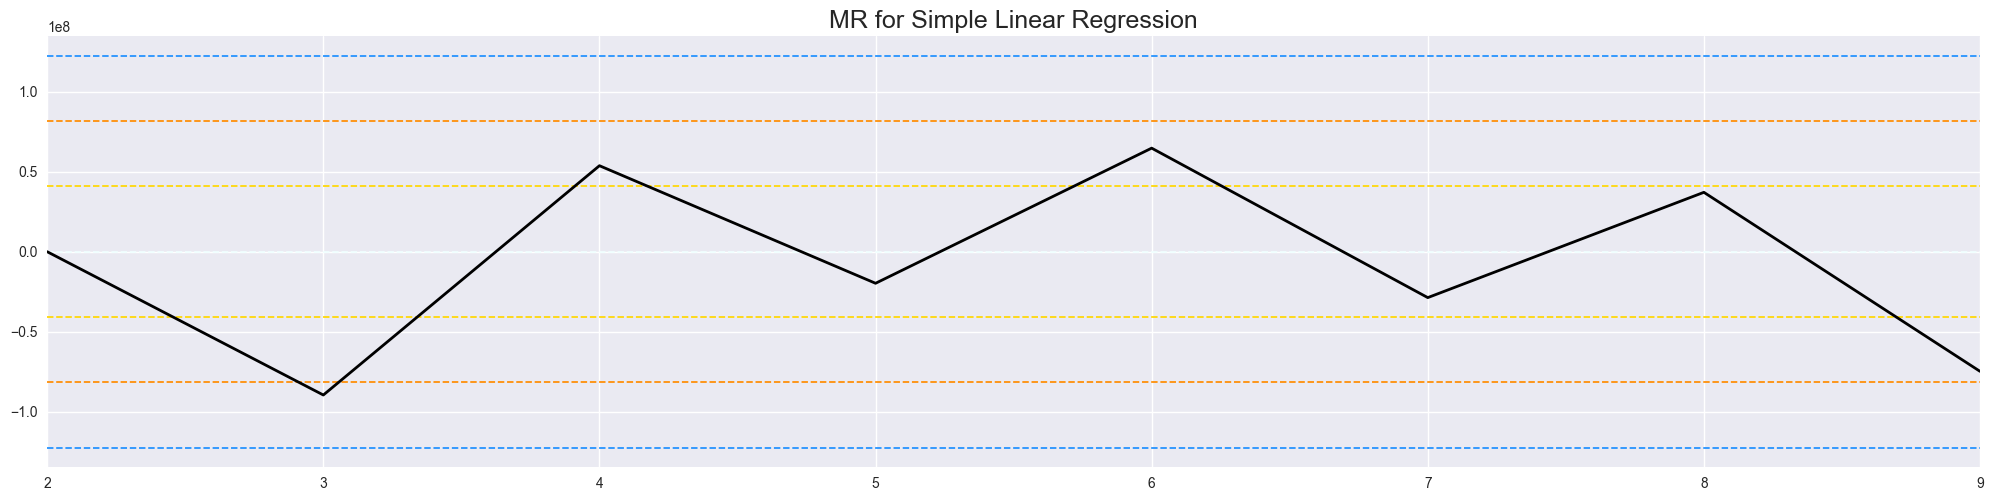

In [83]:
MR_SLR_Plot()

# Adjusted Linear Regression

In [84]:
df_ALR = df.copy()
df_ALR["Month"] = df_ALR.Date.dt.month
df_ALR["Week"] = df_ALR.Date.dt.isocalendar().week
df_ALR = df_ALR.iloc[:273,:]
df_ALR

Date        Sales  Month  Week
1   2018-01-01  15345484.50      1     1
2   2018-01-02  19592415.00      1     1
3   2018-01-03  18652527.00      1     1
4   2018-01-04  19956267.00      1     1
5   2018-01-05  22902651.00      1     1
6   2018-01-06  16351956.00      1     1
7   2018-01-07  18219249.00      1     1
8   2018-01-08  15641283.00      1     2
9   2018-01-09  14197074.00      1     2
10  2018-01-10  14712108.00      1     2
11  2018-01-11  16565787.00      1     2
12  2018-01-12  14737770.00      1     2
13  2018-01-13  20857848.00      1     2
14  2018-01-14  20252261.37      1     2
15  2018-01-15  18966564.00      1     3
16  2018-01-16  16488294.00      1     3
17  2018-01-17  18685467.00      1     3
18  2018-01-18  11687088.00      1     3
19  2018-01-19  13250172.00      1     3
20  2018-01-20  15118365.00      1     3
21  2018-01-21  14902944.00      1     3
22  2018-01-22  14450475.96      1     4
23  2018-01-23  13687812.00      1     4
24  2018-01-24  11282559.00      1     4
25  2018-01-25  15071184.00      1     4
26  2018-01-26   8544637.14      1     4
27  2018-01-27  17676906.00      1     4
28  2018-01-28  24070617.00      1     4
29  2018-01-29  20720280.00      1     5
30  2018-01-30  12217641.00      1     5
31  2018-01-31  11860150.89      1     5
32  2018-02-01  12023721.00      2     5
33  2018-02-02  11912538.00      2     5
34  2018-02-03  14075436.00      2     5
35  2018-02-04  14510955.00      2     5
36  2018-02-05  11967330.00      2     6
37  2018-02-06  15577728.00      2     6
38  2018-02-07  14887227.00      2     6
39  2018-02-08  15529065.00      2     6
40  2018-02-09  17135181.00      2     6
41  2018-02-10  16592092.95      2     6
42  2018-02-11  14302785.00      2     6
43  2018-02-12  12433194.00      2     7
44  2018-02-13  12412914.00      2     7
45  2018-02-14  12049936.92      2     7
46  2018-02-15  12937917.00      2     7
47  2018-02-16  13640055.00      2     7
48  2018-02-17  14310783.00      2     7
49  2018-02-18  21181416.00      2     7
50  2018-02-19  20532469.26      2     8
51  2018-02-20  16960068.00      2     8
52  2018-02-21  19226871.00      2     8
53  2018-02-22  15454293.00      2     8
54  2018-02-23  14341791.00      2     8
55  2018-02-24  15972708.00      2     8
56  2018-02-25  15303216.00      2     8
57  2018-02-26  14068716.00      2     9
58  2018-02-27  13704948.00      2     9
59  2018-02-28  14543655.00      2     9
60  2018-03-01  14120634.24      3     9
61  2018-03-02   2165458.29      3     9
62  2018-03-03  18448566.00      3     9
63  2018-03-04  21236433.00      3     9
64  2018-03-05  14281224.00      3    10
65  2018-03-06  14814756.00      3    10
66  2018-03-07  15357597.00      3    10
67  2018-03-08  13065249.00      3    10
68  2018-03-09  12737448.00      3    10
69  2018-03-10  16360278.00      3    10
70  2018-03-11  17570853.00      3    10
71  2018-03-12  15684093.00      3    11
72  2018-03-13  15525570.00      3    11
73  2018-03-14  15765795.00      3    11
74  2018-03-15  18572256.00      3    11
75  2018-03-16  17412255.00      3    11
76  2018-03-17  22324179.00      3    11
77  2018-03-18  21668970.75      3    11
78  2018-03-19  16691154.00      3    12
79  2018-03-20  18195132.00      3    12
80  2018-03-21  14007738.00      3    12
81  2018-03-22  11852319.00      3    12
82  2018-03-23  12062124.00      3    12
83  2018-03-24  13883388.00      3    12
84  2018-03-25  13472971.92      3    12
85  2018-03-26  12503751.00      3    13
86  2018-03-27  13094226.00      3    13
87  2018-03-28  14691672.00      3    13
88  2018-03-29  14265426.57      3    13
89  2018-03-30  11264967.90      3    13
90  2018-03-31  18710721.00      3    13
91  2018-04-01  18166922.52      4    13
92  2018-04-02  14569629.00      4    14
93  2018-04-03  12209307.00      4    14
94  2018-04-04  12576207.00      4    14
95  2018-04-05  12813417.00      4    14
96  2018-04-06  14234181.00      4    14
97  2018-04-07  19623816.00      

In [85]:
df_ALR_test = df.copy()
df_ALR_test = df_ALR_test.iloc[273:364,:]
df_ALR_test["Month"] = df_ALR_test.Date.dt.month
df_ALR_test["Week"] = df_ALR_test.Date.dt.isocalendar().week
df_ALR_test = df_ALR_test.groupby(['Month','Week'],as_index=False).sum()
df_ALR_test['Wnum'] = df_ALR_test.index + 40
df_ALR_test

Month  Week         Sales  Wnum
0      10    40  1.005986e+08    40
1      10    41  1.023263e+08    41
2      10    42  9.024339e+07    42
3      10    43  1.006574e+08    43
4      10    44  4.732808e+07    44
5      11    44  6.512340e+07    45
6      11    45  6.454665e+07    46
7      11    46  1.049788e+08    47
8      11    47  1.012960e+08    48
9      11    48  8.191768e+07    49
10     12    48  3.038003e+07    50
11     12    49  1.135447e+08    51
12     12    50  1.115119e+08    52
13     12    51  1.385013e+08    53
14     12    52  1.152597e+08    54

In [86]:
df_ALR_grouped = df_ALR.groupby(['Month','Week'],as_index=True).sum()
df_ALR_grouped.drop((4,18),inplace=True)
df_ALR_grouped.drop((7,31),inplace=True)

In [87]:
Month_sum=[]
for i in range(1,10):
    Month_sum.append(df_ALR_grouped.loc[(i),'Sales'].sum())
Month_sum

[506665837.86,
 417589010.13,
 471807206.66999996,
 437964746.90999997,
 517740285.6,
 489527703.96000004,
 502249922.52,
 452830473.75,
 450298873.8]

In [88]:
Month_avg = []
for i in Month_sum:
    Month_avg.append(i/5)
Month_avg

[101333167.572,
 83517802.026,
 94361441.33399999,
 87592949.382,
 103548057.12,
 97905540.79200001,
 100449984.504,
 90566094.75,
 90059774.76]

In [89]:
for i in range(1,10):
    for j in df_ALR_grouped.loc[(i),"Sales"].index.values:
        df_ALR_grouped.loc[(i,j),"AVG"] = df_ALR_grouped.loc[(i,j),"Sales"]/Month_avg[i-1]
        
k=1
for i in range(1,10):
    for j in df_ALR_grouped.loc[(i),"Sales"].index.values:
        df_ALR_grouped.loc[(i,j),"WeekN"] = k
        k = k+1
df_ALR_grouped

Sales       AVG  WeekN
Month Week                               
1     1     1.310205e+08  1.292968    1.0
      2     1.169641e+08  1.154253    2.0
      3     1.090989e+08  1.076636    3.0
      4     1.047842e+08  1.034056    4.0
      5     4.479807e+07  0.442087    5.0
2     5     5.252265e+07  0.628880    6.0
      6     1.059914e+08  1.269088    7.0
      7     9.896622e+07  1.184972    8.0
      8     1.177914e+08  1.410375    9.0
      9     4.231732e+07  0.506686   10.0
3     9     5.597109e+07  0.593156   11.0
      10    1.041874e+08  1.104131   12.0
      11    1.269531e+08  1.345392   13.0
      12    1.001648e+08  1.061502   14.0
      13    8.453076e+07  0.895819   15.0
4     13    1.816692e+07  0.207402   16.0
      14    1.079103e+08  1.231952   17.0
      15    1.100716e+08  1.256626   18.0
      16    1.025014e+08  1.170202   19.0
      17    9.931444e+07  1.133818   20.0
5     18    1.138397e+08  1.099390   21.0
      19    1.042152e+08  1.006443   22.0
      20    1.167700e+08  1.127689   23.0
      21    1.112958e+08  1.074823   24.0
      22    7.161957e+07  0.691655   25.0
6     22    5.603721e+07  0.572360   26.0
      23    1.028147e+08  1.050142   27.0
      24    1.069137e+08  1.092009   28.0
      25    1.262232e+08  1.289235   29.0
      26    9.753881e+07  0.996254   30.0
7     26    2.394536e+07  0.238381   31.0
      27    1.384460e+08  1.378258   32.0
      28    1.067345e+08  1.062564   33.0
      29    1.263623e+08  1.257962   34.0
      30    1.067617e+08  1.062835   35.0
8     31    7.727757e+07  0.853273   36.0
      32    1.229515e+08  1.357588   37.0
      33    9.297232e+07  1.026569   38.0
      34    9.574540e+07  1.057188   39.0
      35    6.388371e+07  0.705382   40.0
9     35    3.529655e+07  0.391924   41.0
      36    1.210477e+08  1.344081   42.0
      37    9.228084e+07  1.024662   43.0
      38    1.009803e+08  1.121259   44.0
      39    1.006935e+08  1.118074   45.0

In [90]:
Weekly_mean = []
for i in range(0,5):
    Weekly_mean.append(df_ALR_grouped.iloc[:,1].values[range(i,i+41,5)].mean())
Weekly_mean

[0.6530814228323787,
 1.2106596569944896,
 1.1330131600811313,
 1.1640668684552684,
 0.8391788916367323]

In [91]:
X = df_ALR_grouped.iloc[:,2:]
X_test = df_ALR_test.iloc[:,3:]
y = df_ALR_grouped.iloc[:,0:1]
regressor = linear_model.LinearRegression()
regressor.fit(X,y)
df_ALR_grouped["Predicted"] = regressor.predict(X)
df_ALR_test["Predicted"] = regressor.predict(X_test)
print('y = {:.2f}X + {:.2f}'.format(regressor.coef_[0][0],regressor.intercept_[0]))
print('Correlation coefficient for X and y is {:.4f}'.format(np.corrcoef(X['WeekN'].values,y['Sales'].values)[0,1]))

y = 28933.57X + 93705062.62
Correlation coefficient for X and y is 0.0129


In [92]:
adjuster = []
for i in range(0,3):
    adjuster.extend(Weekly_mean)
df_ALR_test["Weights"] = adjuster
df_ALR_test["adj_Predicted"] = df_ALR_test["Weights"]*df_ALR_test["Predicted"]
df_ALR_test["Weight_Valid"] = df_ALR_test["Weights"]*df_ALR_test["Sales"]
df_ALR_test

Month  Week         Sales  Wnum     Predicted   Weights  adj_Predicted  \
0      10    40  1.005986e+08    40  9.486241e+07  0.653081   6.195287e+07   
1      10    41  1.023263e+08    41  9.489134e+07  1.210660   1.148811e+08   
2      10    42  9.024339e+07    42  9.492027e+07  1.133013   1.075459e+08   
3      10    43  1.006574e+08    43  9.494921e+07  1.164067   1.105272e+08   
4      10    44  4.732808e+07    44  9.497814e+07  0.839179   7.970365e+07   
5      11    44  6.512340e+07    45  9.500707e+07  0.653081   6.204735e+07   
6      11    45  6.454665e+07    46  9.503601e+07  1.210660   1.150563e+08   
7      11    46  1.049788e+08    47  9.506494e+07  1.133013   1.077098e+08   
8      11    47  1.012960e+08    48  9.509387e+07  1.164067   1.106956e+08   
9      11    48  8.191768e+07    49  9.512281e+07  0.839179   7.982505e+07   
10     12    48  3.038003e+07    50  9.515174e+07  0.653081   6.214183e+07   
11     12    49  1.135447e+08    51  9.518067e+07  1.210660   1.152314e+08   
12     12    50  1.115119e+08    52  9.520961e+07  1.133013   1.078737e+08   
13     12    51  1.385013e+08    53  9.523854e+07  1.164067   1.108640e+08   
14     12    52  1.152597e+08    54  9.526748e+07  0.839179   7.994645e+07   

    Weight_Valid  
0   6.569906e+07  
1   1.238824e+08  
2   1.022469e+08  
3   1.171720e+08  
4   3.971673e+07  
5   4.253088e+07  
6   7.814403e+07  
7   1.189424e+08  
8   1.179153e+08  
9   6.874359e+07  
10  1.984063e+07  
11  1.374640e+08  
12  1.263445e+08  
13  1.612247e+08  
14  9.672354e+07

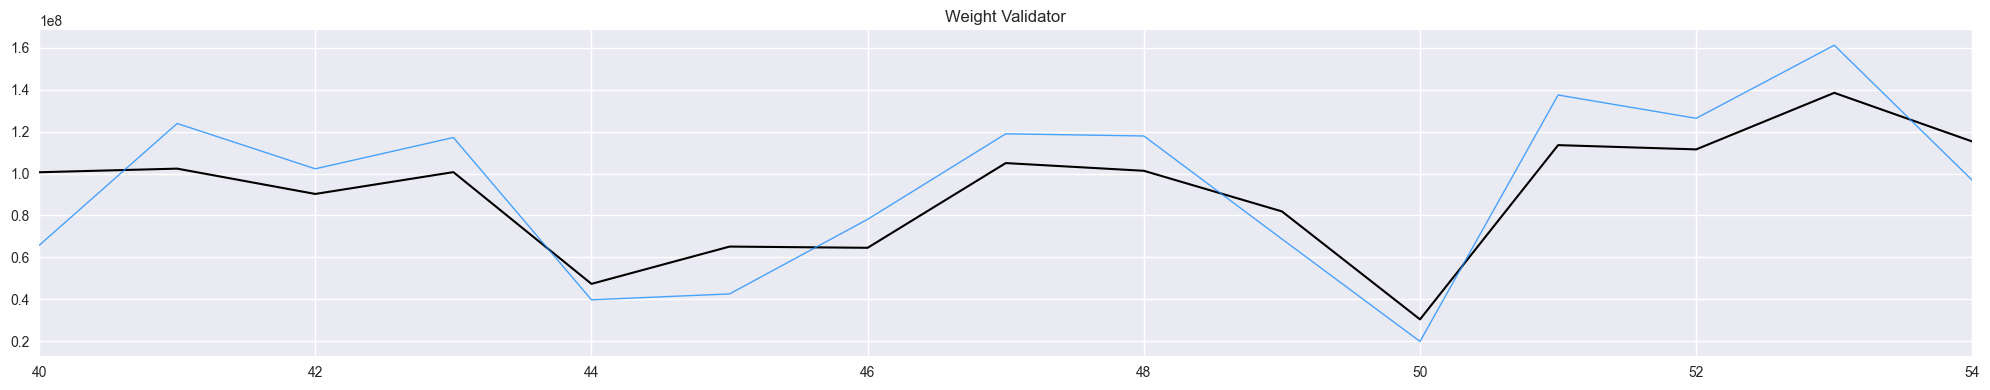

In [93]:
plt.figure(figsize=(20,4))
plt.plot(df_ALR_test["Wnum"],df_ALR_test["Sales"],alpha=1 , c='black',label='Sales',linewidth=1.5)
plt.plot(df_ALR_test["Wnum"],df_ALR_test["Weight_Valid"], alpha=0.8 , c='dodgerblue',label='Adjusted Linear Regression',linewidth=1)
plt.title("Weight Validator")
plt.xlim((40,54))
plt.tight_layout()
plt.show()

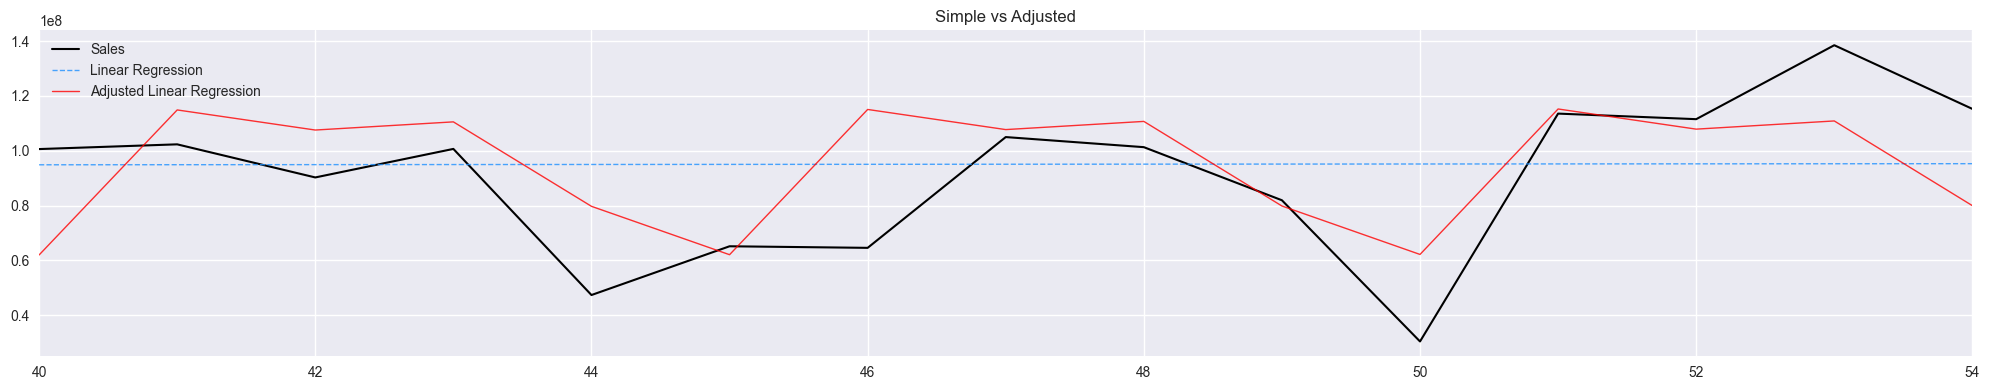

In [94]:
plt.figure(figsize=(20,4))
plt.plot(df_ALR_test["Wnum"],df_ALR_test["Sales"],alpha=1 , c='black',label='Sales',linewidth=1.5)
plt.plot(df_ALR_test["Wnum"],df_ALR_test["Predicted"], alpha=0.8 , c='dodgerblue',ls='--',label='Linear Regression',linewidth=1)
plt.plot(df_ALR_test["Wnum"],df_ALR_test["adj_Predicted"], alpha=0.8 , c='red',label='Adjusted Linear Regression',linewidth=1)
plt.title("Simple vs Adjusted")
plt.xlim((40,54))
plt.tight_layout()
plt.legend()
plt.show()

In [95]:
df_ALR_test = df_ALR_test.groupby('Month',as_index=False).sum()
df_ALR_test

Month  Week         Sales  Wnum     Predicted  Weights  adj_Predicted  \
0     10   210  4.411538e+08   210  4.746014e+08      5.0   4.746108e+08   
1     11   230  4.178625e+08   235  4.753247e+08      5.0   4.753341e+08   
2     12   250  5.091977e+08   260  4.760480e+08      5.0   4.760575e+08   

   Weight_Valid  
0  4.487171e+08  
1  4.262762e+08  
2  5.415974e+08

### Weight Validator

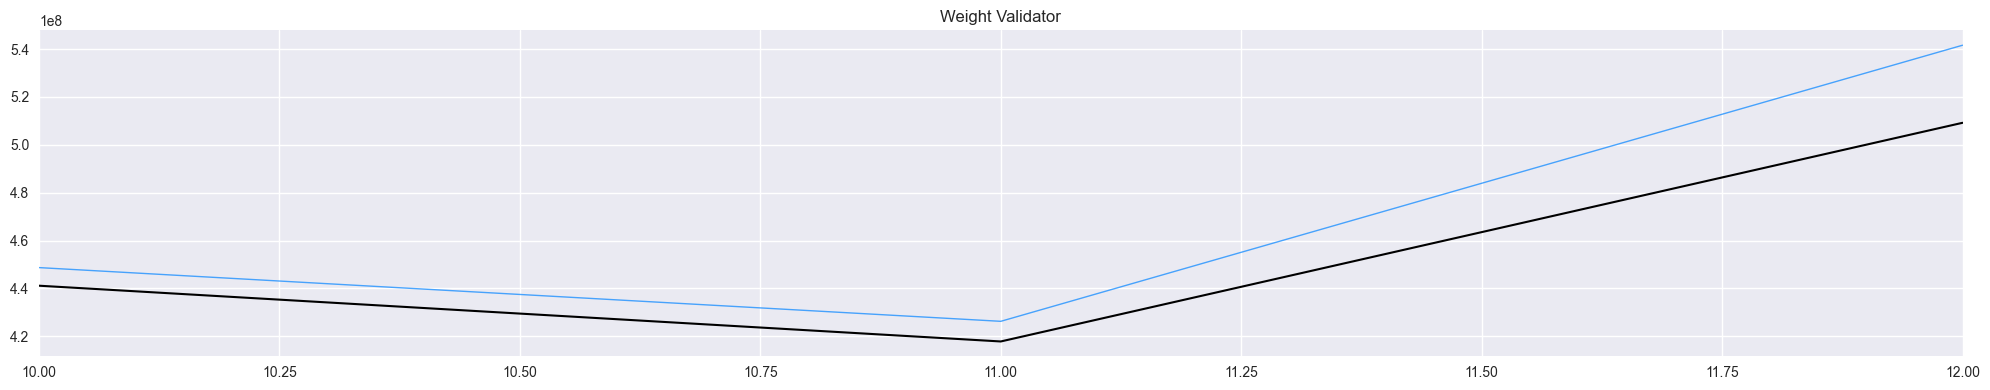

In [96]:
plt.figure(figsize=(20,4))
plt.plot(df_ALR_test["Month"],df_ALR_test["Sales"],alpha=1 , c='black',label='Sales',linewidth=1.5)
plt.plot(df_ALR_test["Month"],df_ALR_test["Weight_Valid"], alpha=0.8 , c='dodgerblue',label='Adjusted Linear Regression',linewidth=1)
plt.title("Weight Validator")
plt.xlim((10,12))
plt.tight_layout()
plt.show()

### Visualizing

In [97]:
def AdjReg_plot():
    plt.figure(figsize=(20,4))
    plt.plot(df_ALR_test["Month"],df_ALR_test["Sales"],alpha=1 , c='black',label='Sales',linewidth=1.5)
    plt.plot(df_ALR_test["Month"],df_ALR_test["adj_Predicted"], alpha=0.8 , c='red',label='Adjusted Linear Regression',linewidth=1)
    plt.plot(df_SLR_test["Month"],df_SLR_test["Predicted"], alpha=0.8 , c='dodgerblue',label='Simple Linear Regression',linewidth=1)
    plt.legend()
    plt.tight_layout()
    plt.title('Adjusted Linear Regression Test')
    plt.xlim((10,12))
    plt.show()

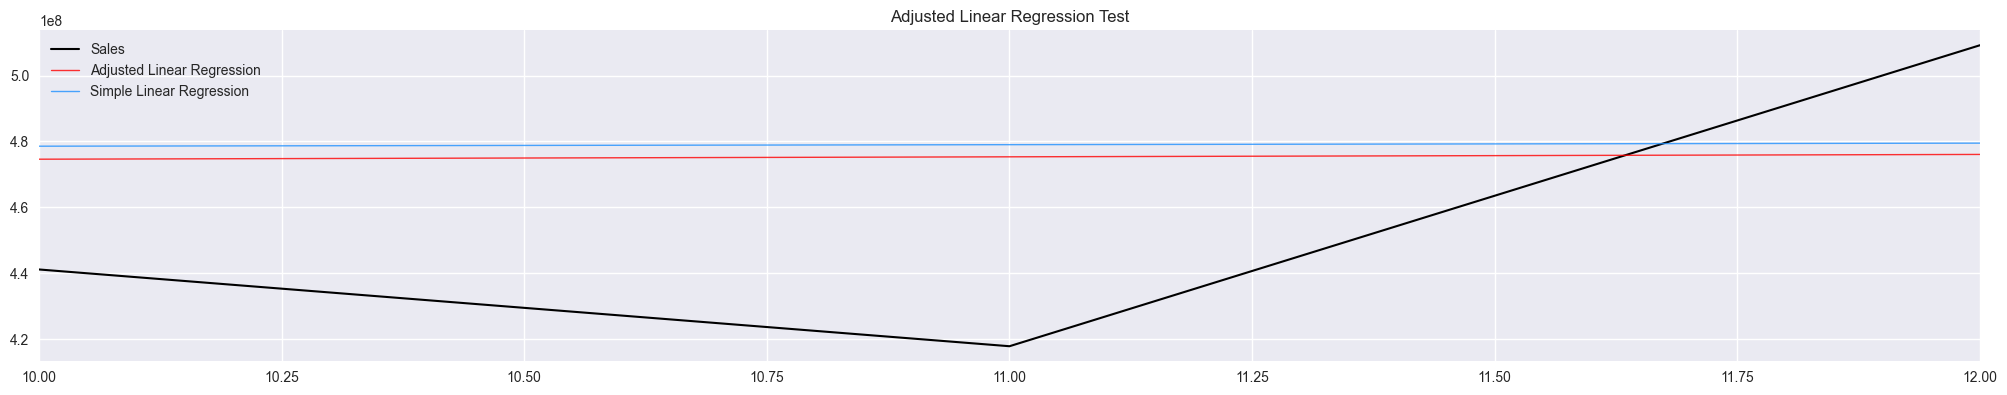

In [98]:
AdjReg_plot()

### Assessing Model Accuracy

In [99]:
def res(sales,prediction):
    return sales-prediction
def pe(sales,prediction):
    return ((sales-prediction)/sales)*100
a = res(df_ALR_test["Sales"],df_ALR_test["adj_Predicted"])
re = pe(df_ALR_test["Sales"],df_ALR_test["adj_Predicted"])

print('ME for Adjusted LR model is {:.2f}'.format(ME(a)))
print('MAE for Adjusted LR model is {:.2f}'.format(MAE(a)))
print('MSE for Adjusted LR model is {:.2f}'.format(MSE(a)))
print('MPE for Adjusted LR model is {:.2f}'.format(MPE(re)))
print('MAPE for Adjusted LR model is {:.2f}'.format(MAPE(re)))
print('TS for Adjusted LR model is {:.2f}'.format(TS(a,MAE(a))))

ME for Adjusted LR model is -19262766.54
MAE for Adjusted LR model is 41356257.99
MSE for Adjusted LR model is 1840208646081619.75
MPE for Adjusted LR model is -4.94
MAPE for Adjusted LR model is 9.28
TS for Adjusted LR model is -1.40


In [100]:
df_ALR_grouped["Adj_Predicted"] = df_ALR_grouped["Predicted"]*df_ALR_grouped["AVG"]

### MR Adjusted Linear Regression

In [101]:
a = res(df_ALR_grouped["Sales"],df_ALR_grouped["Adj_Predicted"])
n = len(a)
abs_MR = np.zeros(n)
MR = np.zeros(n)
for i in range(1,n):
    abs_MR[i] = abs(a.values[i]-a.values[i-1])
    MR[i] = (a.values[i]-a.values[i-1])
MR[0] = np.nan
abs_MR[0] = np.nan
MR = pd.concat([pd.DataFrame(MR,columns=['MR']),pd.DataFrame(abs_MR,columns=['abs_MR'])],axis=1)
MR.index += 1

In [102]:
MR["CL"] = np.zeros(n)
MR["LCL_1"] = np.zeros(n)
MR["UCL_1"] = np.zeros(n)
MR["LCL_2"] = np.zeros(n)
MR["UCL_2"] = np.zeros(n)
MR["LCL_3"] = np.zeros(n)
MR["UCL_3"] = np.zeros(n)
MR_bar = MR["abs_MR"].mean(skipna=True)
for i in range(2,n+1):
    MR["CL"][i] = 0
    MR["LCL_1"][i] = -0.89 * MR_bar
    MR["UCL_1"][i] =  0.89 * MR_bar
    MR["LCL_2"][i] = -1.77 * MR_bar
    MR["UCL_2"][i] =  1.77 * MR_bar
    MR["LCL_3"][i] = -2.66 * MR_bar
    MR["UCL_3"][i] =  2.66 * MR_bar

In [103]:
def MR_SLR_Plot():
    plt.figure(figsize=(20,5))
    plt.plot(MR.index.values, MR["CL"], c='azure', ls='--', linewidth=1.25)
    plt.plot(MR.index.values, MR["LCL_1"], c='gold', ls='--', linewidth=1.25)
    plt.plot(MR.index.values, MR["UCL_1"], c='gold', ls='--', linewidth=1.25)
    plt.plot(MR.index.values, MR["LCL_2"], c='darkorange', ls='--', linewidth=1.25)
    plt.plot(MR.index.values, MR["UCL_2"], c='darkorange', ls='--', linewidth=1.25)
    plt.plot(MR.index.values, MR["LCL_3"], c='dodgerblue', ls='--', linewidth=1.25)
    plt.plot(MR.index.values, MR["UCL_3"], c='dodgerblue', ls='--', linewidth=1.25)
    plt.plot(MR.index.values, MR["MR"], c='black', linewidth=2)
    plt.tight_layout()
    plt.title('MR for Adjusted Linear Regression',fontsize=18)
    plt.xlim((2,45))
    plt.show()

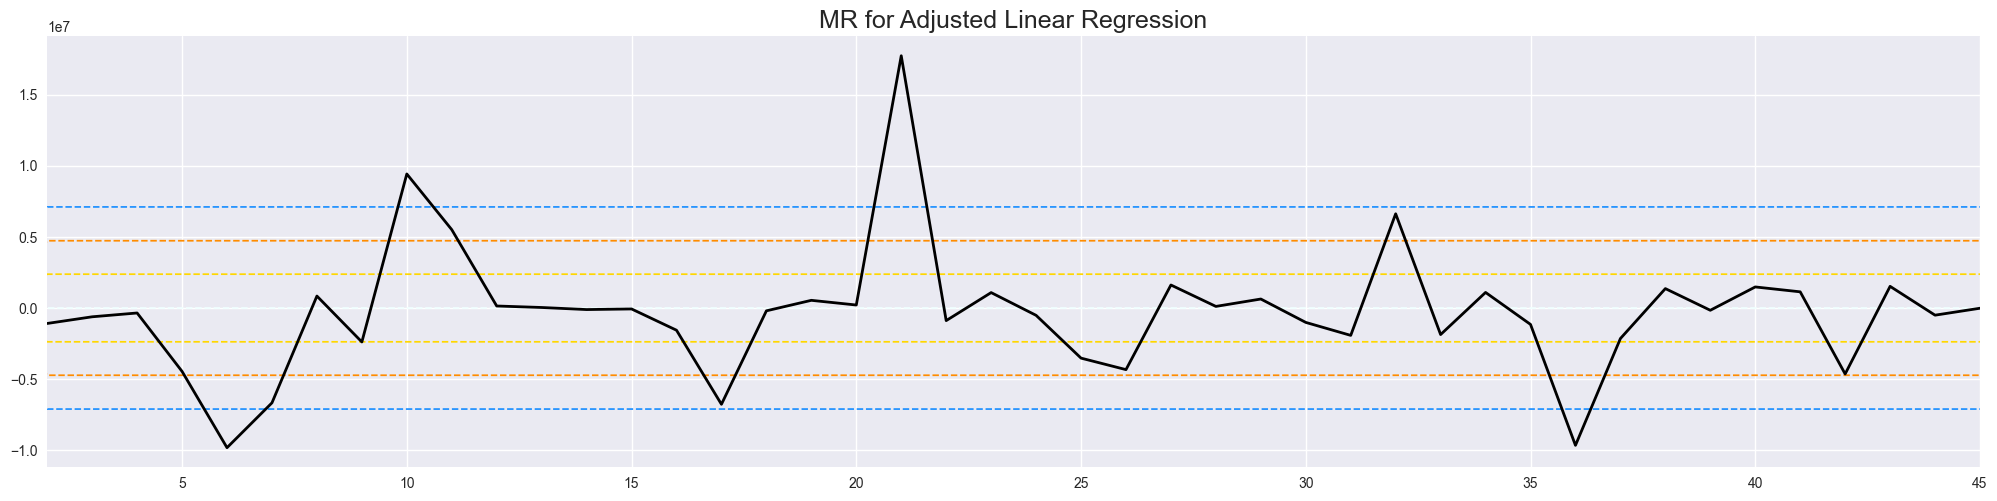

In [104]:
MR_SLR_Plot()